In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import string
import re
import spacy
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/datasetfix.csv')
df

reviewId                userName  \
0      eic90ad-1204-4a77-8ded-13e593766f33       Maulina Nia Rahma   
1     aeb81eb7-5004-4a27-8ded-07e593866e33        Rachman Fadhilla   
2     9a98caaa-0125-0862-1029-ae19bd93cb76            Maudi sintia   
3     ec3d76d6-3acf-4463-885a-b0b69e135307   Rachmawati Ariningsih   
4     77ec6c12-1890-5f19-b760-d9a0af0c6b51            Muhammad Nur   
...                                    ...                     ...   
2002  b61ee485-7303-4282-b214-529013c8e59b        Muhammad Tubagus   
2003  d5d0c794-059a-4f71-8148-e60ce787e87b           Reza Agustian   
2004  497b3fef-3225-4730-b4fa-453ce04fe95a         Pengguna Google   
2005  d17fb53b-2528-4feb-88e2-68d1749dff0f  Ronika Epiphani Gultom   
2006  dafa22aa-010d-44f5-857a-c62154aa0c15         Dwi Tri Ningsih   

                                              userImage  \
0     https://play-lh.googleusercontent.com/a-/ALV-U...   
1     https://play-lh.googleusercontent.com/a-/ALV-U...   
2     https://play-lh.googleusercontent.com/a-/ALV-U...   
3     https://play-lh.googleusercontent.com/a/ACg8oc...   
4     https://play-lh.googleusercontent.com/a-/ALV-U...   
...                                                 ...   
2002  https://play-lh.googleusercontent.com/a/ACg8oc...   
2003  https://play-lh.googleusercontent.com/a-/ALV-U...   
2004  https://play-lh.googleusercontent.com/EGemoI2N...   
2005  https://play-lh.googleusercontent.com/a/ACg8oc...   
2006  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                content  score  thumbsUpCount  \
0     Aplikasinya ringan, fitur reksa dananya lengka...      2             17   
1     Secara umum, jika sistem aplikasi yang digunak...      1             24   
2     Bareksa adalah aplikasi investasi yang bagus, ...      4              5   
3     Mw menambahkan, rekening tersebut terus ditola...      1             12   
4     Performa dan tampilan aplikasi sangat bagus ka...      5              0   
...                                                 ...    ...            ...   
2002  Mengapa upload bukti transaksi tertunda? Itu t...      3              2   
2003  Saya melakukan penarikan tanggal 9 september k...      3              0   
2004     Transaksi lambat banget, aplikasi kurang bagus      3              0   
2005  Mohon maaf kebetulan ektp yang buram tidak bis...      3              0   
2006  Mohon diperbaiki lebih lanjut, saat edit profi...      3              0   

     reviewCreatedVersion                   at  \
0                   4.0.1   19/11/2023 2:12:44   
1                   4.0.1   2023-11-21 6:21:44   
2                   4.0.1   2023-11-14 6:06:12   
3                4.1.2000   2023-11-28 7:06:17   
4                   4.0.1   2023-11-16 8:53:10   
...                   ...                  ...   
2002             3.7.2001   2023-10-13 1:47:47   
2003               1.7.10   2021-09-14 6:45:48   
2004                  NaN  2019-04-16 11:22:18   
2005            2.10.2000  2022-10-05 13:04:41   
2006             1.4.2005  2021-04-11 11:50:34   

                                           replyContent            repliedAt  \
0     Terima kasih telah memberikan feedback terhada...   2023-11-23 1:59:26   
1     Mohon maaf atas ketidaknyamanannya, untuk kend...   2023-11-23 2:59:26   
2     Terima kasih telah memberikan feedback terhada...   2023-11-16 3:50:04   
3     Mohon maaf atas ketidaknyamanannya, untuk kend...   2023-12-01 4:19:58   
4     Terima kasih telah memberikan feedback terhada...   2023-11-18 3:18:06   
...                                                 ...                  ...   
2002  Mohon maaf atas ketidaknyamanannya. Perihal pe...   2023-10-12 9:51:32   
2003  Perihal kendala bapak/ibu apakah sudah tersele...   2021-09-21 8:14:27   
2004  Silahkan update aplikasi Bareksa Anda ke versi...  2019-12-16 15:22:44   
2005  Terima kasih telah memberikan feedback terhada...   2022-10-06 3:49:23   
2006  Perihal tersebut di moho

In [ ]:
print('Ukuran Dataset :', df.shape)
print('Kolom :', df.columns)

Ukuran Dataset : (2007, 11)
Kolom : Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')


In [ ]:
kolom_hapus = ['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent','repliedAt', 'appVersion', 'at']
df = df.drop(kolom_hapus, axis=1)

df.head(10)

content  score
0  Aplikasinya ringan, fitur reksa dananya lengka...      2
1  Secara umum, jika sistem aplikasi yang digunak...      1
2  Bareksa adalah aplikasi investasi yang bagus, ...      4
3  Mw menambahkan, rekening tersebut terus ditola...      1
4  Performa dan tampilan aplikasi sangat bagus ka...      5
5  Kesalahan validasi muatan. Sampai ulasan ini d...      1
6  Stok fitur aplikasi tidak lengkap, tampilan bi...      3
7  Tampilannya kurang jelas, apalagi di dark mode...      1
8  Saya telah menggunakan aplikasi ini sejak tahu...      5
9  Setelah menghubungi Cs. Lewat telpon akhirnya ...      5

## Handling Missing value-Ignore tuple




In [ ]:
df.dropna(subset=['content'],inplace = True)

In [ ]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2002     True
2003     True
2004    False
2005     True
2006     True
Length: 2007, dtype: bool>

In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       content  score
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
...       ...    ...
2002    False  False
2003    False  False
2004    False  False
2005    False  False
2006    False  False

[2007 rows x 2 columns]>

In [ ]:
df.shape

(2007, 2)

# Teks Peprocessing

tahapan pada teks preprocessing yakni :
- Tokenizing
- Clean & Case Folding
- Normalisasi
- Stopword
- Lemmatization

## Tokenizing serta Clean & Case Folding

In [ ]:
import pandas as pd
import re

# Fungsi untuk memisahkan tanda baca yang terhubung dengan kata
def separate_punctuation(text):
    # Define pattern to separate punctuation
    pattern = r'(?<=[A-Za-z])([.,!?])|([.,!?])(?=[A-Za-z])'
    separated_text = re.sub(pattern, r' \1\2 ', text)
    return separated_text

# Fungsi untuk membersihkan teks
def clean_text(df, text_field, new_text_field_name):
    # Lowercasing
    df[new_text_field_name] = df[text_field].apply(lambda x: ' '.join(x)).str.lower()
    # Menghapus tanda baca, mention, link, dan karakter khusus lainnya
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # Menghapus angka
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    # Pisahkan tanda baca yang terhubung dengan kata
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: separate_punctuation(elem))
    # Tokenisasi kembali setelah pemisahan tanda baca
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: x.split())
    return df

# Tokenisasi awal
df['text_token'] = df['content'].apply(lambda x: x.split())

# Pembersihan teks
df = clean_text(df, 'text_token', 'text_clean')

# Menampilkan DataFrame
df

content  score  \
0     Aplikasinya ringan, fitur reksa dananya lengka...      2   
1     Secara umum, jika sistem aplikasi yang digunak...      1   
2     Bareksa adalah aplikasi investasi yang bagus, ...      4   
3     Mw menambahkan, rekening tersebut terus ditola...      1   
4     Performa dan tampilan aplikasi sangat bagus ka...      5   
...                                                 ...    ...   
2002  Mengapa upload bukti transaksi tertunda? Itu t...      3   
2003  Saya melakukan penarikan tanggal 9 september k...      3   
2004     Transaksi lambat banget, aplikasi kurang bagus      3   
2005  Mohon maaf kebetulan ektp yang buram tidak bis...      3   
2006  Mohon diperbaiki lebih lanjut, saat edit profi...      3   

                                             text_token  \
0     [Aplikasinya, ringan,, fitur, reksa, dananya, ...   
1     [Secara, umum,, jika, sistem, aplikasi, yang, ...   
2     [Bareksa, adalah, aplikasi, investasi, yang, b...   
3     [Mw, menambahkan,, rekening, tersebut, terus, ...   
4     [Performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [Mengapa, upload, bukti, transaksi, tertunda?,...   
2003  [Saya, melakukan, penarikan, tanggal, 9, septe...   
2004  [Transaksi, lambat, banget,, aplikasi, kurang,...   
2005  [Mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [Mohon, diperbaiki, lebih, lanjut,, saat, edit...   

                                             text_clean  
0     [aplikasinya, ringan, fitur, reksa, dananya, l...  
1     [secara, umum, jika, sistem, aplikasi, yang, d...  
2     [bareksa, adalah, aplikasi, investasi, yang, b...  
3     [mw, menambahkan, rekening, tersebut, terus, d...  
4     [performa, dan, tampilan, aplikasi, sangat, ba...  
...                                                 ...  
2002  [mengapa, upload, bukti, transaksi, tertunda, ...  
2003  [saya, melakukan, penarikan, tanggal, septembe...  
2004  [transaksi, lambat, banget, aplikasi, kurang, ...  
2005  [mohon, maaf, kebetulan, ektp, yang, buram, ti...  
2006  [mohon, diperbaiki, lebih, lanjut, saat, edit,...  

[2007 rows x 4 columns]

In [ ]:
import pandas as pd

# Membaca kamus bahasa dari file CSV
data_kamus = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Kamus Lexicon/kamus_normalization.csv')

# Fungsi untuk normalisasi
def normalisasi(teks, kamus):
    kalimat_final = []
    for kata in teks:
        kata_benar = kamus[kamus['Tidak Baku'] == kata]['Baku'].values
        if len(kata_benar) > 0:
            kalimat_final.append(kata_benar[0])
        else:
            kalimat_final.append(kata)
    return kalimat_final


# Normalisasi teks
df['content_norm'] = df['text_clean'].apply(lambda x: normalisasi(x, data_kamus))

df


content  score  \
0     Aplikasinya ringan, fitur reksa dananya lengka...      2   
1     Secara umum, jika sistem aplikasi yang digunak...      1   
2     Bareksa adalah aplikasi investasi yang bagus, ...      4   
3     Mw menambahkan, rekening tersebut terus ditola...      1   
4     Performa dan tampilan aplikasi sangat bagus ka...      5   
...                                                 ...    ...   
2002  Mengapa upload bukti transaksi tertunda? Itu t...      3   
2003  Saya melakukan penarikan tanggal 9 september k...      3   
2004     Transaksi lambat banget, aplikasi kurang bagus      3   
2005  Mohon maaf kebetulan ektp yang buram tidak bis...      3   
2006  Mohon diperbaiki lebih lanjut, saat edit profi...      3   

                                             text_token  \
0     [Aplikasinya, ringan,, fitur, reksa, dananya, ...   
1     [Secara, umum,, jika, sistem, aplikasi, yang, ...   
2     [Bareksa, adalah, aplikasi, investasi, yang, b...   
3     [Mw, menambahkan,, rekening, tersebut, terus, ...   
4     [Performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [Mengapa, upload, bukti, transaksi, tertunda?,...   
2003  [Saya, melakukan, penarikan, tanggal, 9, septe...   
2004  [Transaksi, lambat, banget,, aplikasi, kurang,...   
2005  [Mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [Mohon, diperbaiki, lebih, lanjut,, saat, edit...   

                                             text_clean  \
0     [aplikasinya, ringan, fitur, reksa, dananya, l...   
1     [secara, umum, jika, sistem, aplikasi, yang, d...   
2     [bareksa, adalah, aplikasi, investasi, yang, b...   
3     [mw, menambahkan, rekening, tersebut, terus, d...   
4     [performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [mengapa, upload, bukti, transaksi, tertunda, ...   
2003  [saya, melakukan, penarikan, tanggal, septembe...   
2004  [transaksi, lambat, banget, aplikasi, kurang, ...   
2005  [mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [mohon, diperbaiki, lebih, lanjut, saat, edit,...   

                                           content_norm  
0     [aplikasinya, ringan, fitur, reksa, dananya, l...  
1     [secara, umum, jika, sistem, aplikasi, yang, d...  
2     [bareksa, adalah, aplikasi, investasi, yang, b...  
3     [mau, menambahkan, rekening, tersebut, terus, ...  
4     [performa, dan, tampilan, aplikasi, sangat, ba...  
...                                                 ...  
2002  [mengapa, upload, bukti, transaksi, tertunda, ...  
2003  [saya, melakukan, penarikan, tanggal, septembe...  
2004  [transaksi, lambat, banget, aplikasi, kurang, ...  
2005  [mohon, maaf, kebetulan, ektp, yang, buram, ti...  
2006  [mohon, diperbaiki, lebih, lanjut, saat, edit,...  

[2007 rows x 5 columns]

In [ ]:
# Daftar kata-kata stop words tambahan
more_stopwords = {
    'dar', 'hai', 'txffzhybv', 'bg', 'bot', 'yg', 'deh', 'ypdhl', 'tidak', 'nic', 'bos', 'hmmm', 'ky', 'yaa', 'mo', 'fb', 'laah', 'br', 'blg', 'da', 'x', 'jt', 'dan',
    'y', 'b', 't', 'yang', 'sj', 'faq', 'jsajan', 'aja', 'mis', 'mf', 'hmm', 'j`ii', 'issi', 'the', 'kok', 'ng', 'di', 'nih', 'lah', 'adm', 'nig', 'min', 'y', 'kak', 'k', 'va',
    'dong', 'ai', 'nya', 'e', 'tuh', 'nih', 'di' , 'min','ke', 'dgn', 'nya', 'jadi', 'ada', 'nya', 'ah', 'aamiin'
}

# Membuat daftar kata-kata stop words
stop_words_factory = StopWordRemoverFactory()
stop_words = stop_words_factory.get_stop_words()
stop_words = stop_words.extend(more_stopwords)

# Menginisialisasi StopWordRemover dengan daftar stop words yang diperbarui
stopword_remover = stop_words_factory.create_stop_word_remover()

# Fungsi untuk menghapus stop words dari teks
def remove_stopwords(text):
    if isinstance(text, list):
        text = ' '.join(text)
    return stopword_remover.remove(text)

#proses stopword
df['text_stopword'] = df['content_norm'].apply(remove_stopwords)

df

content  score  \
0     Aplikasinya ringan, fitur reksa dananya lengka...      2   
1     Secara umum, jika sistem aplikasi yang digunak...      1   
2     Bareksa adalah aplikasi investasi yang bagus, ...      4   
3     Mw menambahkan, rekening tersebut terus ditola...      1   
4     Performa dan tampilan aplikasi sangat bagus ka...      5   
...                                                 ...    ...   
2002  Mengapa upload bukti transaksi tertunda? Itu t...      3   
2003  Saya melakukan penarikan tanggal 9 september k...      3   
2004     Transaksi lambat banget, aplikasi kurang bagus      3   
2005  Mohon maaf kebetulan ektp yang buram tidak bis...      3   
2006  Mohon diperbaiki lebih lanjut, saat edit profi...      3   

                                             text_token  \
0     [Aplikasinya, ringan,, fitur, reksa, dananya, ...   
1     [Secara, umum,, jika, sistem, aplikasi, yang, ...   
2     [Bareksa, adalah, aplikasi, investasi, yang, b...   
3     [Mw, menambahkan,, rekening, tersebut, terus, ...   
4     [Performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [Mengapa, upload, bukti, transaksi, tertunda?,...   
2003  [Saya, melakukan, penarikan, tanggal, 9, septe...   
2004  [Transaksi, lambat, banget,, aplikasi, kurang,...   
2005  [Mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [Mohon, diperbaiki, lebih, lanjut,, saat, edit...   

                                             text_clean  \
0     [aplikasinya, ringan, fitur, reksa, dananya, l...   
1     [secara, umum, jika, sistem, aplikasi, yang, d...   
2     [bareksa, adalah, aplikasi, investasi, yang, b...   
3     [mw, menambahkan, rekening, tersebut, terus, d...   
4     [performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [mengapa, upload, bukti, transaksi, tertunda, ...   
2003  [saya, melakukan, penarikan, tanggal, septembe...   
2004  [transaksi, lambat, banget, aplikasi, kurang, ...   
2005  [mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [mohon, diperbaiki, lebih, lanjut, saat, edit,...   

                                           content_norm  \
0     [aplikasinya, ringan, fitur, reksa, dananya, l...   
1     [secara, umum, jika, sistem, aplikasi, yang, d...   
2     [bareksa, adalah, aplikasi, investasi, yang, b...   
3     [mau, menambahkan, rekening, tersebut, terus, ...   
4     [performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [mengapa, upload, bukti, transaksi, tertunda, ...   
2003  [saya, melakukan, penarikan, tanggal, septembe...   
2004  [transaksi, lambat, banget, aplikasi, kurang, ...   
2005  [mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [mohon, diperbaiki, lebih, lanjut, saat, edit,...   

                                          text_stopword  
0     aplikasinya ringan fitur reksa dananya lengkap...  
1     umum sistem aplikasi digunakan aplikasi standa...  
2     bareksa aplikasi investasi bagus ringan jelas ...  
3     mau menambahkan rekening tersebut terus ditola...  
4     performa tampilan aplikasi sangat bagus ringan...  
...                                                 ...  
2002  upload bukti transaksi tertunda terus gagal pe...  
2003  melakukan penarikan tanggal september kemarin ...  
2004      transaksi lambat banget aplikasi kurang bagus  
2005  mohon maaf kebetulan ektp buram bisa terbaca k...  
2006   mohon diperbaiki lebih lanjut edit profil update  

[2007 rows x 6 columns]

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
from spacy.tokens import Token
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi Stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi lemmatization menggunakan Sastrawi
def lemmatize_indonesian(token):
    return stemmer.stem(token.text)

# Tambahkan ekstensi untuk Token spaCy
Token.set_extension('lemma_indonesian', getter=lemmatize_indonesian, force=True)

# Inisialisasi spaCy dengan model bahasa Indonesia
nlp = spacy.blank('id')

# Tambahkan pipeline tokenizer spaCy
def custom_tokenizer(nlp):
    return spacy.tokenizer.Tokenizer(nlp.vocab)

nlp.tokenizer = custom_tokenizer(nlp)

# Contoh teks dalam bahasa Indonesia (harus diubah sesuai dengan kebutuhan)
data = df['text_stopword']
df = pd.DataFrame(data)

# Lakukan lemmatization pada kolom 'text_stopword'
df['hasil_lemma'] = df['text_stopword'].apply(lambda x: ' '.join([token._.lemma_indonesian for token in nlp(x)]))

# Tampilkan dataframe hasil
df


text_stopword  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            hasil_lemma  
0     aplikasi ringan fitur reksa dana lengkap cocok...  
1     umum sistem aplikasi guna aplikasi standard mi...  
2     bareksa aplikasi investasi bagus ringan jelas ...  
3     mau tambah rekening sebut terus tolak alas ktp...  
4     performa tampil aplikasi sangat bagus ringan f...  
...                                                 ...  
2002  upload bukti transaksi tunda terus gagal pesan...  
2003  laku tari tanggal september kemarin kata sukse...  
2004      transaksi lambat banget aplikasi kurang bagus  
2005  mohon maaf betul ektp buram bisa baca kamera h...  
2006         mohon baik lebih lanjut edit profil update  

[2007 rows x 2 columns]

In [ ]:
df = df.rename(columns={'text_stopword' : 'text asli','hasil_lemma': 'text_prepro'})
df

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  
0     aplikasi ringan fitur reksa dana lengkap cocok...  
1     umum sistem aplikasi guna aplikasi standard mi...  
2     bareksa aplikasi investasi bagus ringan jelas ...  
3     mau tambah rekening sebut terus tolak alas ktp...  
4     performa tampil aplikasi sangat bagus ringan f...  
...                                                 ...  
2002  upload bukti transaksi tunda terus gagal pesan...  
2003  laku tari tanggal september kemarin kata sukse...  
2004      transaksi lambat banget aplikasi kurang bagus  
2005  mohon maaf betul ektp buram bisa baca kamera h...  
2006         mohon baik lebih lanjut edit profil update  

[2007 rows x 2 columns]

In [ ]:
data = df

df = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/hasilpreprofix.csv'

# Simpan DataFrame ke dalam file CSV
df.to_csv(file_path, index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/hasilpreprofix.csv')
data.head(10)

text asli  \
0  aplikasinya ringan fitur reksa dananya lengkap...   
1  umum sistem aplikasi digunakan aplikasi standa...   
2  bareksa aplikasi investasi bagus ringan jelas ...   
3  mau menambahkan rekening tersebut terus ditola...   
4  performa tampilan aplikasi sangat bagus ringan...   
5  kesalahan validasi muatan ulasan diupload lebi...   
6  stok fitur aplikasi lengkap tampilan biasa nam...   
7  tampilannya kurang jelas di dark mode metode p...   
8  telah menggunakan aplikasi sejak tahun merasa ...   
9  menghubungi customer service lewat telepon akh...   

                                         text_prepro  
0  aplikasi ringan fitur reksa dana lengkap cocok...  
1  umum sistem aplikasi guna aplikasi standard mi...  
2  bareksa aplikasi investasi bagus ringan jelas ...  
3  mau tambah rekening sebut terus tolak alas ktp...  
4  performa tampil aplikasi sangat bagus ringan f...  
5  salah validasi muat ulas diupload lebih hari s...  
6  stok fitur aplikasi lengkap tampil biasa namun...  
7  tampil kurang jelas di dark mode metode bayar ...  
8  telah guna aplikasi sejak tahun rasa iring jal...  
9  hubung customer service lewat telepon akhir so...

In [ ]:
data

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  
0     aplikasi ringan fitur reksa dana lengkap cocok...  
1     umum sistem aplikasi guna aplikasi standard mi...  
2     bareksa aplikasi investasi bagus ringan jelas ...  
3     mau tambah rekening sebut terus tolak alas ktp...  
4     performa tampil aplikasi sangat bagus ringan f...  
...                                                 ...  
2002  upload bukti transaksi tunda terus gagal pesan...  
2003  laku tari tanggal september kemarin kata sukse...  
2004      transaksi lambat banget aplikasi kurang bagus  
2005  mohon maaf betul ektp buram bisa baca kamera h...  
2006         mohon baik lebih lanjut edit profil update  

[2007 rows x 2 columns]

In [ ]:
 pip install vaderSentiment

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

lexiconpos = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Kamus Lexicon/positifbersih.csv')
lexiconneg = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Kamus Lexicon/negatifbersih.csv')

# Inisialisasi Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk melakukan pelabelan sentimen menggunakan VADER
def label_sentiment_vader(text, lexiconpos, lexiconneg):
    # Mendapatkan compound score dari VADER untuk teks
    compound_score = analyzer.polarity_scores(text)['compound']

    # Mengambil kata-kata dalam teks
    words = text.split()

    # Inisialisasi nilai score
    score = 0

    # Tentukan skor sentimen berdasarkan kata-kata dalam teks
    for word in words:
        if word in lexiconpos['word'].values:
            score += lexiconpos[lexiconpos['word'] == word]['weight'].values[0]
        elif word in lexiconneg['word'].values:
            score += lexiconneg[lexiconneg['word'] == word]['weight'].values[0]

    # Tentukan label sentimen berdasarkan nilai skor
    polarity = 'Positif' if score >= 0 else 'Negatif'

    return score, polarity

# Terapkan fungsi analisis sentimen pada kolom 'text_prepro'
labels = df['text_prepro'].apply(label_sentiment_vader, lexiconpos=lexiconpos, lexiconneg=lexiconneg)

# Pisahkan hasil labels menjadi skor dan polaritas
compound_scores, polarities = zip(*labels)

# Tambahkan kolom baru untuk skor dan sentimen
df['compound scores'] = compound_scores
df['Sentimen'] = polarities

# Menampilkan 10 baris pertama dari DataFrame
df.head(10)

# Menghitung jumlah sentimen positif, negatif, dan total
# Menghitung jumlah sentimen positif, negatif, dan total
jumlah_positif = df[df['Sentimen'] == 'Positif'].shape[0]
jumlah_negatif = df[df['Sentimen'] == 'Negatif'].shape[0]
jumlah_total = df.shape[0]

# Menampilkan hasil
print(f"Jumlah sentimen positif: {jumlah_positif}")
print(f"Jumlah sentimen negatif: {jumlah_negatif}")
print(f"Jumlah sentimen total: {jumlah_total}")



Jumlah sentimen positif: 1210
Jumlah sentimen negatif: 797
Jumlah sentimen total: 2007


In [ ]:
df

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  compound scores  \
0     aplikasi ringan fitur reksa dana lengkap cocok...               16   
1     umum sistem aplikasi guna aplikasi standard mi...              -11   
2     bareksa aplikasi investasi bagus ringan jelas ...                9   
3     mau tambah rekening sebut terus tolak alas ktp...               -1   
4     performa tampil aplikasi sangat bagus ringan f...                4   
...                                                 ...              ...   
2002  upload bukti transaksi tunda terus gagal pesan...               -6   
2003  laku tari tanggal september kemarin kata sukse...              -11   
2004      transaksi lambat banget aplikasi kurang bagus                2   
2005  mohon maaf betul ektp buram bisa baca kamera h...                8   
2006         mohon baik lebih lanjut edit profil update                8   

     Sentimen  
0     Positif  
1     Negatif  
2     Positif  
3     Negatif  
4     Positif  
...       ...  
2002  Negatif  
2003  Negatif  
2004  Positif  
2005  Positif  
2006  Positif  

[2007 rows x 4 columns]

In [ ]:
data = df

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv'

# Simpan DataFrame ke dalam file CSV
df.to_csv(file_path, index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')

In [ ]:
data

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  compound scores  \
0     aplikasi ringan fitur reksa dana lengkap cocok...               16   
1     umum sistem aplikasi guna aplikasi standard mi...              -11   
2     bareksa aplikasi investasi bagus ringan jelas ...                9   
3     mau tambah rekening sebut terus tolak alas ktp...               -1   
4     performa tampil aplikasi sangat bagus ringan f...                4   
...                                                 ...              ...   
2002  upload bukti transaksi tunda terus gagal pesan...               -6   
2003  laku tari tanggal september kemarin kata sukse...              -11   
2004      transaksi lambat banget aplikasi kurang bagus                2   
2005  mohon maaf betul ektp buram bisa baca kamera h...                8   
2006         mohon baik lebih lanjut edit profil update                8   

     Sentimen  
0     Positif  
1     Negatif  
2     Positif  
3     Negatif  
4     Positif  
...       ...  
2002  Negatif  
2003  Negatif  
2004  Positif  
2005  Positif  
2006  Positif  

[2007 rows x 4 columns]

# PROSES PEMBOBOTAN KATA DENGAN TF-IDF


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

# Memuat data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
column = "text_prepro"

# Mengganti nilai NaN dengan string kosong
data[column] = data[column].fillna('')

# Membuat objek CountVectorizer dan TfidfVectorizer
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transformasi teks dengan CountVectorizer
TF_vector = count_vectorizer.fit_transform(data[column])
normalized_tf_vector = normalize(TF_vector, norm='l1', axis=1)

# Transformasi teks dengan TfidfVectorizer
tfs = tfidf_vectorizer.fit_transform(data[column])
IDF_vector = tfidf_vectorizer.idf_

# Mengalikan matriks TF yang sudah dinormalisasi dengan IDF
tfidf_mat = normalized_tf_vector.multiply(IDF_vector).toarray()

# Mengubah hasil menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_mat, columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan DataFrame TF-IDF
df_tfidf

#yng typo dan spasi nyatu diganti di labelling atau engga di kamus normalisasi


aamiin  abai  abal  acak  acara  acc  accnya  account  aceh  action  \
0        0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
1        0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
2        0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
3        0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
4        0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
...      ...   ...   ...   ...    ...  ...     ...      ...   ...     ...   
2002     0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
2003     0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
2004     0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
2005     0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
2006     0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   

      ...  yaitu  yakin  yang   yo  youtube  youtuber  yowes  yuk  zaman  zonk  
0     ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
1     ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
2     ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
3     ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
4     ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
...   ...    ...    ...   ...  ...      ...       ...    ...  ...    ...   ...  
2002  ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
2003  ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
2004  ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
2005  ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
2006  ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  

[2007 rows x 2047 columns]

In [ ]:
data = df_tfidf

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv'

# Simpan DataFrame ke dalam file CSV
data.to_csv(file_path, index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')

In [ ]:
data

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  compound scores  \
0     aplikasi ringan fitur reksa dana lengkap cocok...               16   
1     umum sistem aplikasi guna aplikasi standard mi...              -11   
2     bareksa aplikasi investasi bagus ringan jelas ...                9   
3     mau tambah rekening sebut terus tolak alas ktp...               -1   
4     performa tampil aplikasi sangat bagus ringan f...                4   
...                                                 ...              ...   
2002  upload bukti transaksi tunda terus gagal pesan...               -6   
2003  laku tari tanggal september kemarin kata sukse...              -11   
2004      transaksi lambat banget aplikasi kurang bagus                2   
2005  mohon maaf betul ektp buram bisa baca kamera h...                8   
2006         mohon baik lebih lanjut edit profil update                8   

     Sentimen  
0     Positif  
1     Negatif  
2     Positif  
3     Negatif  
4     Positif  
...       ...  
2002  Negatif  
2003  Negatif  
2004  Positif  
2005  Positif  
2006  Positif  

[2007 rows x 4 columns]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np

# Membaca data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')

# Meminta input persentase fitur
persen = int(input("Masukkan berapa persen fitur : "))

# Mengubah nilai tf-idf menjadi biner
X = tf_idf.applymap(lambda x: 1 if x != 0 else 0)

# Menggunakan SelectKBest untuk memilih fitur terbaik
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X, y)

# Mengurutkan skor fitur
sorted_index = np.argsort(selector.scores_)[::-1]

# # Menentukan jumlah fitur yang akan dipilih
# num_feature_to_select = int(persen * len(X.columns) / 100)
# selected_features = X.columns[sorted_index[:num_feature_to_select]]

# # Menampilkan fitur yang terpilih
# print(selected_features)


# MODEL SVM DAN SELEKSI FITUR CHI SQUARE

##PARAMETER GAMMA = 0,01 C = 1 K=5


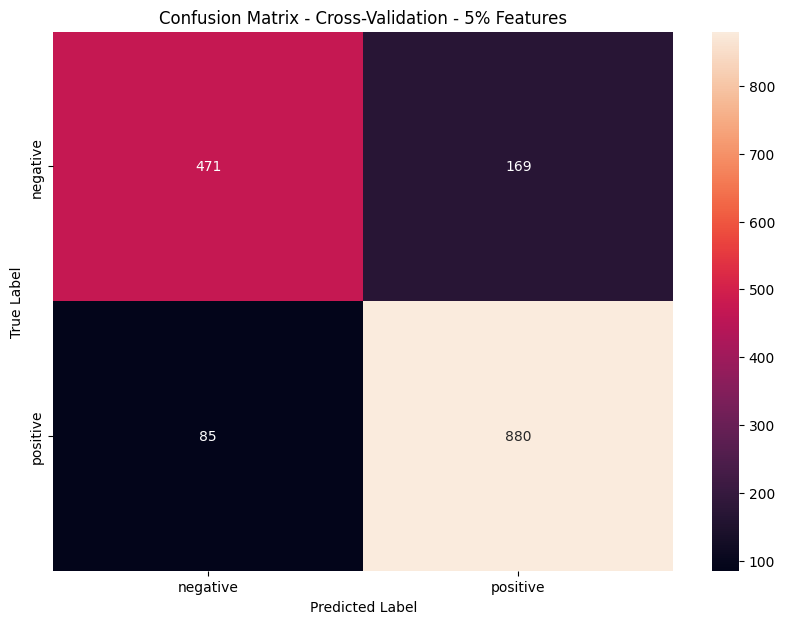

Classification Report - Cross-Validation - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.74      0.79       640
     Positif       0.84      0.91      0.87       965

    accuracy                           0.84      1605
   macro avg       0.84      0.82      0.83      1605
weighted avg       0.84      0.84      0.84      1605

Cross-Validation Scores (5% features): [0.85981308 0.85046729 0.87850467 0.78193146 0.83800623]
Mean Accuracy: 0.8417445482866043
Standard Deviation: 0.032696926513151224
Test Accuracy: 0.845771144278607
Test Precision: 0.8454943326423929
Test Recall: 0.845771144278607
Test F1 Score: 0.8438141543823763


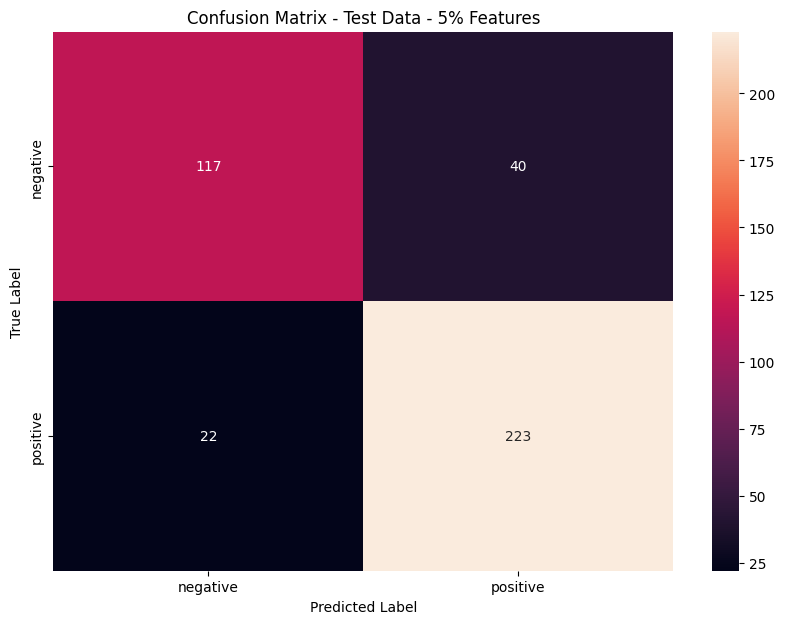

Classification Report - Test Data - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.75      0.79       157
     Positif       0.85      0.91      0.88       245

    accuracy                           0.85       402
   macro avg       0.84      0.83      0.83       402
weighted avg       0.85      0.85      0.84       402



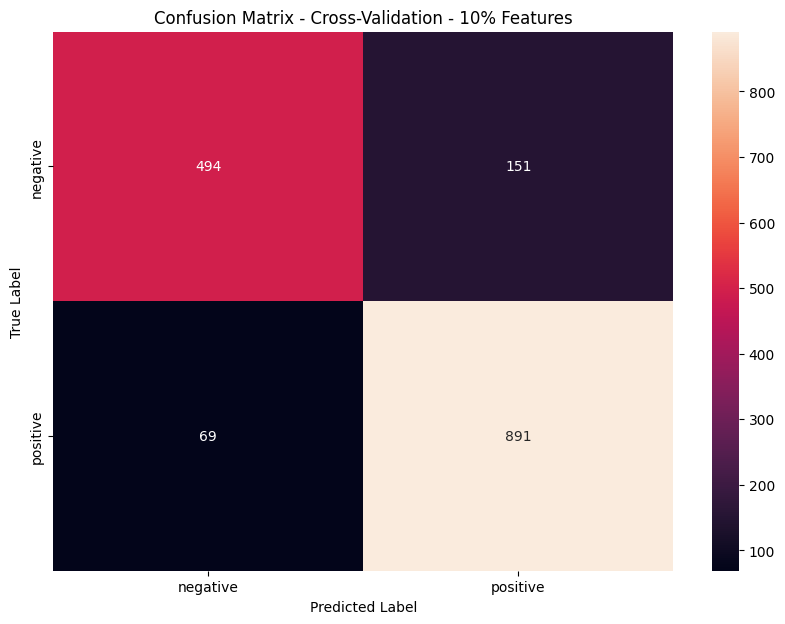

Classification Report - Cross-Validation - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.77      0.82       645
     Positif       0.86      0.93      0.89       960

    accuracy                           0.86      1605
   macro avg       0.87      0.85      0.85      1605
weighted avg       0.86      0.86      0.86      1605

Cross-Validation Scores (10% features): [0.84423676 0.87227414 0.8847352  0.86915888 0.84423676]
Mean Accuracy: 0.8629283489096574
Standard Deviation: 0.0161273259882178
Test Accuracy: 0.8507462686567164
Test Precision: 0.8515020699422594
Test Recall: 0.8507462686567164
Test F1 Score: 0.8477677045524831


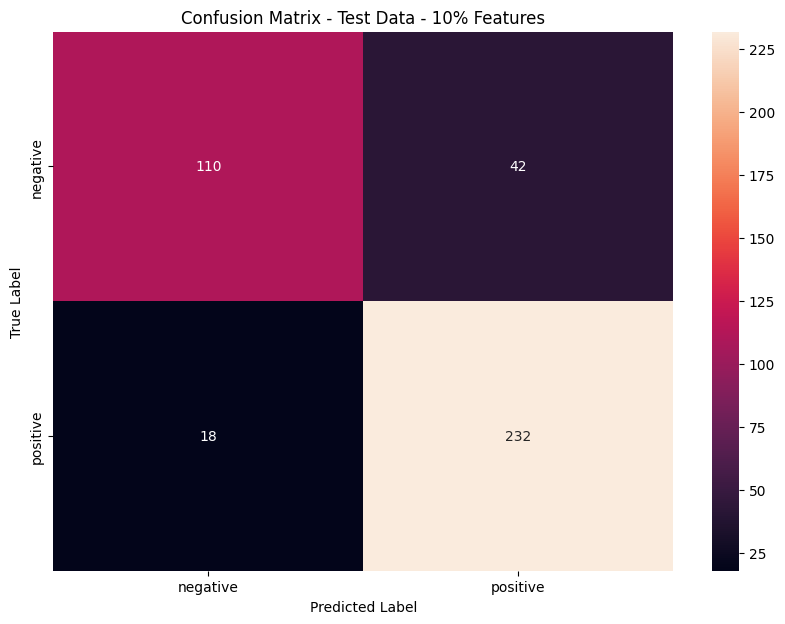

Classification Report - Test Data - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.72      0.79       152
     Positif       0.85      0.93      0.89       250

    accuracy                           0.85       402
   macro avg       0.85      0.83      0.84       402
weighted avg       0.85      0.85      0.85       402



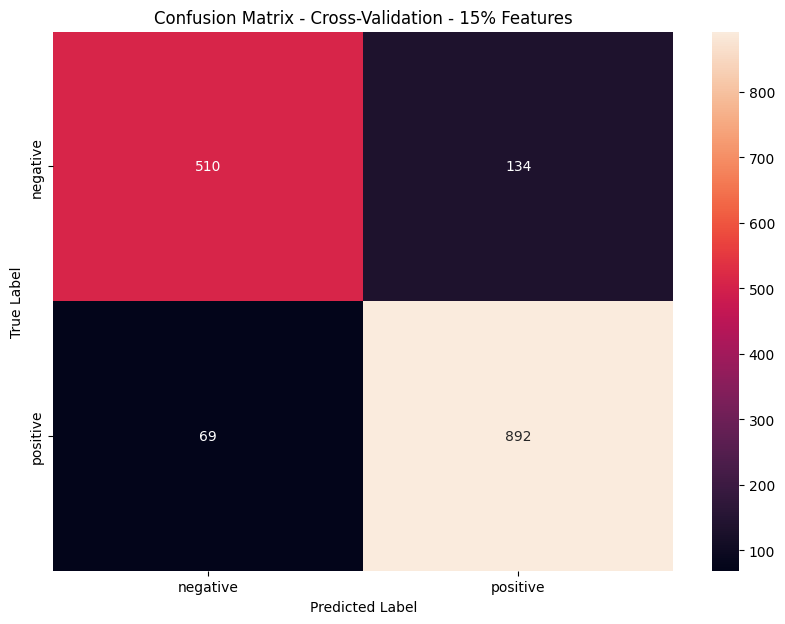

Classification Report - Cross-Validation - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.79      0.83       644
     Positif       0.87      0.93      0.90       961

    accuracy                           0.87      1605
   macro avg       0.88      0.86      0.87      1605
weighted avg       0.87      0.87      0.87      1605

Cross-Validation Scores (15% features): [0.89719626 0.87850467 0.86292835 0.88161994 0.84735202]
Mean Accuracy: 0.8735202492211839
Standard Deviation: 0.017017445836445686
Test Accuracy: 0.8557213930348259
Test Precision: 0.8562794321118555
Test Recall: 0.8557213930348259
Test F1 Score: 0.8531851845862777


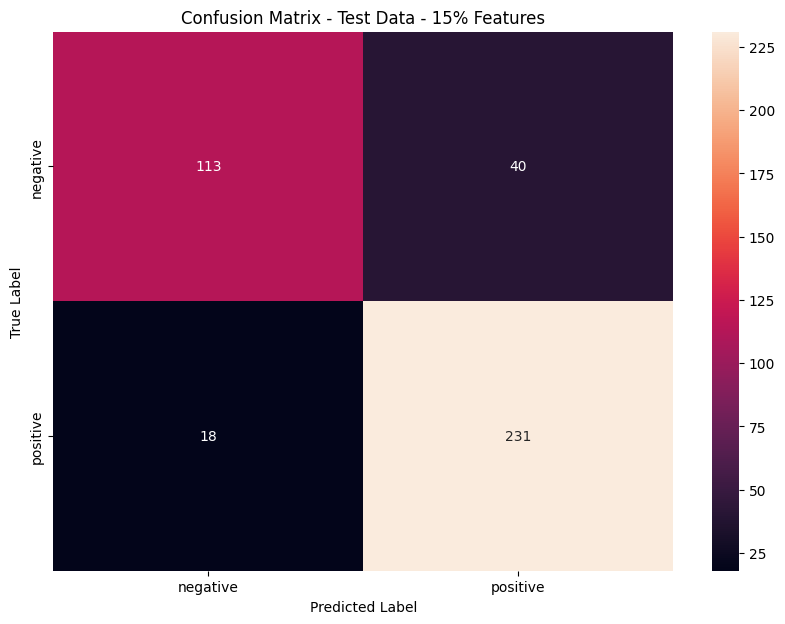

Classification Report - Test Data - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.74      0.80       153
     Positif       0.85      0.93      0.89       249

    accuracy                           0.86       402
   macro avg       0.86      0.83      0.84       402
weighted avg       0.86      0.86      0.85       402



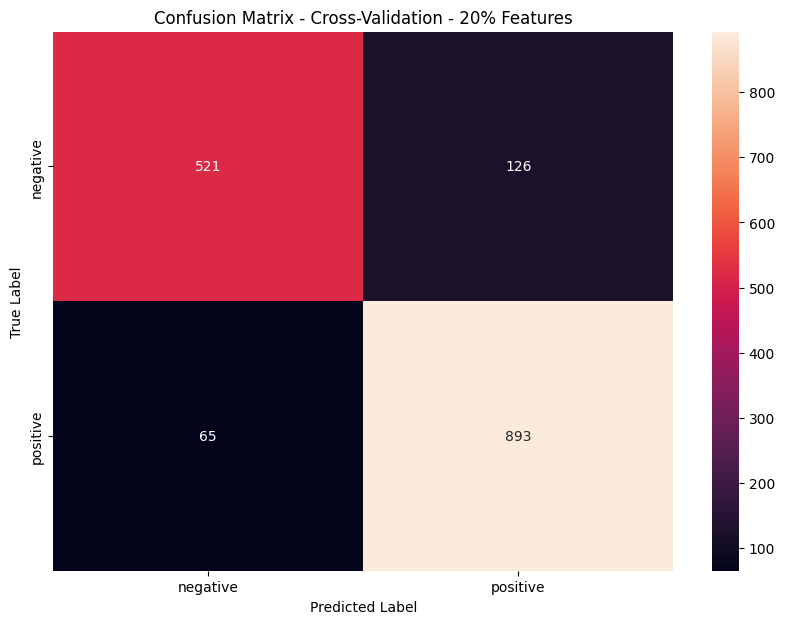

Classification Report - Cross-Validation - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.81      0.85       647
     Positif       0.88      0.93      0.90       958

    accuracy                           0.88      1605
   macro avg       0.88      0.87      0.87      1605
weighted avg       0.88      0.88      0.88      1605

Cross-Validation Scores (20% features): [0.92211838 0.84735202 0.894081   0.88785047 0.85358255]
Mean Accuracy: 0.8809968847352024
Standard Deviation: 0.02754147801283532
Test Accuracy: 0.8681592039800995
Test Precision: 0.8679906037892875
Test Recall: 0.8681592039800995
Test F1 Score: 0.8680692698631416


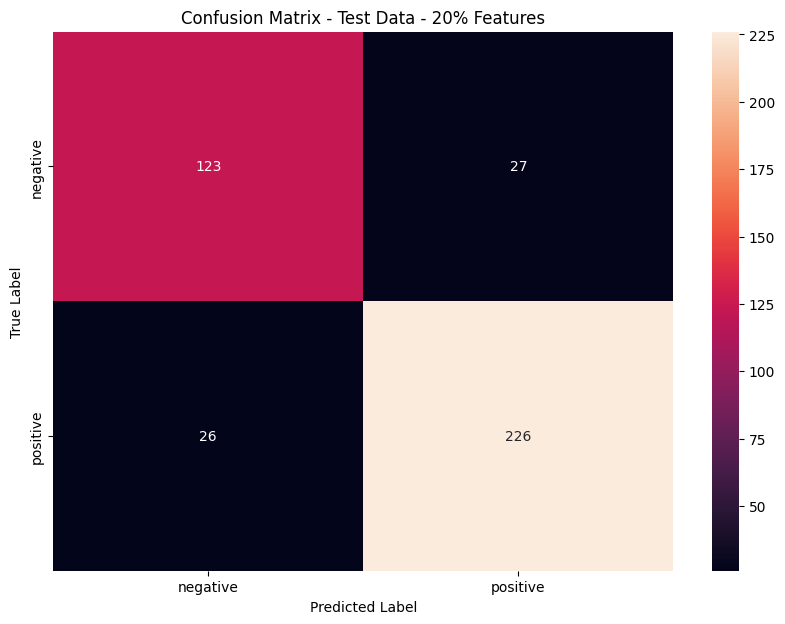

Classification Report - Test Data - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.82      0.82       150
     Positif       0.89      0.90      0.90       252

    accuracy                           0.87       402
   macro avg       0.86      0.86      0.86       402
weighted avg       0.87      0.87      0.87       402



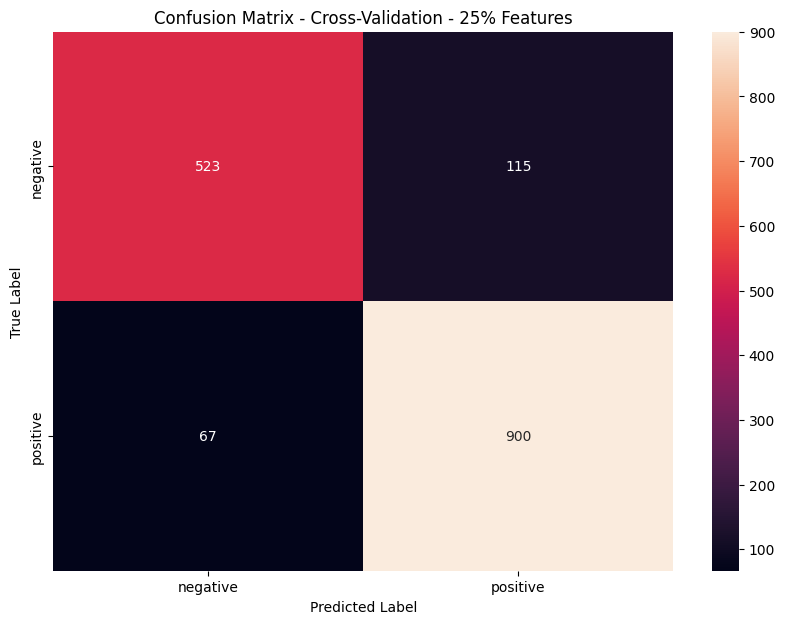

Classification Report - Cross-Validation - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.82      0.85       638
     Positif       0.89      0.93      0.91       967

    accuracy                           0.89      1605
   macro avg       0.89      0.88      0.88      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (25% features): [0.91277259 0.8847352  0.88161994 0.89096573 0.86292835]
Mean Accuracy: 0.8866043613707164
Standard Deviation: 0.01607911264867781
Test Accuracy: 0.9054726368159204
Test Precision: 0.9053193177669868
Test Recall: 0.9054726368159204
Test F1 Score: 0.9050183326543462


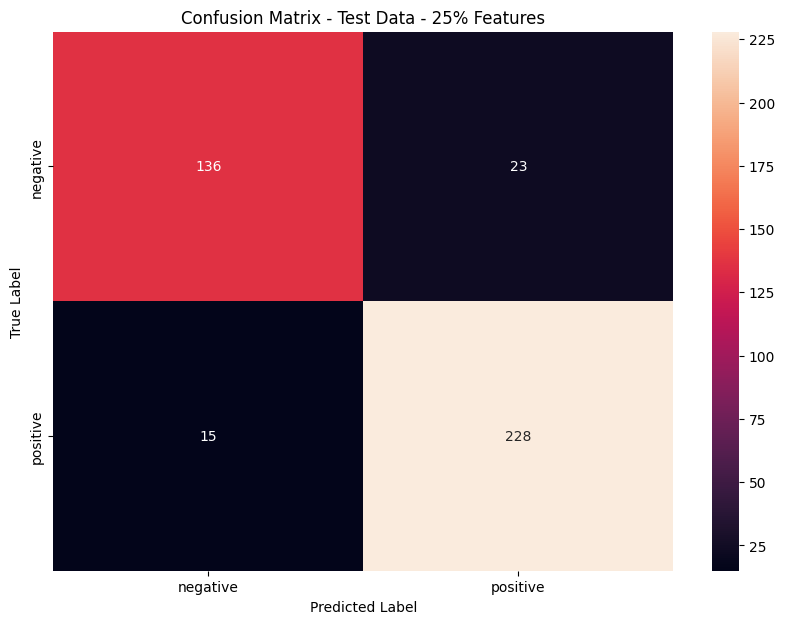

Classification Report - Test Data - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.86      0.88       159
     Positif       0.91      0.94      0.92       243

    accuracy                           0.91       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.91      0.91      0.91       402



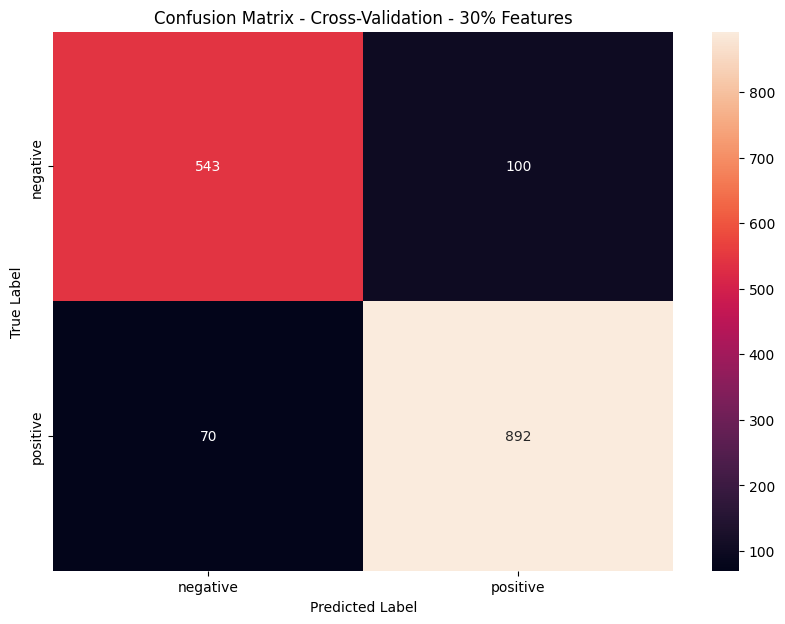

Classification Report - Cross-Validation - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.84      0.86       643
     Positif       0.90      0.93      0.91       962

    accuracy                           0.89      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (30% features): [0.90342679 0.90654206 0.88785047 0.89719626 0.87538941]
Mean Accuracy: 0.8940809968847352
Standard Deviation: 0.011318319080738288
Test Accuracy: 0.9228855721393034
Test Precision: 0.9229294290655938
Test Recall: 0.9228855721393034
Test F1 Score: 0.9224121453726764


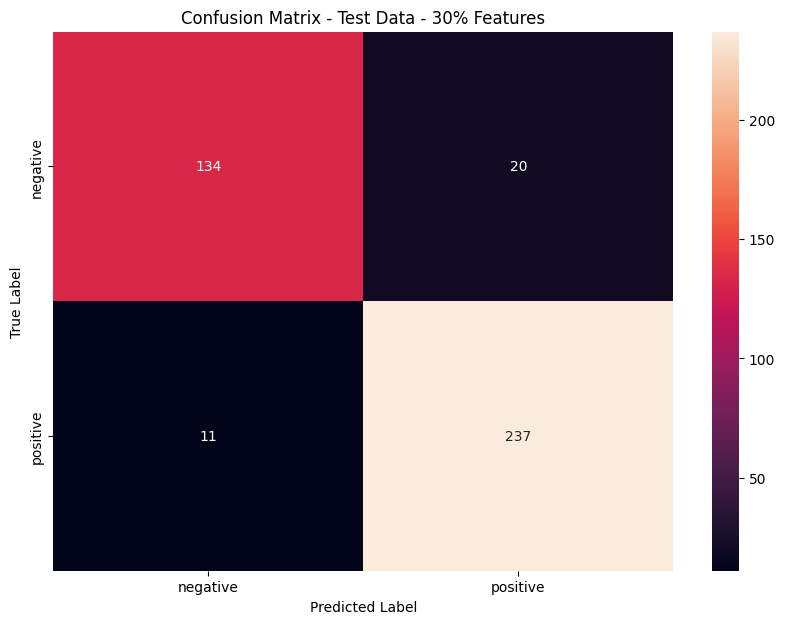

Classification Report - Test Data - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.87      0.90       154
     Positif       0.92      0.96      0.94       248

    accuracy                           0.92       402
   macro avg       0.92      0.91      0.92       402
weighted avg       0.92      0.92      0.92       402



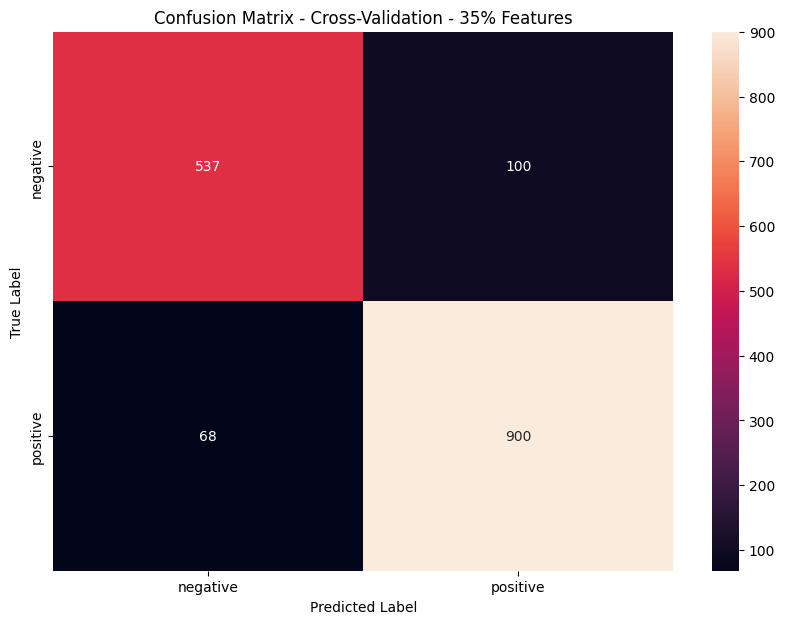

Classification Report - Cross-Validation - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.84      0.86       637
     Positif       0.90      0.93      0.91       968

    accuracy                           0.90      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.90      0.90      0.89      1605

Cross-Validation Scores (35% features): [0.88161994 0.91277259 0.90031153 0.894081   0.88785047]
Mean Accuracy: 0.8953271028037385
Standard Deviation: 0.010719408432451873
Test Accuracy: 0.8830845771144279
Test Precision: 0.8834680748945465
Test Recall: 0.8830845771144279
Test F1 Score: 0.8819668535341624


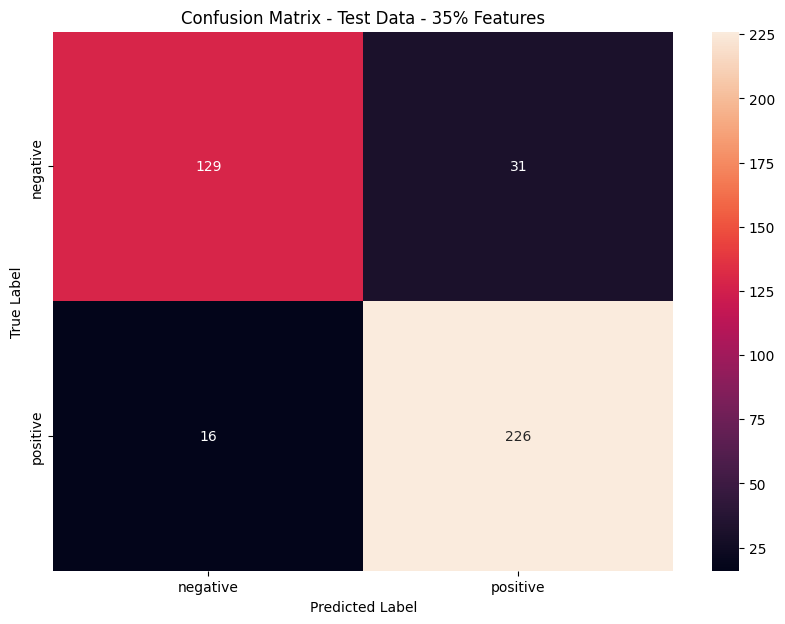

Classification Report - Test Data - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.81      0.85       160
     Positif       0.88      0.93      0.91       242

    accuracy                           0.88       402
   macro avg       0.88      0.87      0.88       402
weighted avg       0.88      0.88      0.88       402



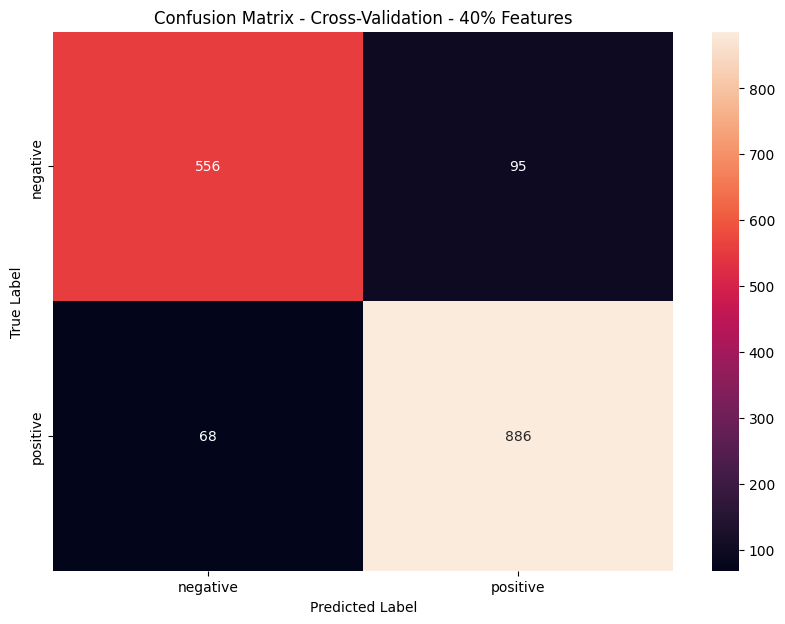

Classification Report - Cross-Validation - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       651
     Positif       0.90      0.93      0.92       954

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (40% features): [0.91588785 0.90342679 0.88161994 0.88785047 0.90342679]
Mean Accuracy: 0.8984423676012462
Standard Deviation: 0.012241048413949223
Test Accuracy: 0.8905472636815921
Test Precision: 0.8899458541534422
Test Recall: 0.8905472636815921
Test F1 Score: 0.8900330542121587


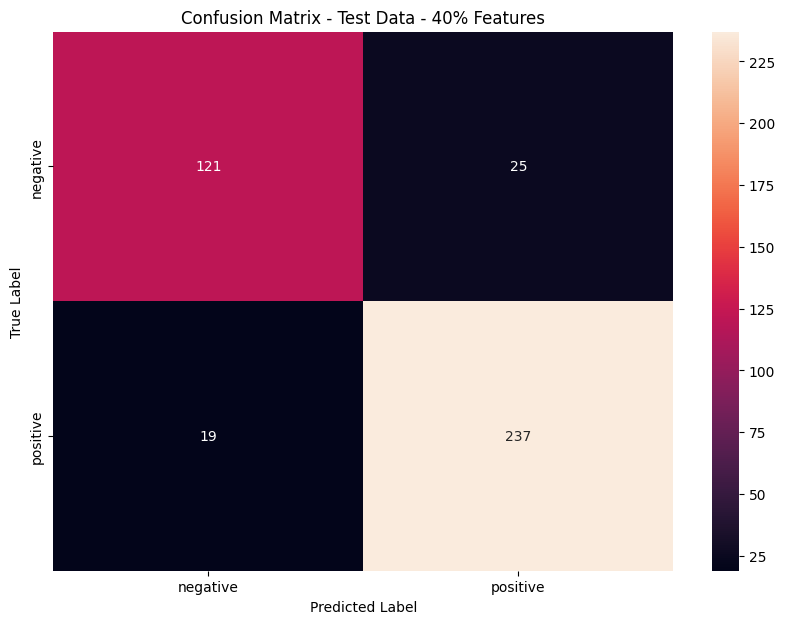

Classification Report - Test Data - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.83      0.85       146
     Positif       0.90      0.93      0.92       256

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



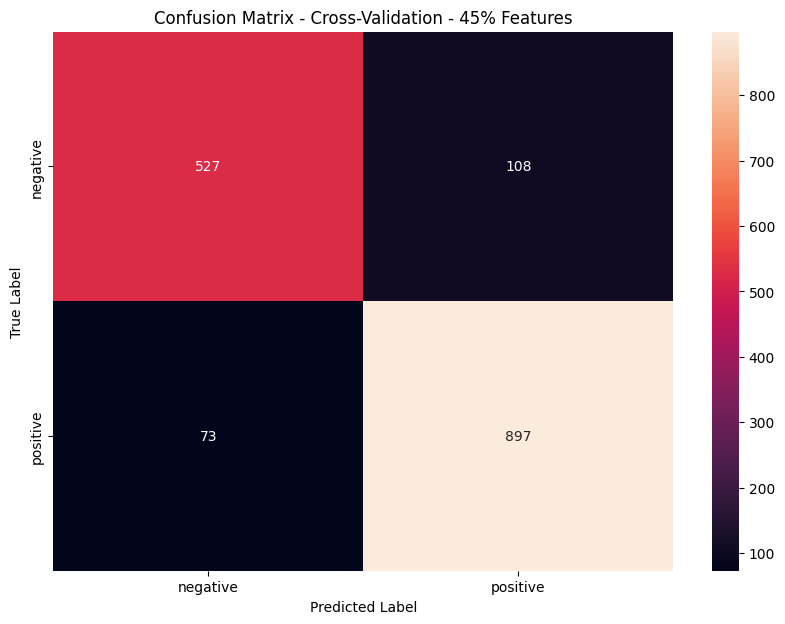

Classification Report - Cross-Validation - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.83      0.85       635
     Positif       0.89      0.92      0.91       970

    accuracy                           0.89      1605
   macro avg       0.89      0.88      0.88      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (45% features): [0.90031153 0.90342679 0.87227414 0.8847352  0.87538941]
Mean Accuracy: 0.8872274143302181
Standard Deviation: 0.012677252304907044
Test Accuracy: 0.9154228855721394
Test Precision: 0.9156480754124117
Test Recall: 0.9154228855721394
Test F1 Score: 0.9149391480139921


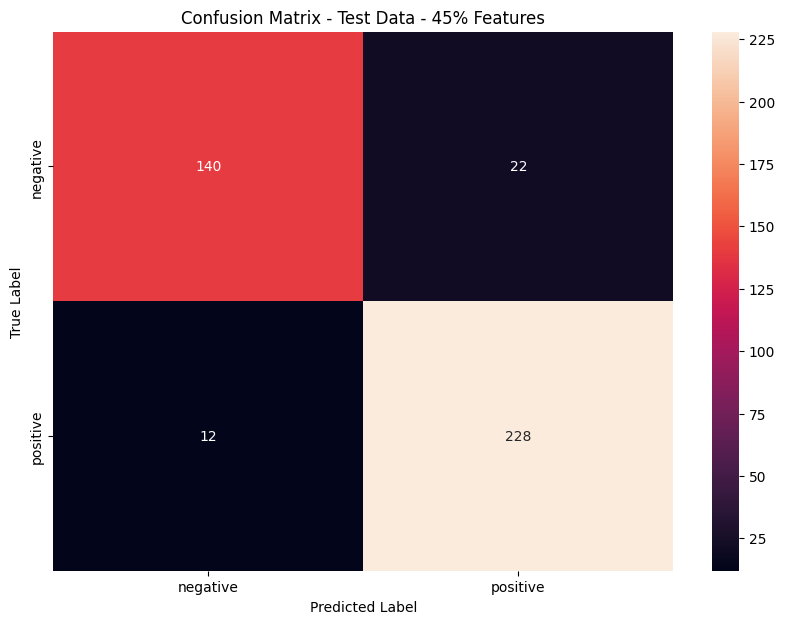

Classification Report - Test Data - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.86      0.89       162
     Positif       0.91      0.95      0.93       240

    accuracy                           0.92       402
   macro avg       0.92      0.91      0.91       402
weighted avg       0.92      0.92      0.91       402



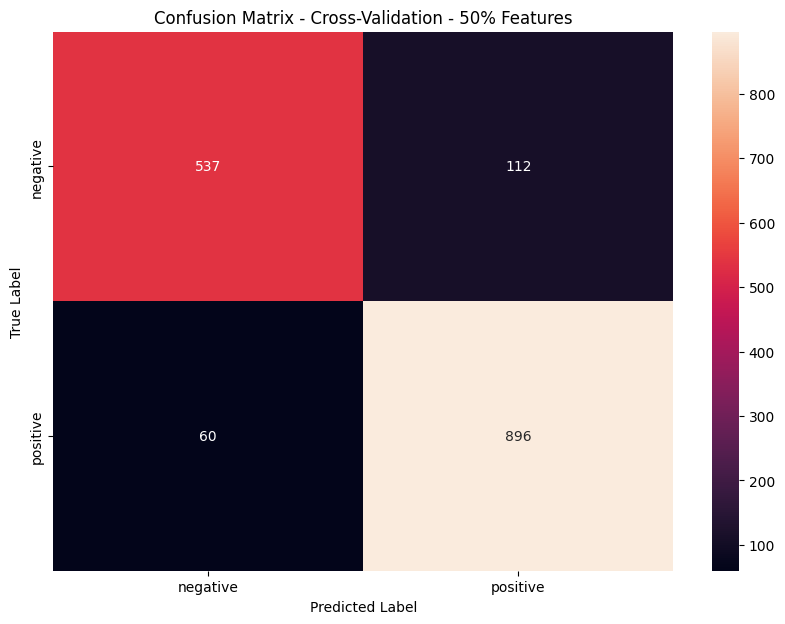

Classification Report - Cross-Validation - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.83      0.86       649
     Positif       0.89      0.94      0.91       956

    accuracy                           0.89      1605
   macro avg       0.89      0.88      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (50% features): [0.90654206 0.88161994 0.8847352  0.88785047 0.90342679]
Mean Accuracy: 0.8928348909657322
Standard Deviation: 0.010161686249408157
Test Accuracy: 0.9029850746268657
Test Precision: 0.9028586559001709
Test Recall: 0.9029850746268657
Test F1 Score: 0.9029159420837274


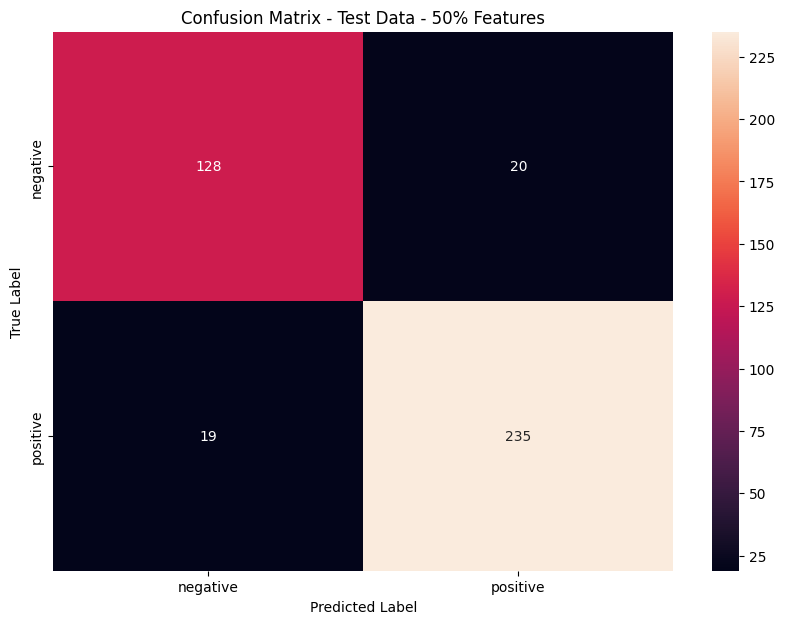

Classification Report - Test Data - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.86      0.87       148
     Positif       0.92      0.93      0.92       254

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



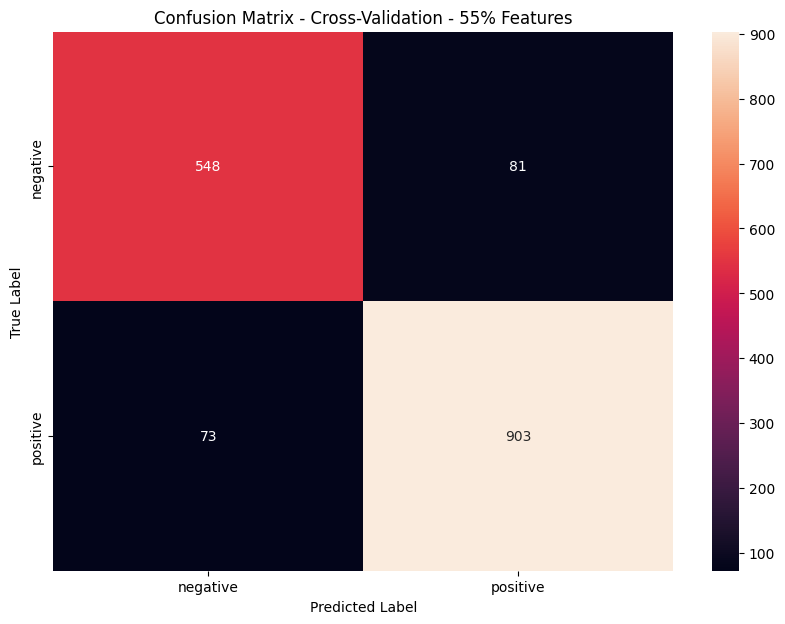

Classification Report - Cross-Validation - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.87      0.88       629
     Positif       0.92      0.93      0.92       976

    accuracy                           0.90      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (55% features): [0.90654206 0.89719626 0.94080997 0.87850467 0.89719626]
Mean Accuracy: 0.9040498442367599
Standard Deviation: 0.020513492377762406
Test Accuracy: 0.900497512437811
Test Precision: 0.9003616178367422
Test Recall: 0.900497512437811
Test F1 Score: 0.9002227069485712


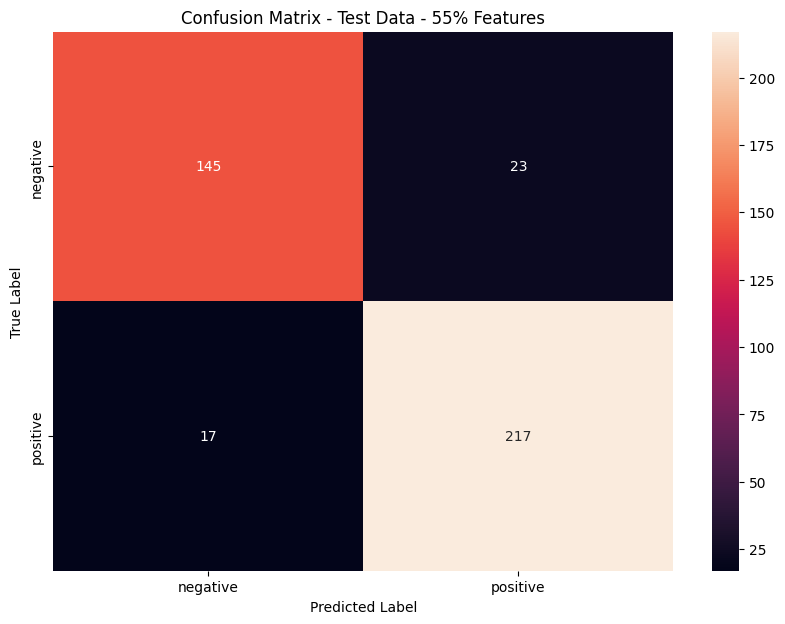

Classification Report - Test Data - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.86      0.88       168
     Positif       0.90      0.93      0.92       234

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



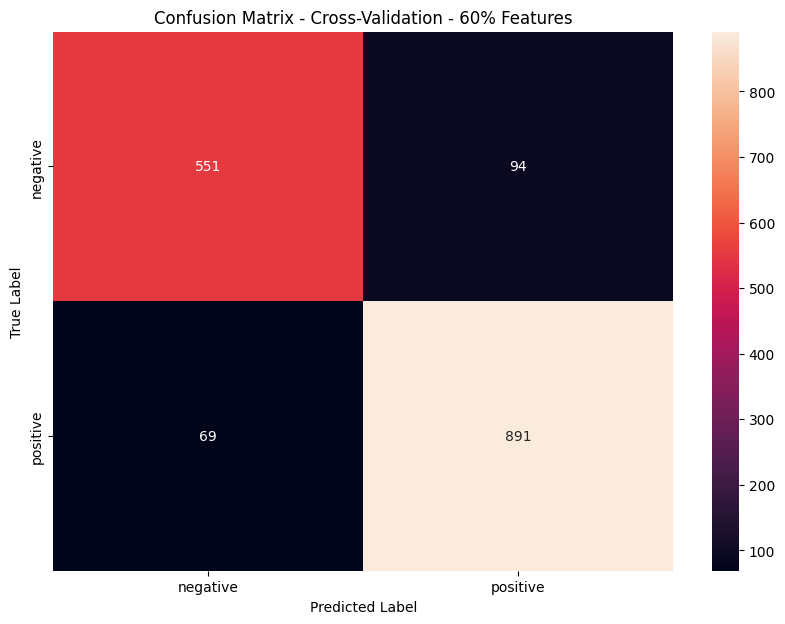

Classification Report - Cross-Validation - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       645
     Positif       0.90      0.93      0.92       960

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (60% features): [0.90031153 0.88161994 0.89096573 0.90031153 0.91900312]
Mean Accuracy: 0.8984423676012462
Standard Deviation: 0.012398597347122993
Test Accuracy: 0.9054726368159204
Test Precision: 0.9051523611989002
Test Recall: 0.9054726368159204
Test F1 Score: 0.9052175629787569


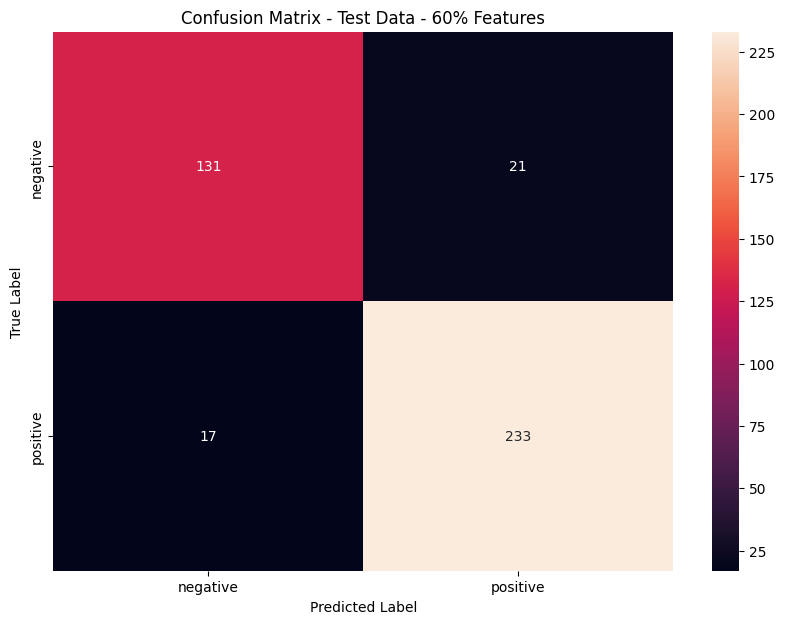

Classification Report - Test Data - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.86      0.87       152
     Positif       0.92      0.93      0.92       250

    accuracy                           0.91       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.91      0.91      0.91       402



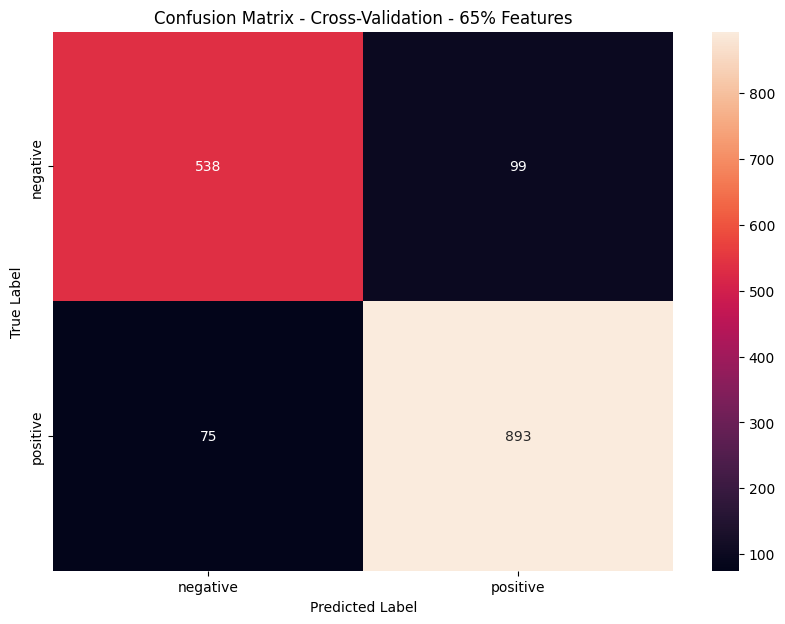

Classification Report - Cross-Validation - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.84      0.86       637
     Positif       0.90      0.92      0.91       968

    accuracy                           0.89      1605
   macro avg       0.89      0.88      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (65% features): [0.90342679 0.90654206 0.87227414 0.90342679 0.87227414]
Mean Accuracy: 0.8915887850467289
Standard Deviation: 0.01581131157688414
Test Accuracy: 0.8830845771144279
Test Precision: 0.882915449016952
Test Recall: 0.8830845771144279
Test F1 Score: 0.8823026185147617


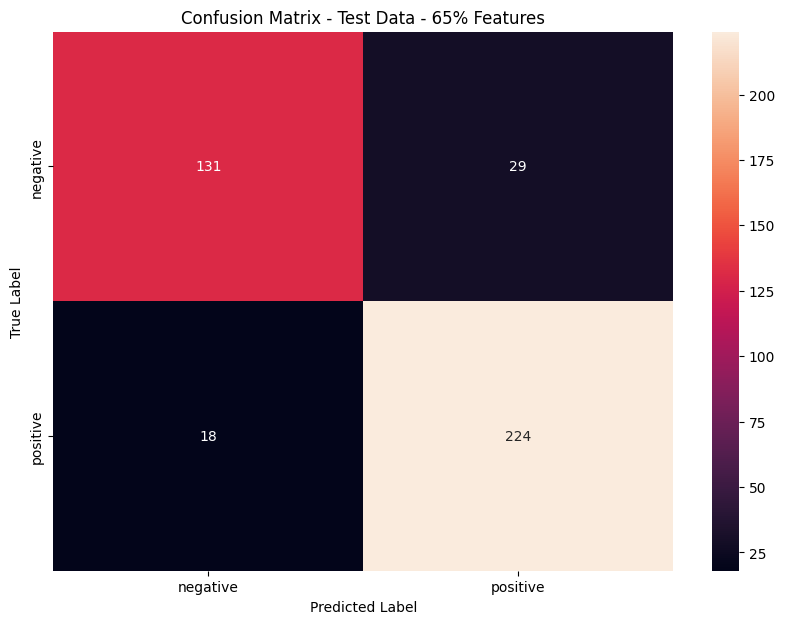

Classification Report - Test Data - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.82      0.85       160
     Positif       0.89      0.93      0.91       242

    accuracy                           0.88       402
   macro avg       0.88      0.87      0.88       402
weighted avg       0.88      0.88      0.88       402



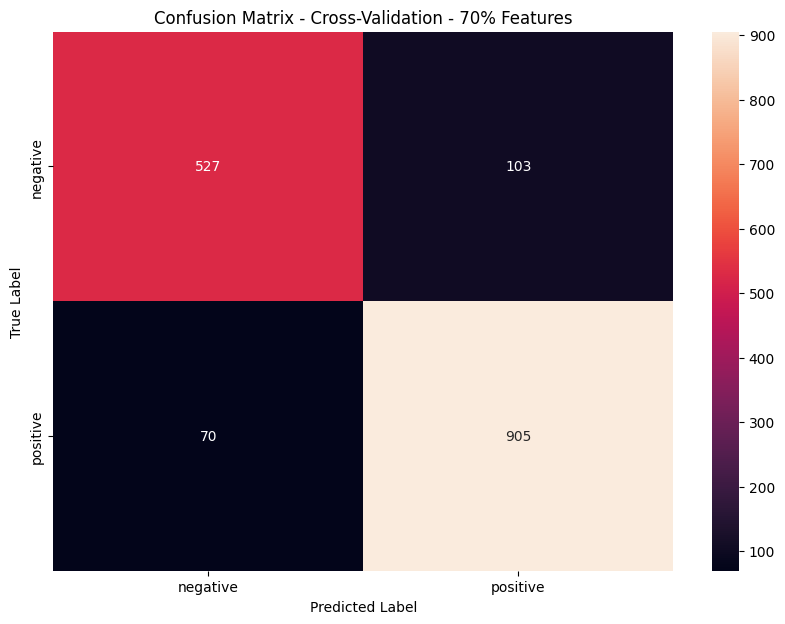

Classification Report - Cross-Validation - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.84      0.86       630
     Positif       0.90      0.93      0.91       975

    accuracy                           0.89      1605
   macro avg       0.89      0.88      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (70% features): [0.90031153 0.88161994 0.89096573 0.88785047 0.90031153]
Mean Accuracy: 0.8922118380062305
Standard Deviation: 0.007265983669589161
Test Accuracy: 0.9054726368159204
Test Precision: 0.9054726368159204
Test Recall: 0.9054726368159204
Test F1 Score: 0.9054726368159204


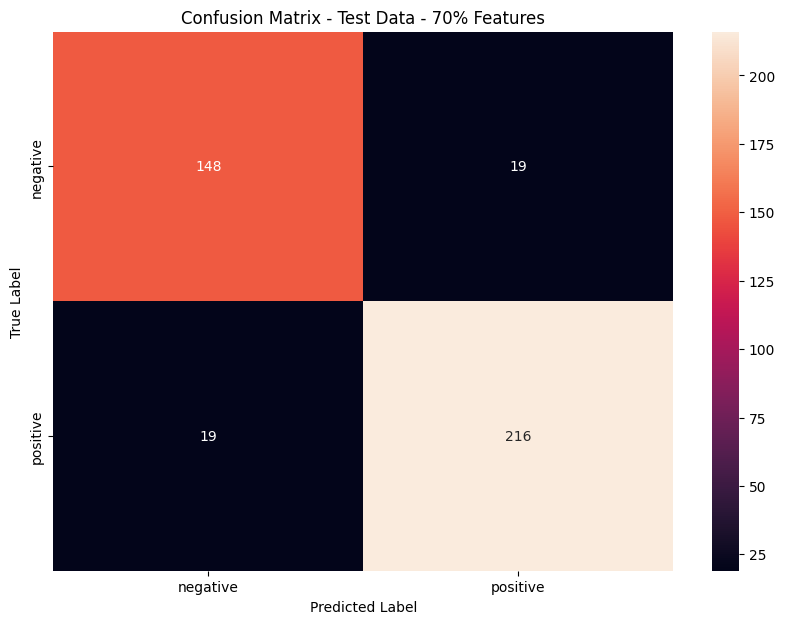

Classification Report - Test Data - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.89      0.89       167
     Positif       0.92      0.92      0.92       235

    accuracy                           0.91       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.91      0.91      0.91       402



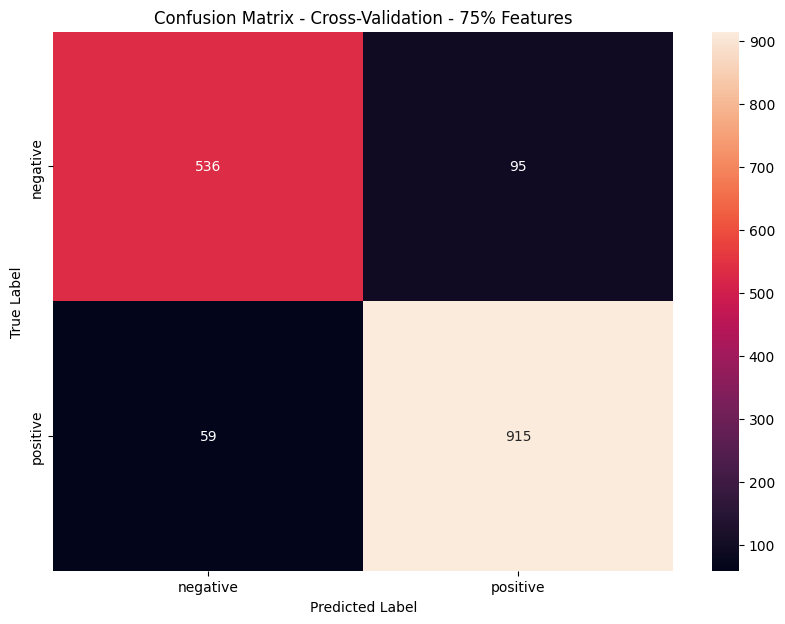

Classification Report - Cross-Validation - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.85      0.87       631
     Positif       0.91      0.94      0.92       974

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (75% features): [0.93146417 0.90654206 0.89719626 0.90031153 0.8847352 ]
Mean Accuracy: 0.9040498442367602
Standard Deviation: 0.015438643854659026
Test Accuracy: 0.8980099502487562
Test Precision: 0.8982422353428107
Test Recall: 0.8980099502487562
Test F1 Score: 0.8974238345626024


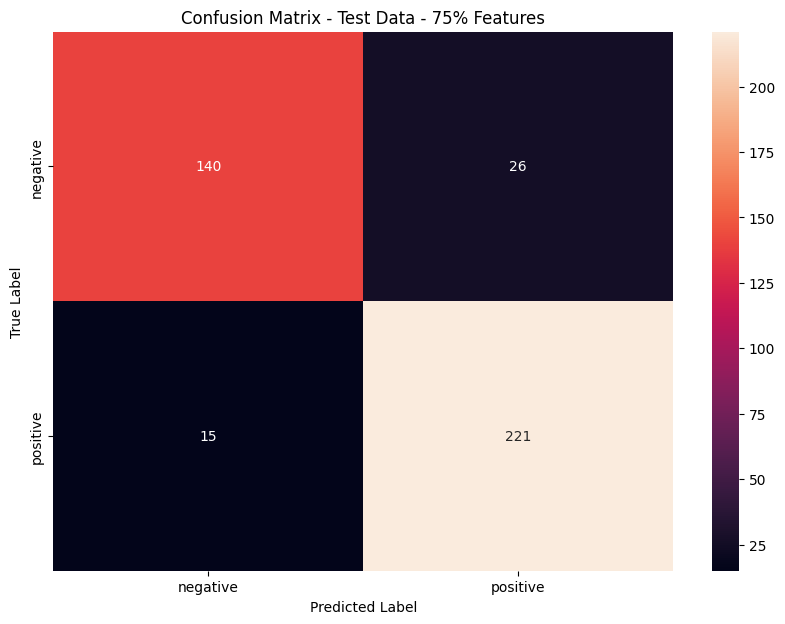

Classification Report - Test Data - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.84      0.87       166
     Positif       0.89      0.94      0.92       236

    accuracy                           0.90       402
   macro avg       0.90      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



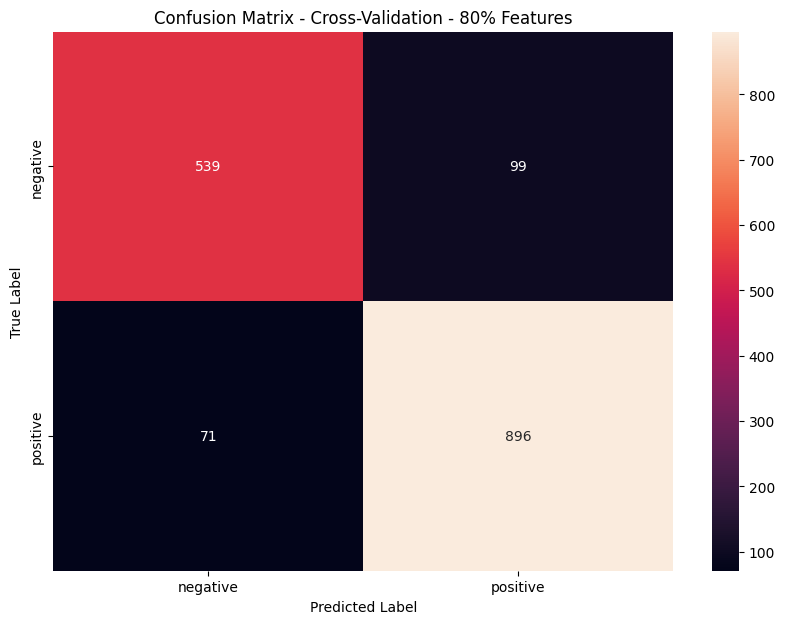

Classification Report - Cross-Validation - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.84      0.86       638
     Positif       0.90      0.93      0.91       967

    accuracy                           0.89      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (80% features): [0.90031153 0.92834891 0.87538941 0.87538941 0.89096573]
Mean Accuracy: 0.8940809968847352
Standard Deviation: 0.019603903704114984
Test Accuracy: 0.9154228855721394
Test Precision: 0.9154228855721394
Test Recall: 0.9154228855721394
Test F1 Score: 0.9154228855721394


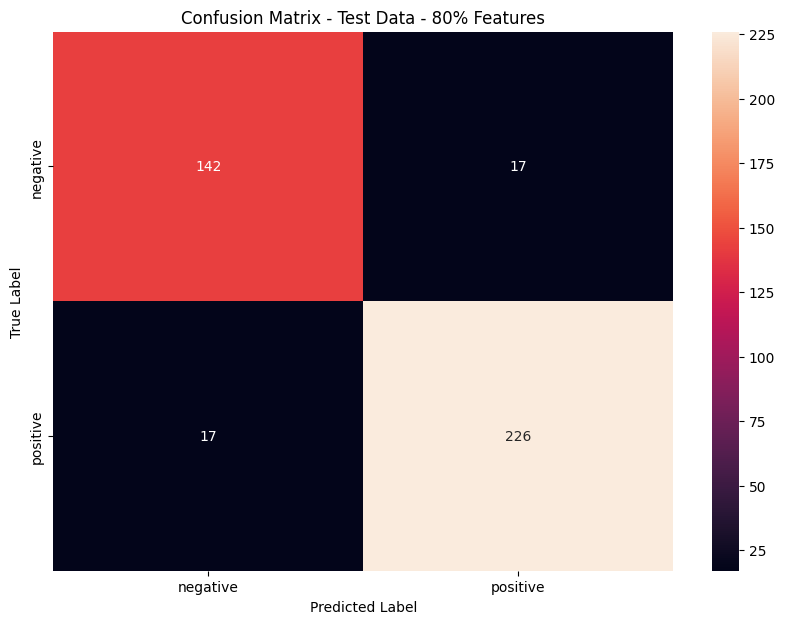

Classification Report - Test Data - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.89      0.89       159
     Positif       0.93      0.93      0.93       243

    accuracy                           0.92       402
   macro avg       0.91      0.91      0.91       402
weighted avg       0.92      0.92      0.92       402



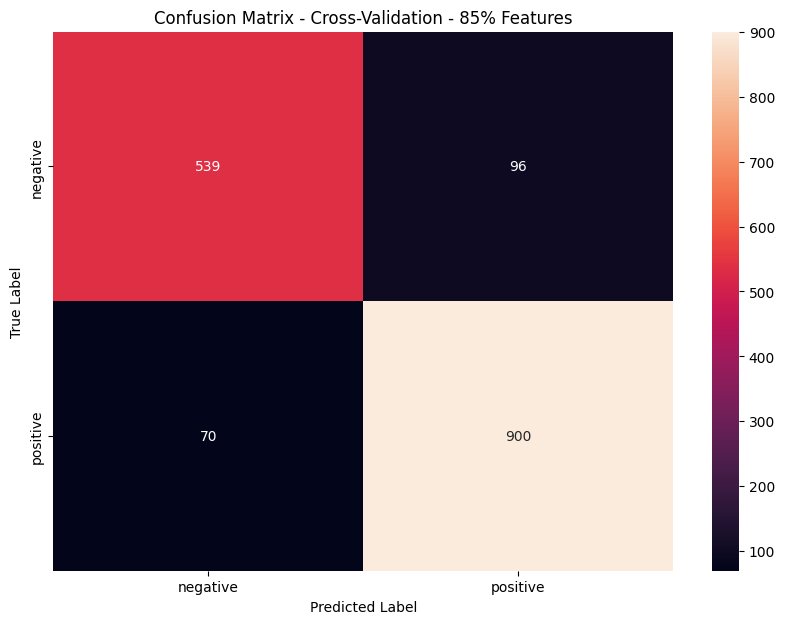

Classification Report - Cross-Validation - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       635
     Positif       0.90      0.93      0.92       970

    accuracy                           0.90      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (85% features): [0.86915888 0.89719626 0.87850467 0.92523364 0.91277259]
Mean Accuracy: 0.8965732087227414
Standard Deviation: 0.02079541341841575
Test Accuracy: 0.8930348258706468
Test Precision: 0.8929374416030977
Test Recall: 0.8930348258706468
Test F1 Score: 0.8929804355154385


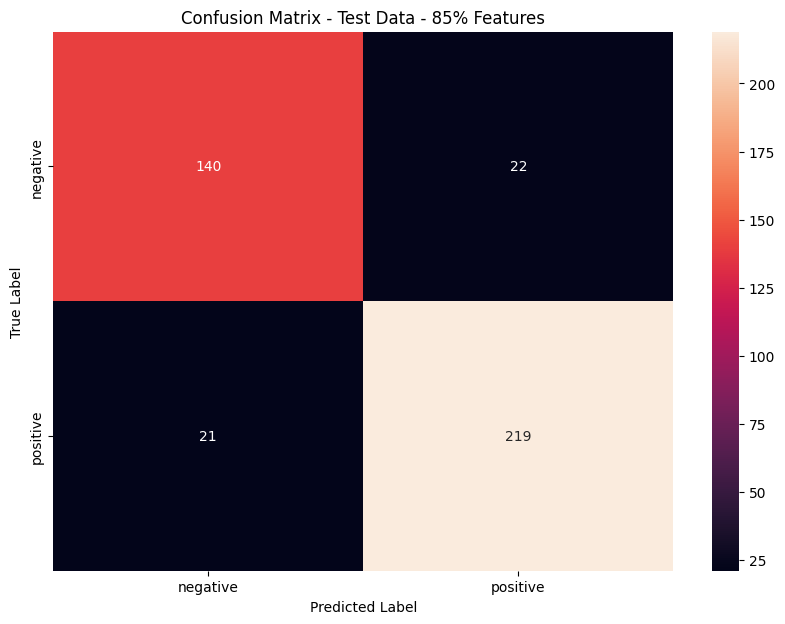

Classification Report - Test Data - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.86      0.87       162
     Positif       0.91      0.91      0.91       240

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402



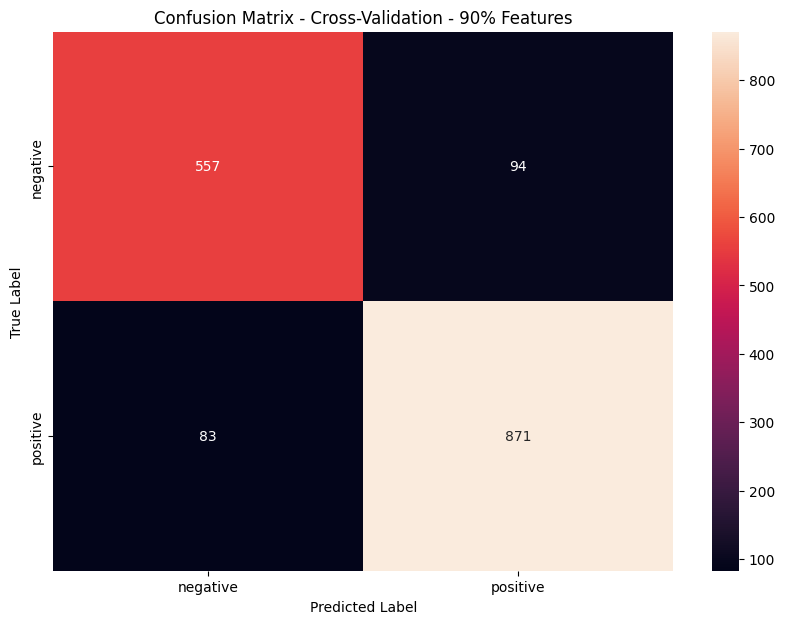

Classification Report - Cross-Validation - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.86      0.86       651
     Positif       0.90      0.91      0.91       954

    accuracy                           0.89      1605
   macro avg       0.89      0.88      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (90% features): [0.8847352  0.90654206 0.894081   0.894081   0.86915888]
Mean Accuracy: 0.8897196261682243
Standard Deviation: 0.012398597347122993
Test Accuracy: 0.8930348258706468
Test Precision: 0.8928875013100337
Test Recall: 0.8930348258706468
Test F1 Score: 0.8929552914673433


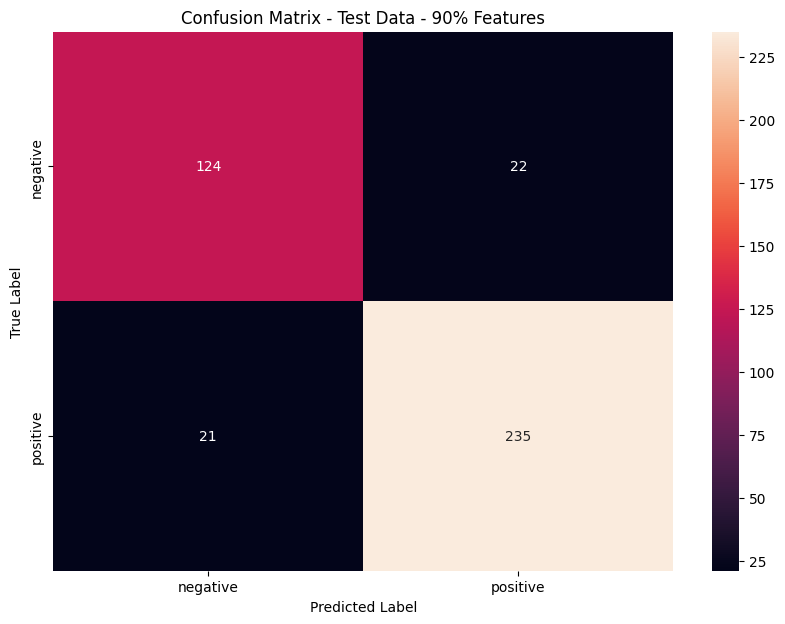

Classification Report - Test Data - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.85      0.85       146
     Positif       0.91      0.92      0.92       256

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



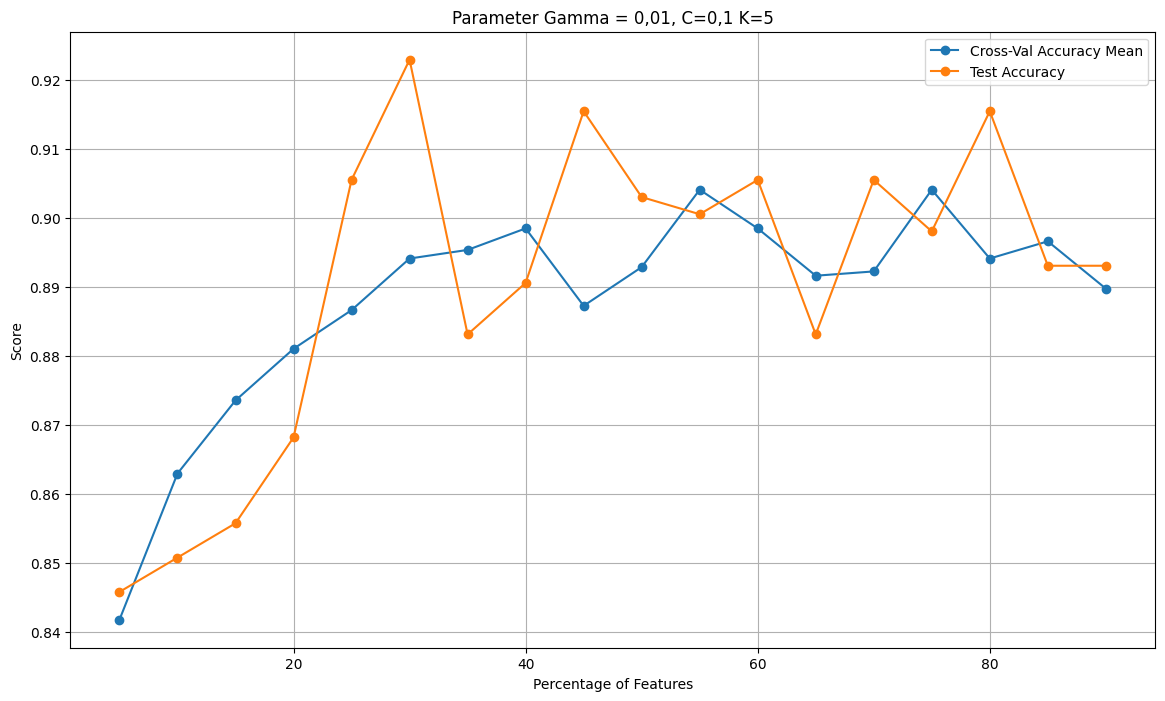

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')

# Daftar persentase fitur yang akan dievaluasi
persen_fitur_list = range(5, 95, 5)

# Menyimpan hasil performa untuk setiap persentase fitur
all_performances = []

# Melakukan seleksi fitur dan evaluasi model
for persen_fitur in persen_fitur_list:
    # Menentukan jumlah fitur yang akan dipilih
    num_feature_to_select = int(persen_fitur * tf_idf.shape[1] / 100)

    # Seleksi fitur menggunakan SelectKBest
    selector = SelectKBest(f_classif, k=num_feature_to_select)
    X_selected = selector.fit_transform(tf_idf, y)

    # Membagi data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=True)

    # Membuat model SVM
    modelsvm = SVC(kernel='linear', gamma=0.01, C=1)

    # Menggunakan k-fold cross-validation dengan k=5
    k = 5
    scores = cross_val_score(modelsvm, X_train, y_train, cv=k)
    y_train_pred = cross_val_predict(modelsvm, X_train, y_train, cv=k)

    # Confusion Matrix untuk cross-validation
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Cross-Validation - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report
    print(f"Classification Report - Cross-Validation - {persen_fitur}% Features:")
    print(classification_report(y_train, y_train_pred))

    # Menampilkan performa cross-validation
    print(f"Cross-Validation Scores ({persen_fitur}% features): {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

    # Melatih model dengan seluruh data latih
    modelsvm.fit(X_train, y_train)

    # Memprediksi data uji
    y_pred = modelsvm.predict(X_test)

    # Menghitung performa pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test F1 Score: {f1}")

    # Confusion Matrix untuk data uji
    conf_matrix_test = confusion_matrix(y_test, y_pred)
    df_cm_test = pd.DataFrame(conf_matrix_test, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix untuk data uji
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm_test, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Test Data - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report untuk data uji
    print(f"Classification Report - Test Data - {persen_fitur}% Features:")
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil performa
    performance = {
        'persen_fitur': persen_fitur,
        'cross_val_accuracy_mean': scores.mean(),
        'cross_val_accuracy_std': scores.std(),
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1
    }
    all_performances.append(performance)

# Visualisasi performa berdasarkan persentase fitur
df_performance = pd.DataFrame(all_performances)

plt.figure(figsize=(14, 8))
plt.plot(df_performance['persen_fitur'], df_performance['cross_val_accuracy_mean'], marker='o', label='Cross-Val Accuracy Mean')
plt.plot(df_performance['persen_fitur'], df_performance['test_accuracy'], marker='o', label='Test Accuracy')


plt.title('Performance Metrics for Different Percentages of Features')
plt.title('Parameter Gamma = 0,01, C=0,1 K=5')
plt.xlabel('Percentage of Features')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## PARAMETER GAMMA = 0,01 C = 1, K=7


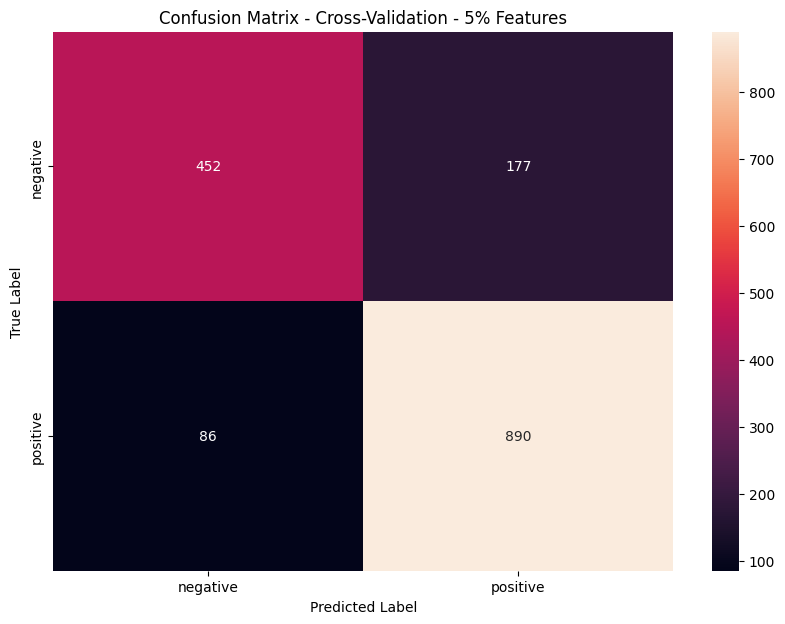

Classification Report - Cross-Validation - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.72      0.77       629
     Positif       0.83      0.91      0.87       976

    accuracy                           0.84      1605
   macro avg       0.84      0.82      0.82      1605
weighted avg       0.84      0.84      0.83      1605

Cross-Validation Scores (5% features): [0.8173913  0.86956522 0.80786026 0.83842795 0.82532751 0.85152838
 0.84279476]
Mean Accuracy: 0.8361279123382788
Standard Deviation: 0.019536537666034928
Test Accuracy: 0.8383084577114428
Test Precision: 0.8470107932100296
Test Recall: 0.8383084577114428
Test F1 Score: 0.8339112518216996


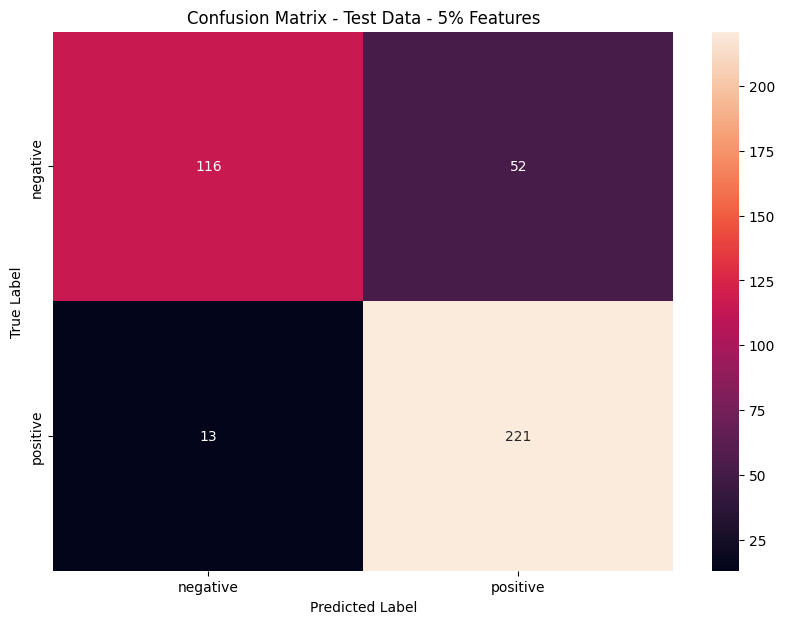

Classification Report - Test Data - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.69      0.78       168
     Positif       0.81      0.94      0.87       234

    accuracy                           0.84       402
   macro avg       0.85      0.82      0.83       402
weighted avg       0.85      0.84      0.83       402



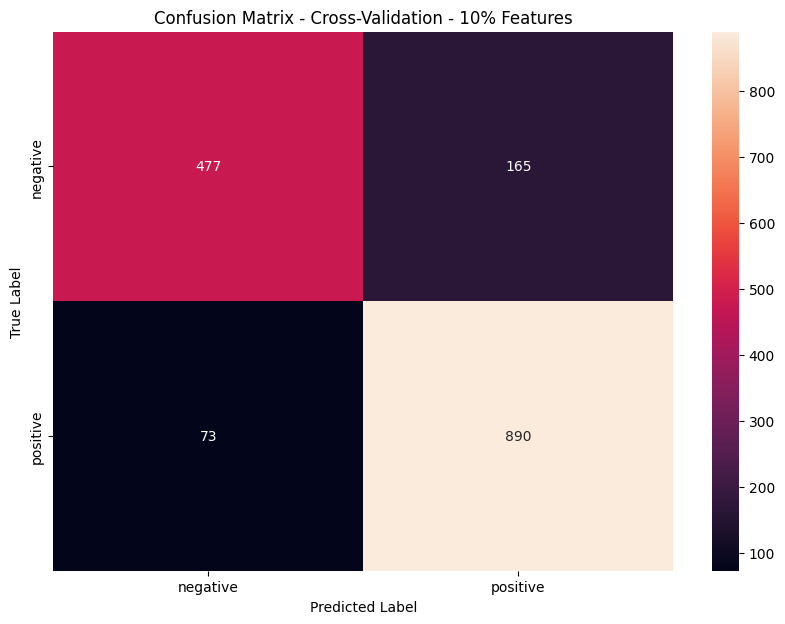

Classification Report - Cross-Validation - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.74      0.80       642
     Positif       0.84      0.92      0.88       963

    accuracy                           0.85      1605
   macro avg       0.86      0.83      0.84      1605
weighted avg       0.85      0.85      0.85      1605

Cross-Validation Scores (10% features): [0.81304348 0.89130435 0.84279476 0.85152838 0.85152838 0.84716157
 0.86462882]
Mean Accuracy: 0.851712821069191
Standard Deviation: 0.02181069146473105
Test Accuracy: 0.8756218905472637
Test Precision: 0.8754458732667467
Test Recall: 0.8756218905472637
Test F1 Score: 0.87439438792418


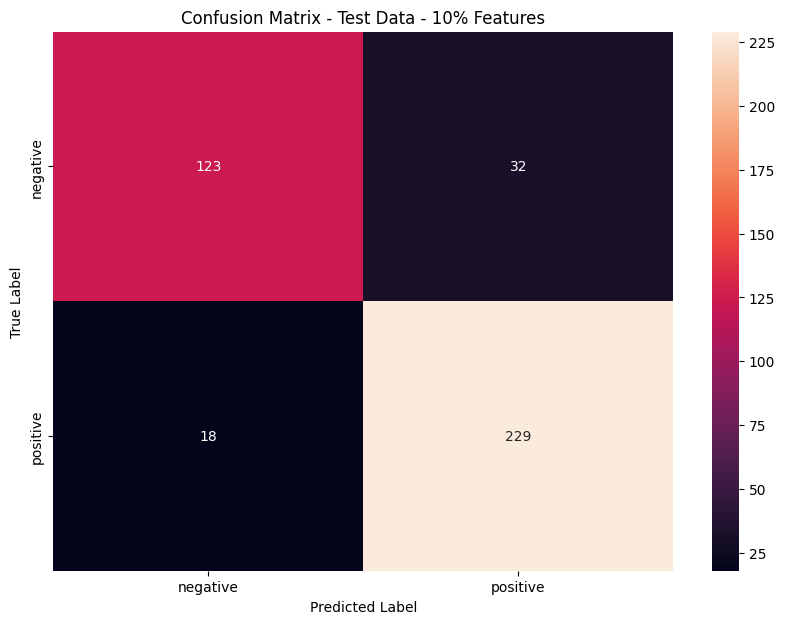

Classification Report - Test Data - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.79      0.83       155
     Positif       0.88      0.93      0.90       247

    accuracy                           0.88       402
   macro avg       0.87      0.86      0.87       402
weighted avg       0.88      0.88      0.87       402



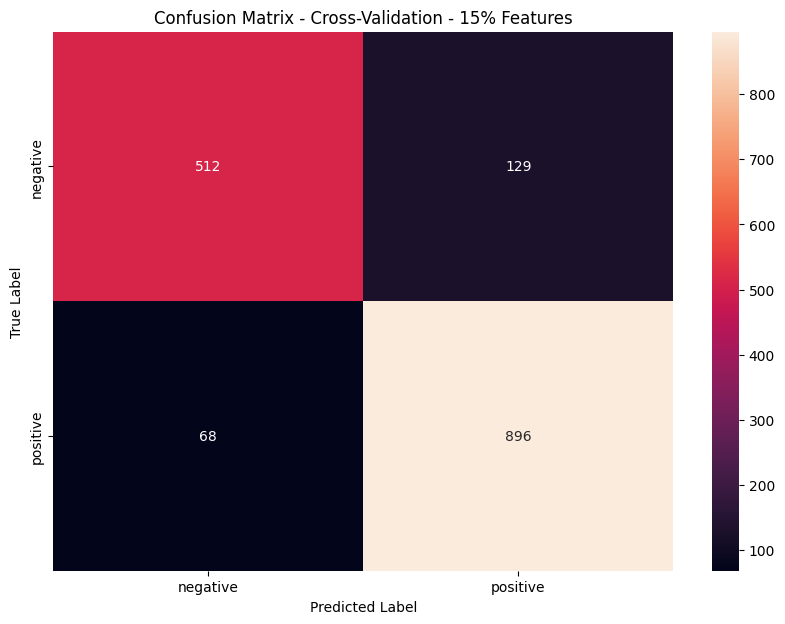

Classification Report - Cross-Validation - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.80      0.84       641
     Positif       0.87      0.93      0.90       964

    accuracy                           0.88      1605
   macro avg       0.88      0.86      0.87      1605
weighted avg       0.88      0.88      0.88      1605

Cross-Validation Scores (15% features): [0.9        0.89130435 0.83406114 0.88646288 0.85152838 0.86899563
 0.90829694]
Mean Accuracy: 0.8772356179988609
Standard Deviation: 0.024953928233924776
Test Accuracy: 0.8855721393034826
Test Precision: 0.8851220090026061
Test Recall: 0.8855721393034826
Test F1 Score: 0.8851396219939752


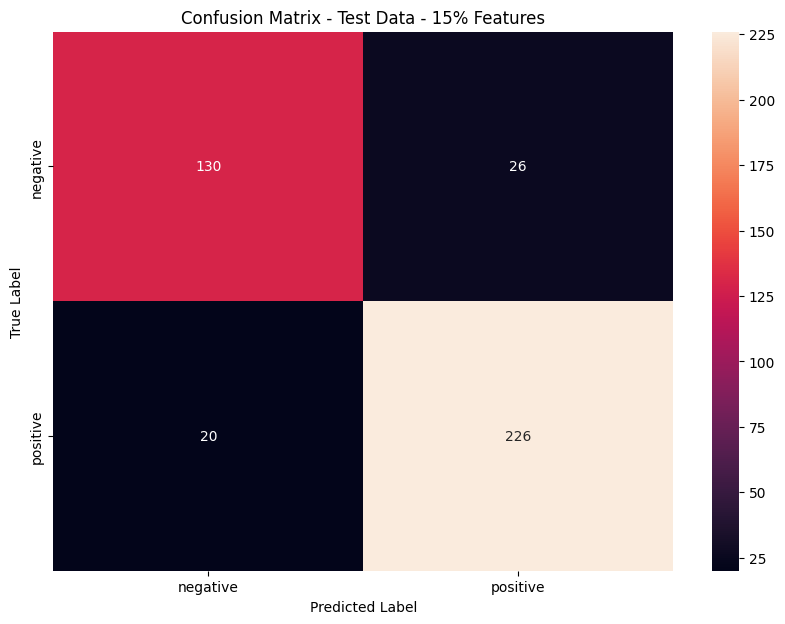

Classification Report - Test Data - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.83      0.85       156
     Positif       0.90      0.92      0.91       246

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



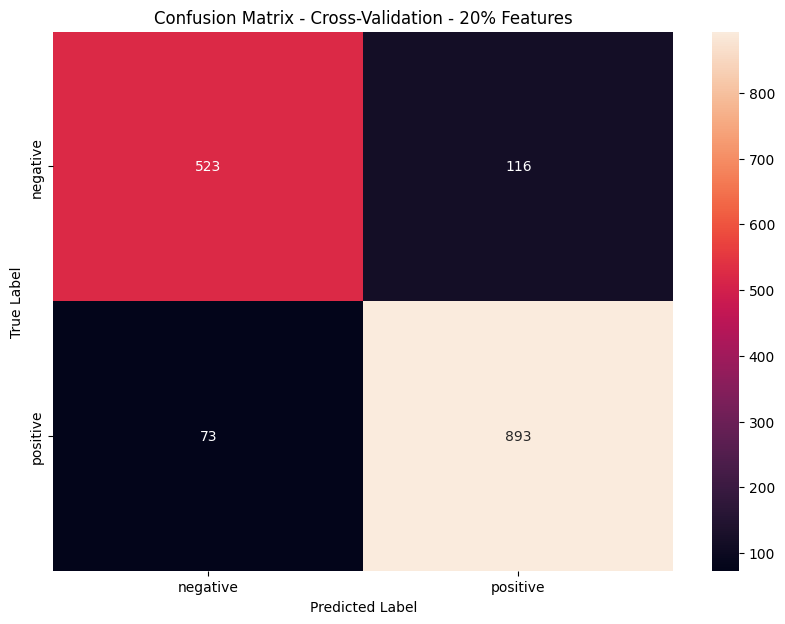

Classification Report - Cross-Validation - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.82      0.85       639
     Positif       0.89      0.92      0.90       966

    accuracy                           0.88      1605
   macro avg       0.88      0.87      0.88      1605
weighted avg       0.88      0.88      0.88      1605

Cross-Validation Scores (20% features): [0.87391304 0.8826087  0.91266376 0.88646288 0.87772926 0.87772926
 0.86462882]
Mean Accuracy: 0.8822479589899375
Standard Deviation: 0.013957888439226867
Test Accuracy: 0.8805970149253731
Test Precision: 0.8804149202617051
Test Recall: 0.8805970149253731
Test F1 Score: 0.8796732128829536


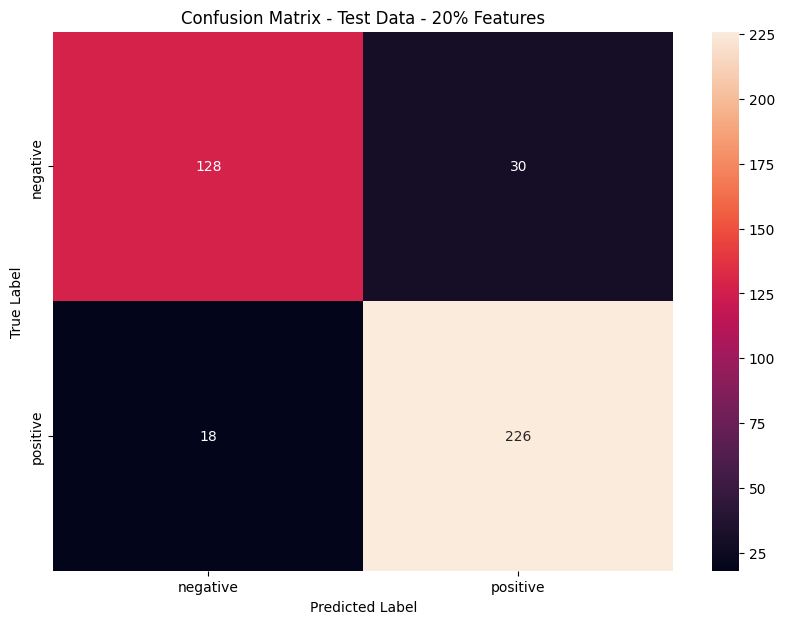

Classification Report - Test Data - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.81      0.84       158
     Positif       0.88      0.93      0.90       244

    accuracy                           0.88       402
   macro avg       0.88      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



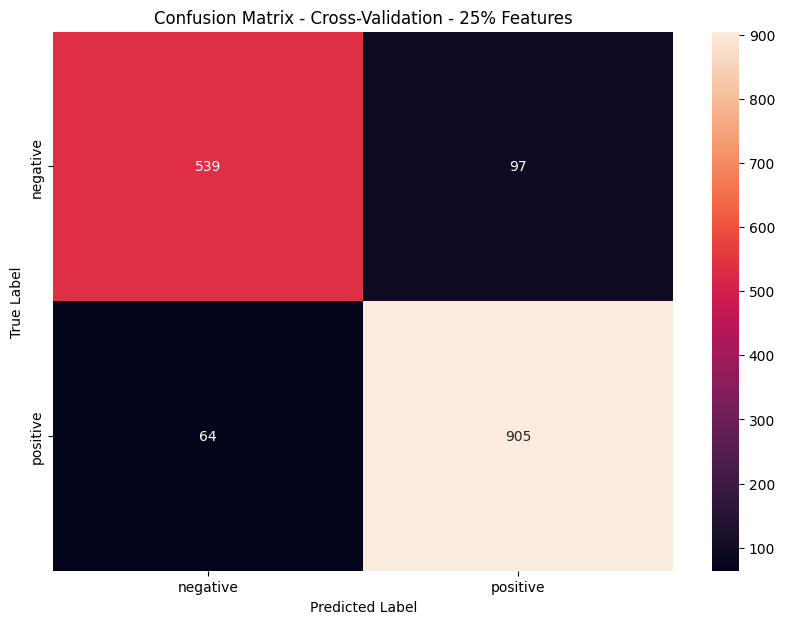

Classification Report - Cross-Validation - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       636
     Positif       0.90      0.93      0.92       969

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (25% features): [0.8826087  0.9        0.89082969 0.92139738 0.92576419 0.87772926
 0.89956332]
Mean Accuracy: 0.8996989340638476
Standard Deviation: 0.01691886355374083
Test Accuracy: 0.8930348258706468
Test Precision: 0.8936837377751653
Test Recall: 0.8930348258706468
Test F1 Score: 0.8920358327383393


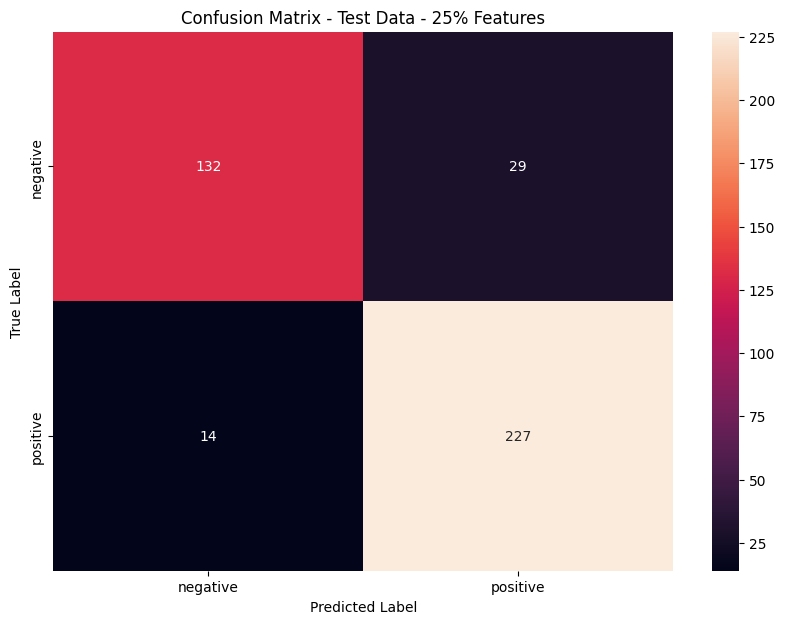

Classification Report - Test Data - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.82      0.86       161
     Positif       0.89      0.94      0.91       241

    accuracy                           0.89       402
   macro avg       0.90      0.88      0.89       402
weighted avg       0.89      0.89      0.89       402



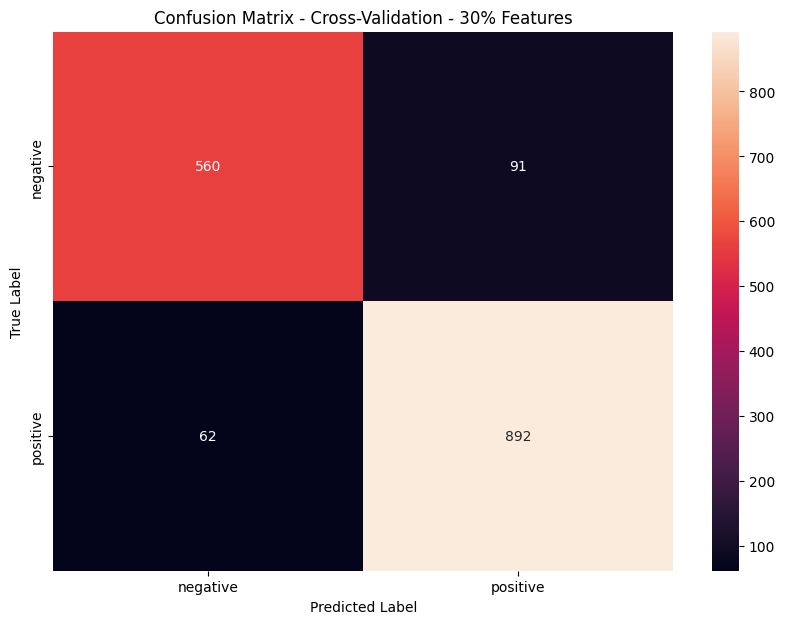

Classification Report - Cross-Validation - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.86      0.88       651
     Positif       0.91      0.94      0.92       954

    accuracy                           0.90      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (30% features): [0.9173913  0.90869565 0.89519651 0.92139738 0.89082969 0.88646288
 0.91266376]
Mean Accuracy: 0.9046624535517643
Standard Deviation: 0.012730967351337762
Test Accuracy: 0.9029850746268657
Test Precision: 0.9031381706911621
Test Recall: 0.9029850746268657
Test F1 Score: 0.9030557025655636


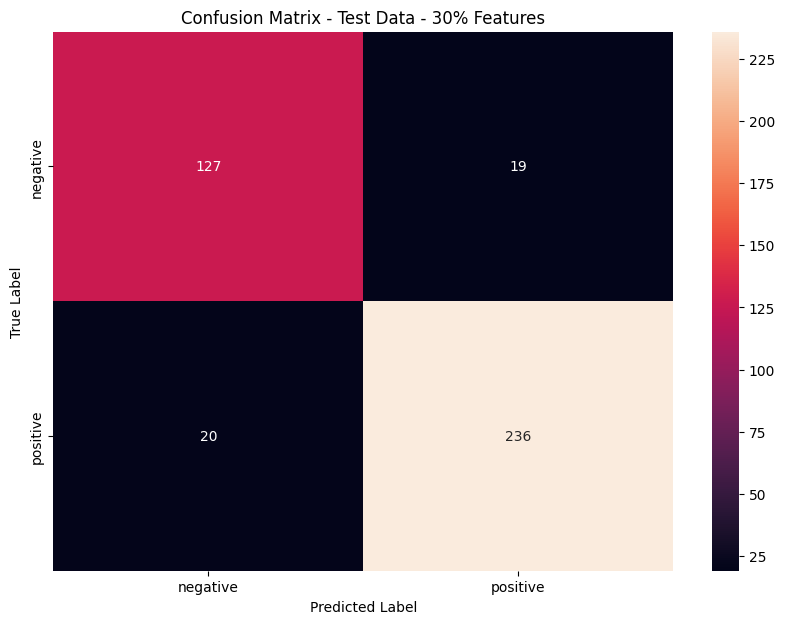

Classification Report - Test Data - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.87      0.87       146
     Positif       0.93      0.92      0.92       256

    accuracy                           0.90       402
   macro avg       0.89      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



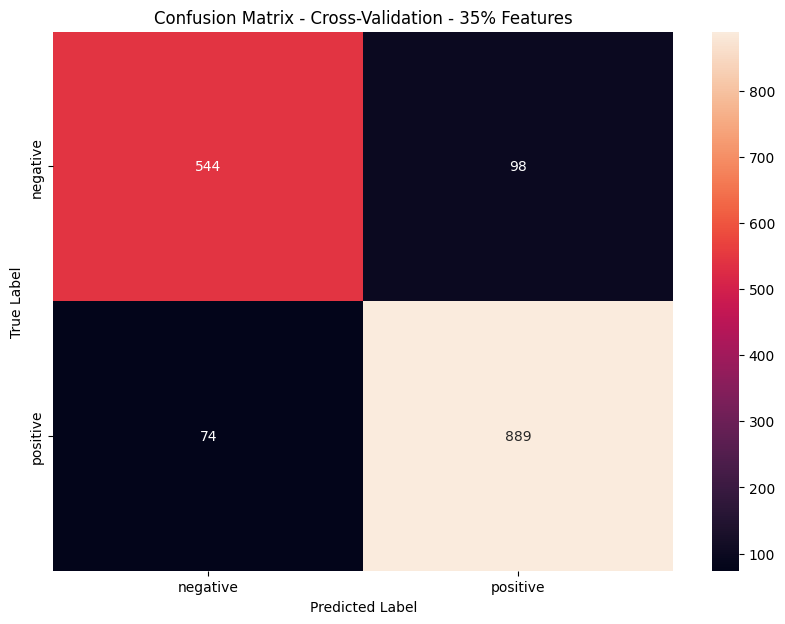

Classification Report - Cross-Validation - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.85      0.86       642
     Positif       0.90      0.92      0.91       963

    accuracy                           0.89      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (35% features): [0.89130435 0.90434783 0.86026201 0.91266376 0.88646288 0.89082969
 0.90393013]
Mean Accuracy: 0.8928286636469662
Standard Deviation: 0.01584205141864381
Test Accuracy: 0.9303482587064676
Test Precision: 0.9303482587064676
Test Recall: 0.9303482587064676
Test F1 Score: 0.9303482587064676


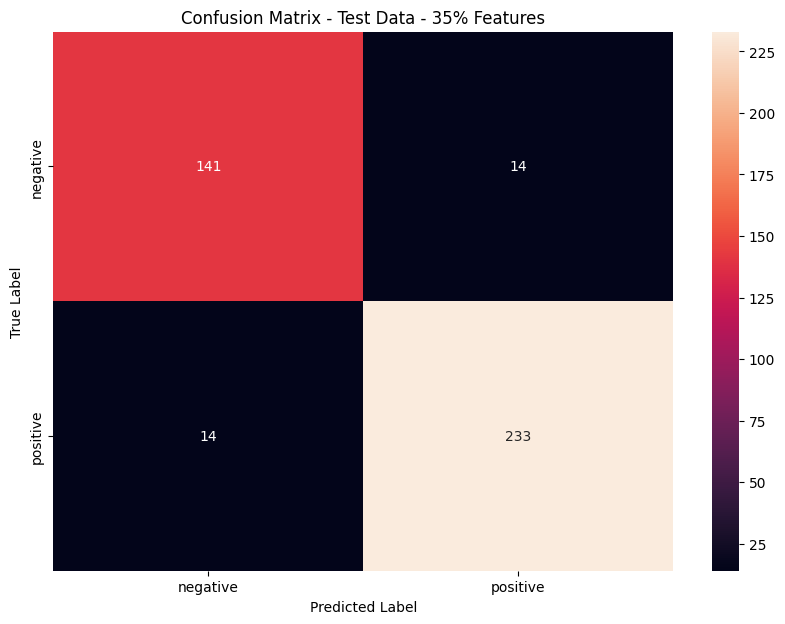

Classification Report - Test Data - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.91      0.91       155
     Positif       0.94      0.94      0.94       247

    accuracy                           0.93       402
   macro avg       0.93      0.93      0.93       402
weighted avg       0.93      0.93      0.93       402



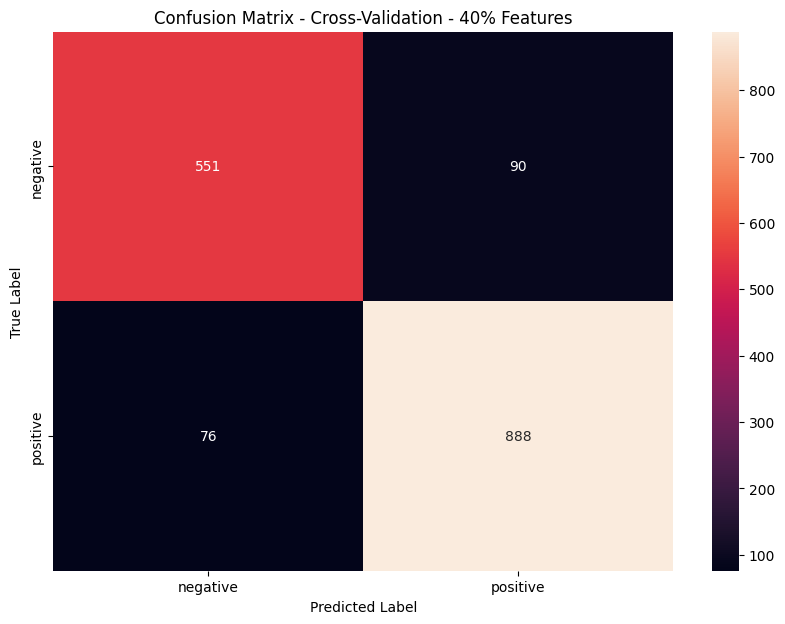

Classification Report - Cross-Validation - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.86      0.87       641
     Positif       0.91      0.92      0.91       964

    accuracy                           0.90      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (40% features): [0.89130435 0.9        0.90829694 0.87772926 0.91266376 0.90829694
 0.87772926]
Mean Accuracy: 0.8965743578616182
Standard Deviation: 0.0135408923790774
Test Accuracy: 0.9029850746268657
Test Precision: 0.9041407019665466
Test Recall: 0.9029850746268657
Test F1 Score: 0.9018098213935152


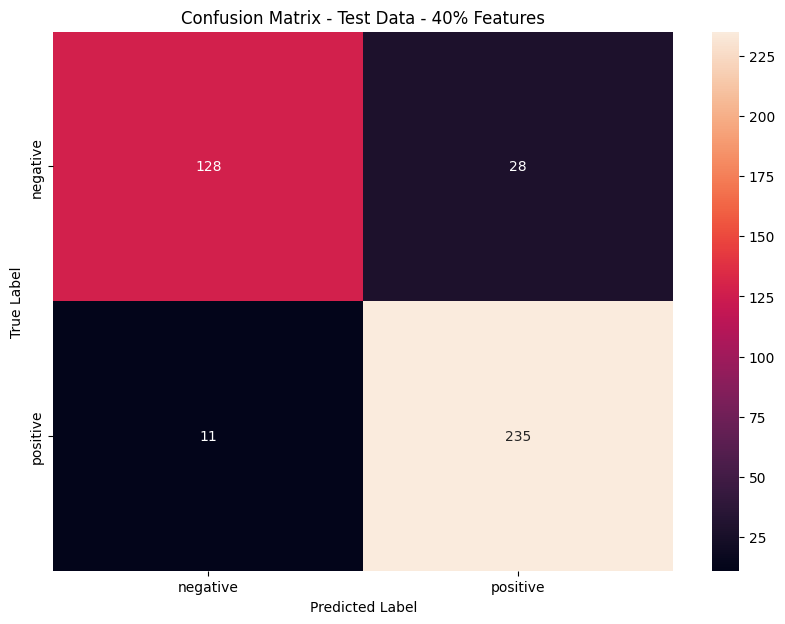

Classification Report - Test Data - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.82      0.87       156
     Positif       0.89      0.96      0.92       246

    accuracy                           0.90       402
   macro avg       0.91      0.89      0.90       402
weighted avg       0.90      0.90      0.90       402



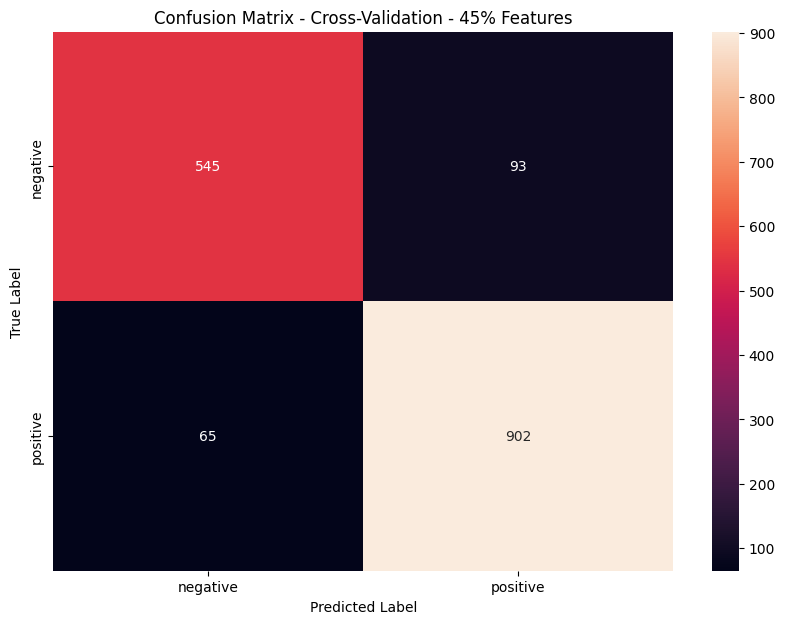

Classification Report - Cross-Validation - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       638
     Positif       0.91      0.93      0.92       967

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (45% features): [0.88695652 0.87391304 0.90829694 0.93449782 0.89956332 0.89956332
 0.90829694]
Mean Accuracy: 0.9015839865469635
Standard Deviation: 0.01757131508510237
Test Accuracy: 0.8955223880597015
Test Precision: 0.8955223880597015
Test Recall: 0.8955223880597015
Test F1 Score: 0.8955223880597015


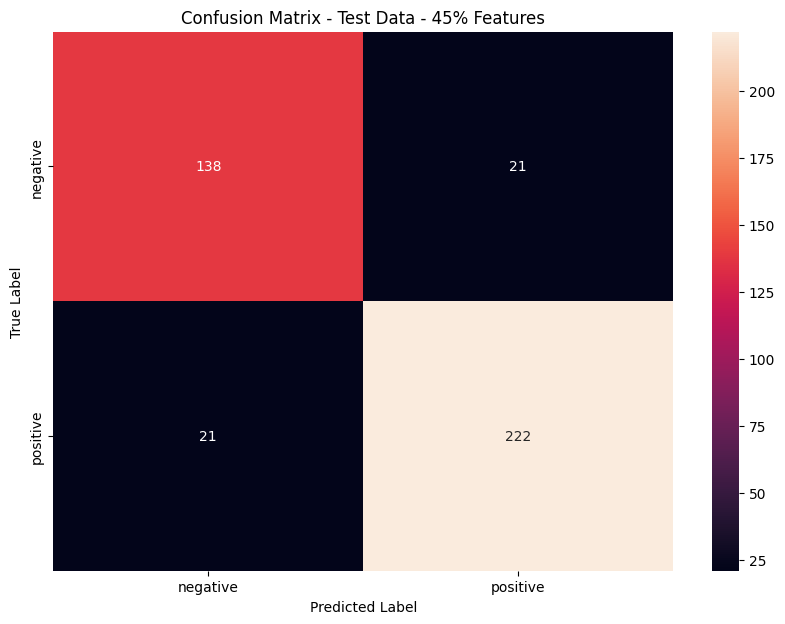

Classification Report - Test Data - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.87      0.87       159
     Positif       0.91      0.91      0.91       243

    accuracy                           0.90       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



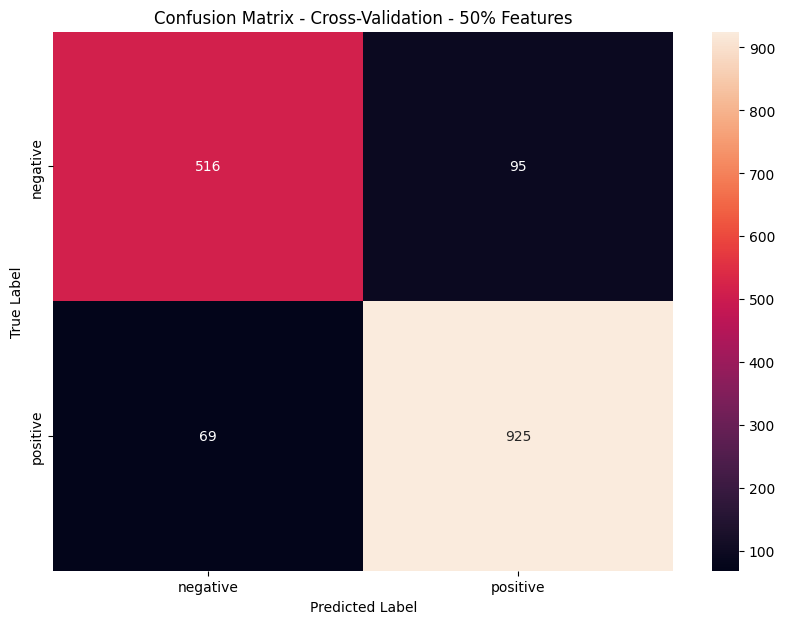

Classification Report - Cross-Validation - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.84      0.86       611
     Positif       0.91      0.93      0.92       994

    accuracy                           0.90      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (50% features): [0.89565217 0.91304348 0.86899563 0.94323144 0.88646288 0.89519651
 0.88209607]
Mean Accuracy: 0.8978111692750007
Standard Deviation: 0.02240090922371877
Test Accuracy: 0.9104477611940298
Test Precision: 0.913215515827456
Test Recall: 0.9104477611940298
Test F1 Score: 0.9099620541360991


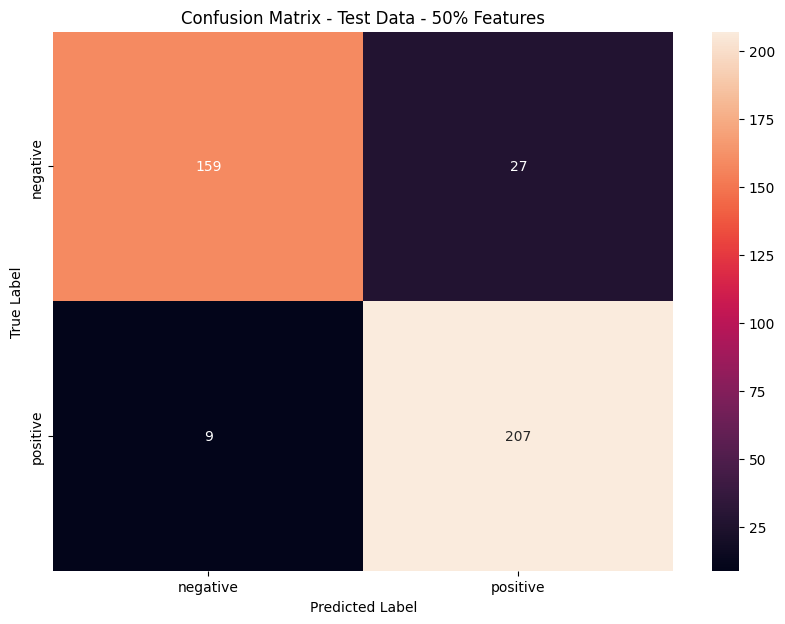

Classification Report - Test Data - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.95      0.85      0.90       186
     Positif       0.88      0.96      0.92       216

    accuracy                           0.91       402
   macro avg       0.92      0.91      0.91       402
weighted avg       0.91      0.91      0.91       402



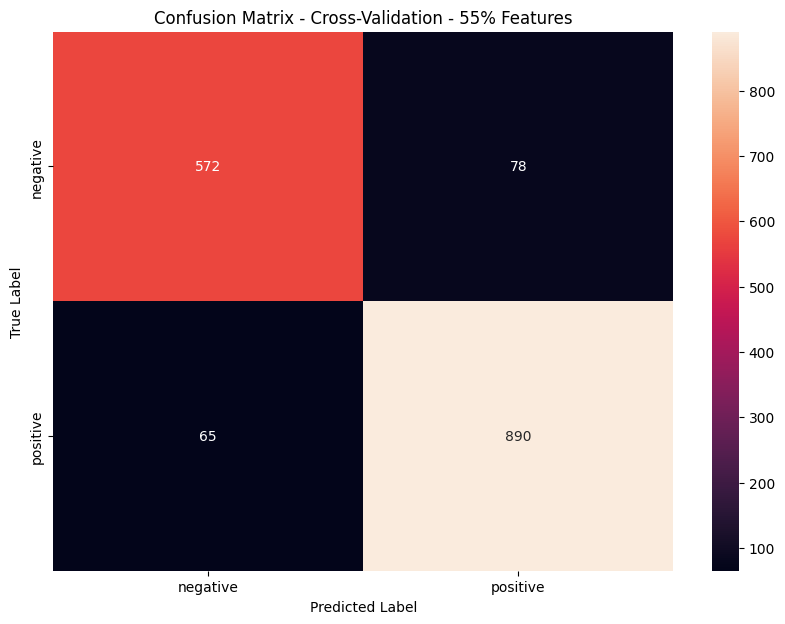

Classification Report - Cross-Validation - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.88      0.89       650
     Positif       0.92      0.93      0.93       955

    accuracy                           0.91      1605
   macro avg       0.91      0.91      0.91      1605
weighted avg       0.91      0.91      0.91      1605

Cross-Validation Scores (55% features): [0.89130435 0.9173913  0.94759825 0.89082969 0.89956332 0.93449782
 0.89519651]
Mean Accuracy: 0.9109116059562233
Standard Deviation: 0.021070228259823225
Test Accuracy: 0.8880597014925373
Test Precision: 0.8874245186282328
Test Recall: 0.8880597014925373
Test F1 Score: 0.8874523922351727


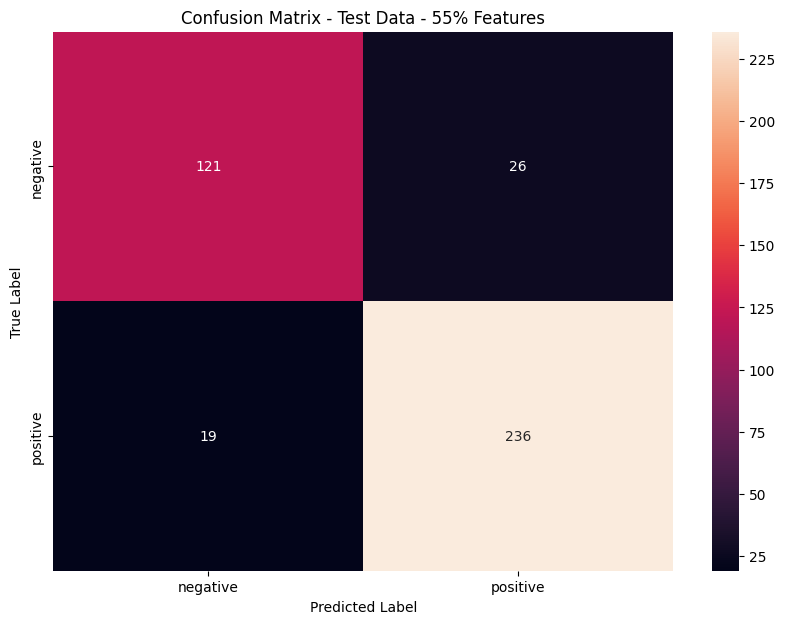

Classification Report - Test Data - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.82      0.84       147
     Positif       0.90      0.93      0.91       255

    accuracy                           0.89       402
   macro avg       0.88      0.87      0.88       402
weighted avg       0.89      0.89      0.89       402



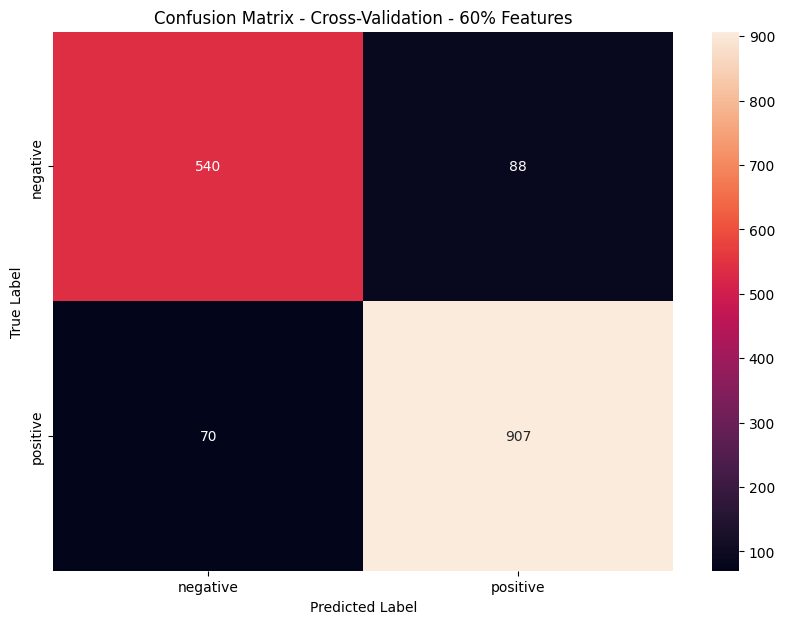

Classification Report - Cross-Validation - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.86      0.87       628
     Positif       0.91      0.93      0.92       977

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (60% features): [0.9        0.88695652 0.89082969 0.89956332 0.90393013 0.90393013
 0.92576419]
Mean Accuracy: 0.901567712712577
Standard Deviation: 0.011538128814816556
Test Accuracy: 0.8905472636815921
Test Precision: 0.8910586276533128
Test Recall: 0.8905472636815921
Test F1 Score: 0.8907135167936424


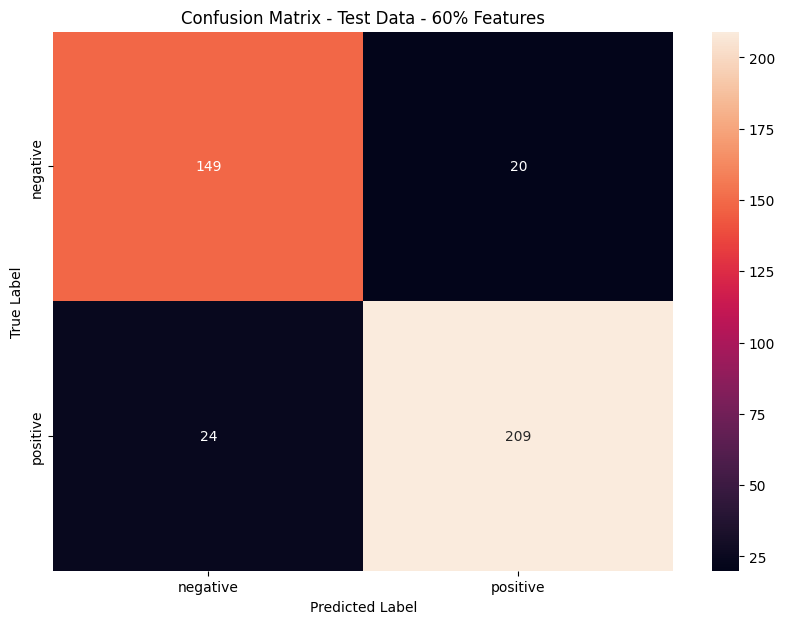

Classification Report - Test Data - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.88      0.87       169
     Positif       0.91      0.90      0.90       233

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402



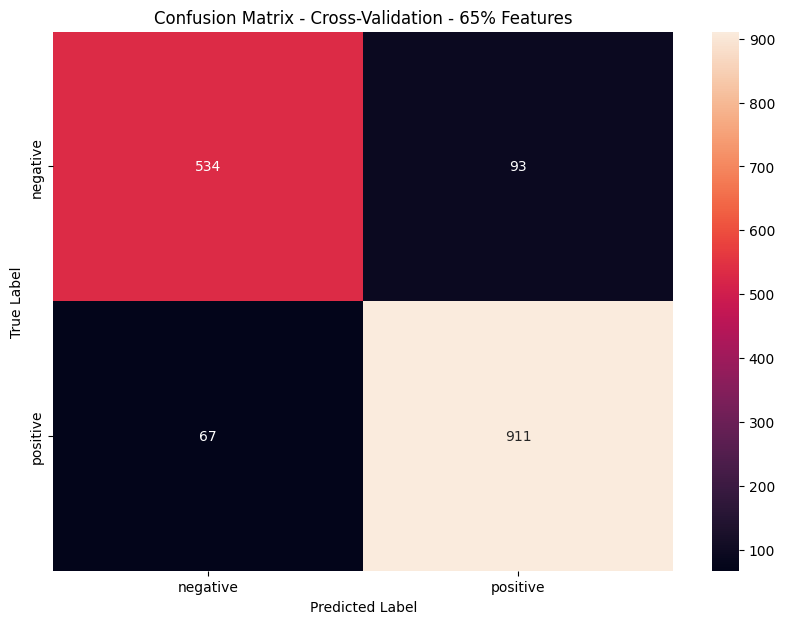

Classification Report - Cross-Validation - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       627
     Positif       0.91      0.93      0.92       978

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (65% features): [0.89565217 0.89130435 0.91266376 0.92139738 0.89956332 0.88646288
 0.89519651]
Mean Accuracy: 0.90032005207627
Standard Deviation: 0.011455112991203267
Test Accuracy: 0.8905472636815921
Test Precision: 0.8909498987734084
Test Recall: 0.8905472636815921
Test F1 Score: 0.8899247358207936


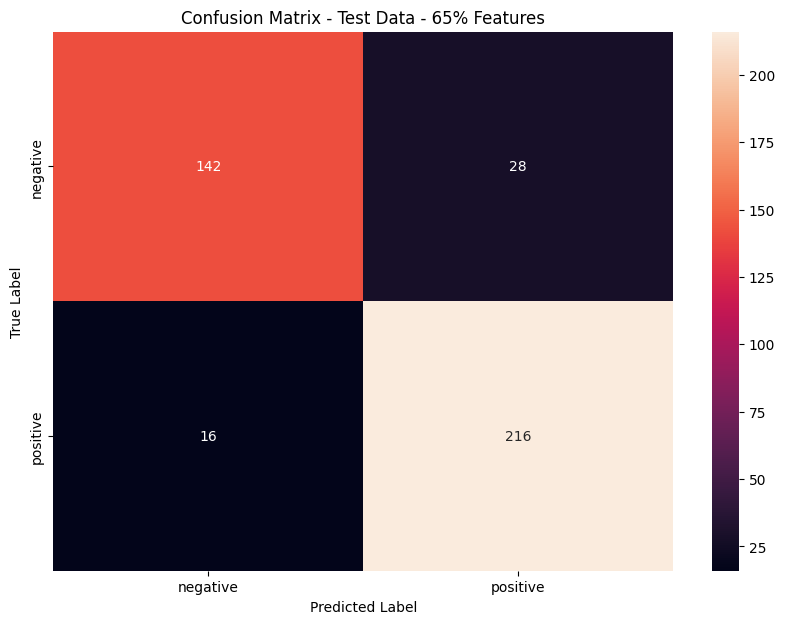

Classification Report - Test Data - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.84      0.87       170
     Positif       0.89      0.93      0.91       232

    accuracy                           0.89       402
   macro avg       0.89      0.88      0.89       402
weighted avg       0.89      0.89      0.89       402



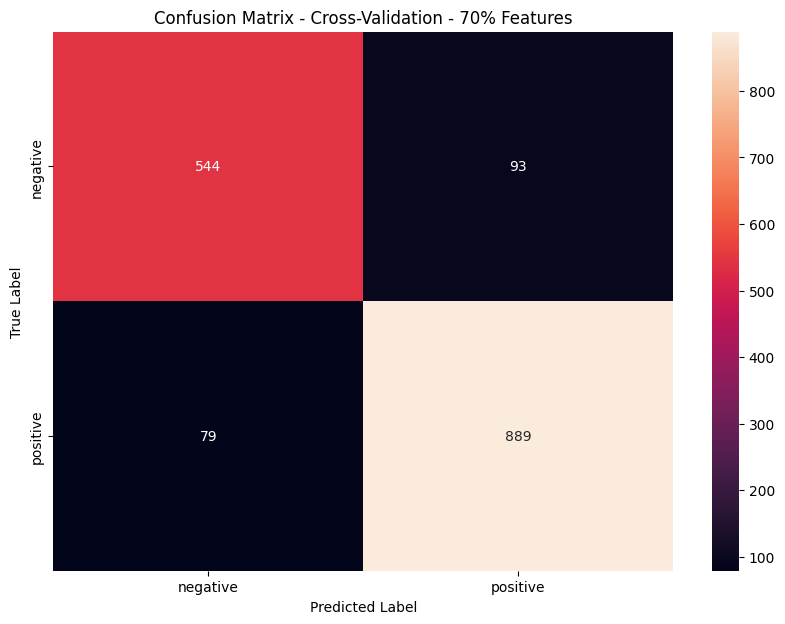

Classification Report - Cross-Validation - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.85      0.86       637
     Positif       0.91      0.92      0.91       968

    accuracy                           0.89      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (70% features): [0.84782609 0.9173913  0.87336245 0.930131   0.89956332 0.87336245
 0.90829694]
Mean Accuracy: 0.8928476497870841
Standard Deviation: 0.026892664651463755
Test Accuracy: 0.9253731343283582
Test Precision: 0.9253731343283582
Test Recall: 0.9253731343283582
Test F1 Score: 0.9253731343283582


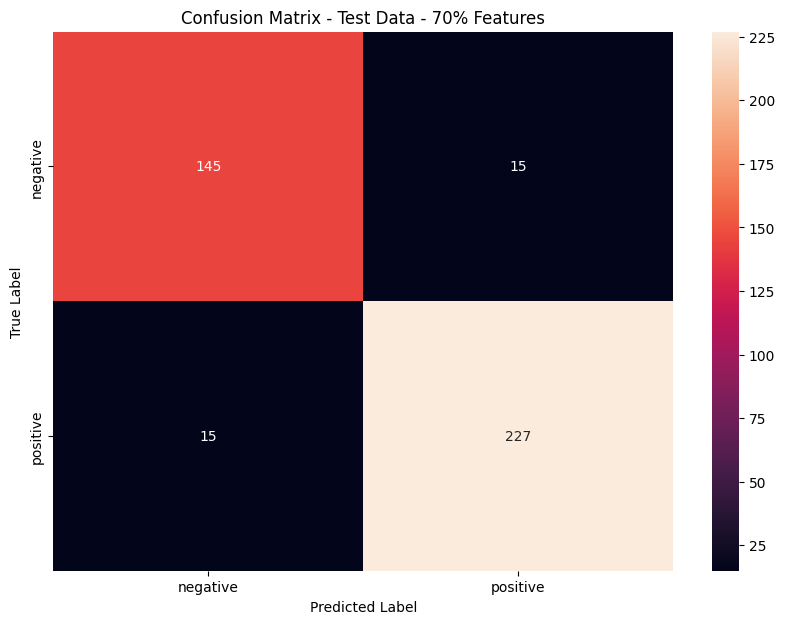

Classification Report - Test Data - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.91      0.91       160
     Positif       0.94      0.94      0.94       242

    accuracy                           0.93       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.93      0.93      0.93       402



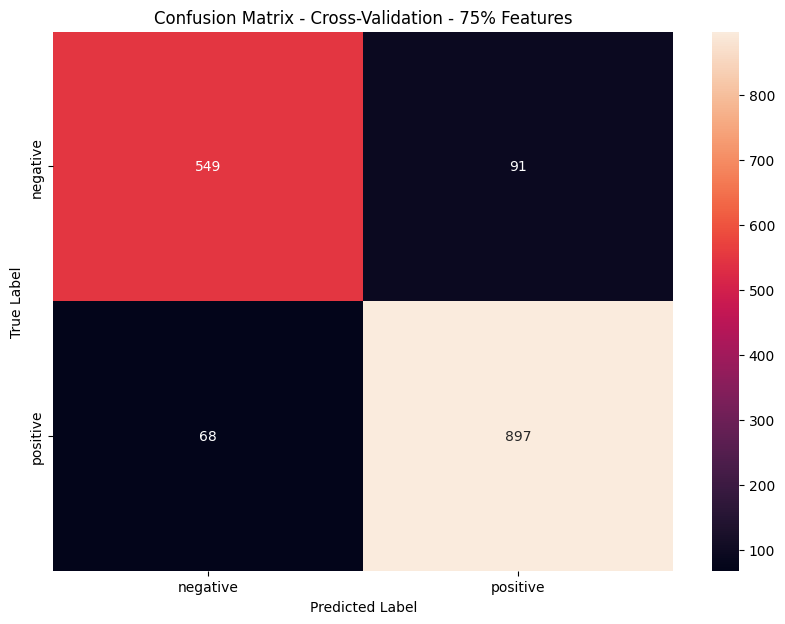

Classification Report - Cross-Validation - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.86      0.87       640
     Positif       0.91      0.93      0.92       965

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (75% features): [0.90434783 0.90434783 0.90393013 0.90829694 0.89519651 0.87772926
 0.91266376]
Mean Accuracy: 0.9009303208657681
Standard Deviation: 0.010660099962571933
Test Accuracy: 0.900497512437811
Test Precision: 0.900497512437811
Test Recall: 0.900497512437811
Test F1 Score: 0.900497512437811


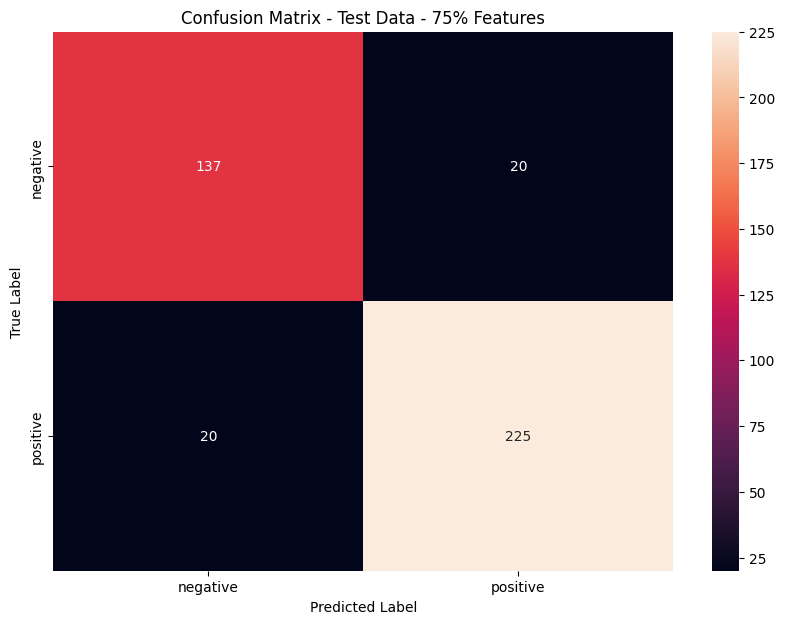

Classification Report - Test Data - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.87      0.87       157
     Positif       0.92      0.92      0.92       245

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



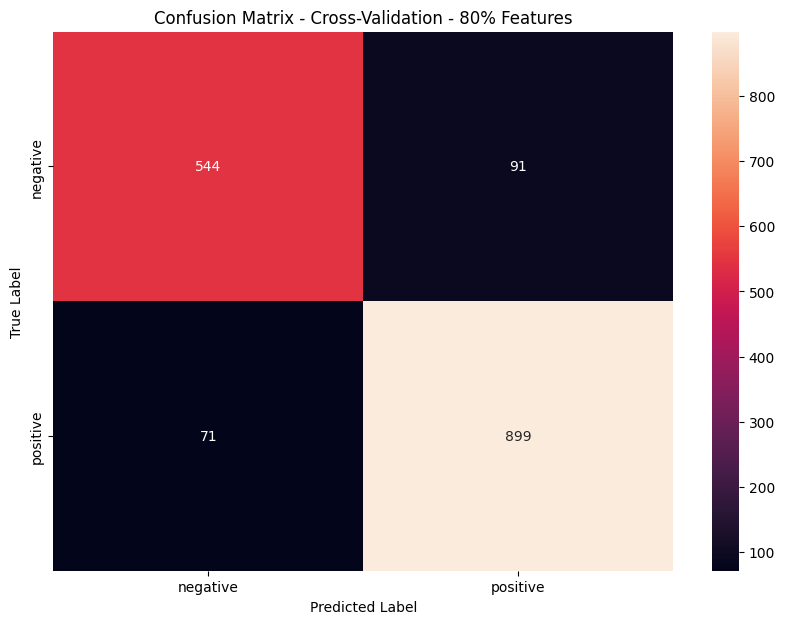

Classification Report - Cross-Validation - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.86      0.87       635
     Positif       0.91      0.93      0.92       970

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (80% features): [0.92173913 0.89565217 0.89956332 0.91266376 0.86899563 0.90393013
 0.89082969]
Mean Accuracy: 0.8990534052998455
Standard Deviation: 0.015614067298466627
Test Accuracy: 0.9129353233830846
Test Precision: 0.913268149109601
Test Recall: 0.9129353233830846
Test F1 Score: 0.9123806991344172


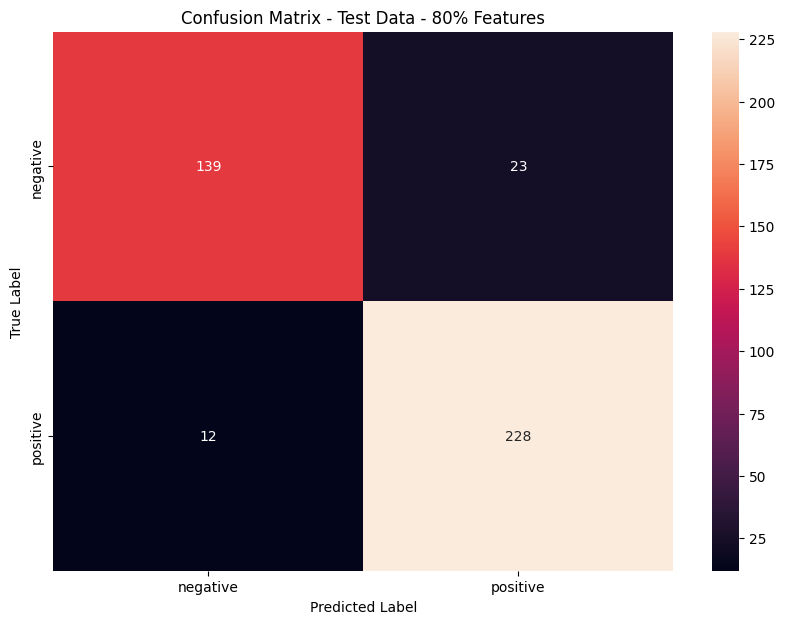

Classification Report - Test Data - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.86      0.89       162
     Positif       0.91      0.95      0.93       240

    accuracy                           0.91       402
   macro avg       0.91      0.90      0.91       402
weighted avg       0.91      0.91      0.91       402



Classification Report - Cross-Validation - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.86      0.87       644
     Positif       0.91      0.93      0.92       961

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (85% features): [0.90434783 0.9173913  0.87336245 0.88209607 0.88646288 0.91266376
 0.90829694]
Mean Accuracy: 0.8978030323578075
Standard Deviation: 0.015721450086298685
Test Accuracy: 0.9129353233830846
Test Precision: 0.9142134112495376
Test Recall: 0.9129353233830846
Test F1 Score: 0.913288266086782


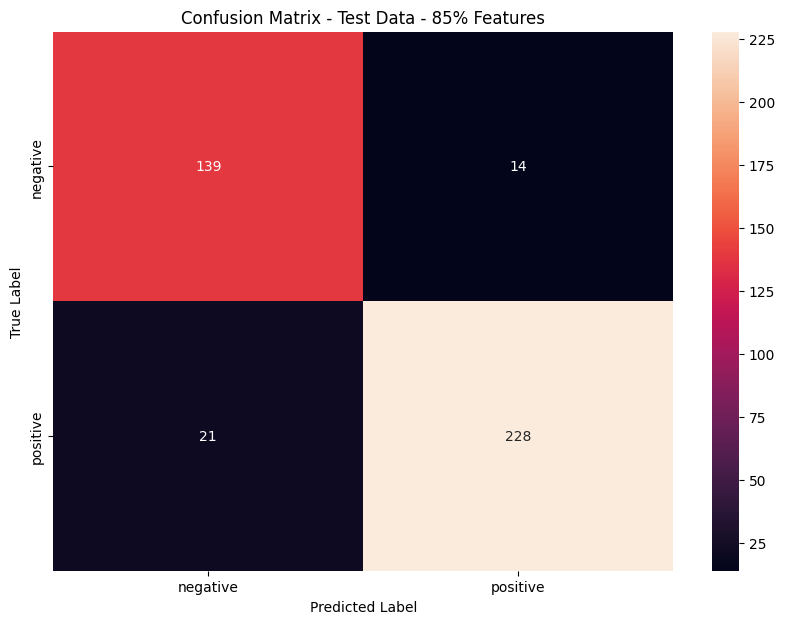

Classification Report - Test Data - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.91      0.89       153
     Positif       0.94      0.92      0.93       249

    accuracy                           0.91       402
   macro avg       0.91      0.91      0.91       402
weighted avg       0.91      0.91      0.91       402



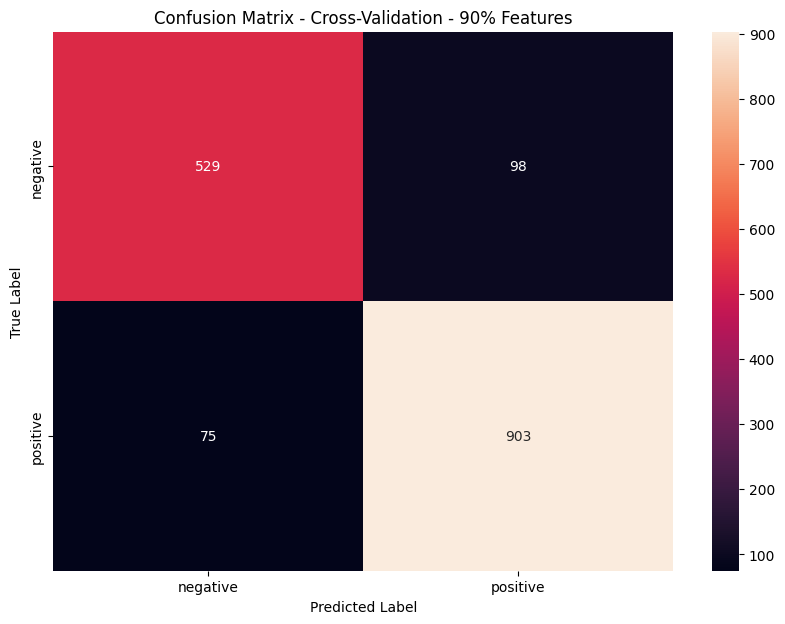

Classification Report - Cross-Validation - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.84      0.86       627
     Positif       0.90      0.92      0.91       978

    accuracy                           0.89      1605
   macro avg       0.89      0.88      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (90% features): [0.89565217 0.9        0.85152838 0.89956332 0.89082969 0.930131
 0.87772926]
Mean Accuracy: 0.8922048333288128
Standard Deviation: 0.02213980689117445
Test Accuracy: 0.9104477611940298
Test Precision: 0.9106296123024916
Test Recall: 0.9104477611940298
Test F1 Score: 0.9105157738307778


Classification Report - Test Data - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.90      0.89       170
     Positif       0.93      0.92      0.92       232

    accuracy                           0.91       402
   macro avg       0.91      0.91      0.91       402
weighted avg       0.91      0.91      0.91       402



In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')

# Daftar persentase fitur yang akan dievaluasi
persen_fitur_list = range(5, 95, 5)

# Menyimpan hasil performa untuk setiap persentase fitur
all_performances = []

# Melakukan seleksi fitur dan evaluasi model
for persen_fitur in persen_fitur_list:
    # Menentukan jumlah fitur yang akan dipilih
    num_feature_to_select = int(persen_fitur * tf_idf.shape[1] / 100)

    # Seleksi fitur menggunakan SelectKBest
    selector = SelectKBest(f_classif, k=num_feature_to_select)
    X_selected = selector.fit_transform(tf_idf, y)

    # Membagi data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=True)

    # Membuat model SVM
    modelsvm = SVC(kernel='linear', gamma=0.01, C=1)

    # Menggunakan k-fold cross-validation dengan k=7
    k = 7
    scores = cross_val_score(modelsvm, X_train, y_train, cv=k)
    y_train_pred = cross_val_predict(modelsvm, X_train, y_train, cv=k)

    # Confusion Matrix untuk cross-validation
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Cross-Validation - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report
    print(f"Classification Report - Cross-Validation - {persen_fitur}% Features:")
    print(classification_report(y_train, y_train_pred))

    # Menampilkan performa cross-validation
    print(f"Cross-Validation Scores ({persen_fitur}% features): {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

    # Melatih model dengan seluruh data latih
    modelsvm.fit(X_train, y_train)

    # Memprediksi data uji
    y_pred = modelsvm.predict(X_test)

    # Menghitung performa pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test F1 Score: {f1}")

    # Confusion Matrix untuk data uji
    conf_matrix_test = confusion_matrix(y_test, y_pred)
    df_cm_test = pd.DataFrame(conf_matrix_test, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix untuk data uji
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm_test, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Test Data - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report untuk data uji
    print(f"Classification Report - Test Data - {persen_fitur}% Features:")
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil performa
    performance = {
        'persen_fitur': persen_fitur,
        'cross_val_accuracy_mean': scores.mean(),
        'cross_val_accuracy_std': scores.std(),
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1
    }
    all_performances.append(performance)

# Visualisasi performa berdasarkan persentase fitur
df_performance = pd.DataFrame(all_performances)

plt.figure(figsize=(14, 8))
plt.plot(df_performance['persen_fitur'], df_performance['cross_val_accuracy_mean'], marker='o', label='Cross-Val Accuracy Mean')
plt.plot(df_performance['persen_fitur'], df_performance['test_accuracy'], marker='o', label='Test Accuracy')


plt.title('Performance Metrics for Different Percentages of Features')
plt.title('Parameter Gamma = 0,01, C=0,1 K=7')
plt.xlabel('Percentage of Features')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## PARAMETER GAMMA = 0,01 C = 0,1 K=9


Classification Report - Cross-Validation - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.71      0.78       645
     Positif       0.83      0.91      0.87       960

    accuracy                           0.83      1605
   macro avg       0.84      0.81      0.82      1605
weighted avg       0.83      0.83      0.83      1605

Cross-Validation Scores (5% features): [0.83240223 0.79329609 0.8547486  0.85955056 0.82022472 0.78651685
 0.83146067 0.87078652 0.85393258]
Mean Accuracy: 0.8336576486096291
Standard Deviation: 0.027774995830358258
Test Accuracy: 0.8482587064676617
Test Precision: 0.8472246095071052
Test Recall: 0.8482587064676617
Test F1 Score: 0.846791944099762


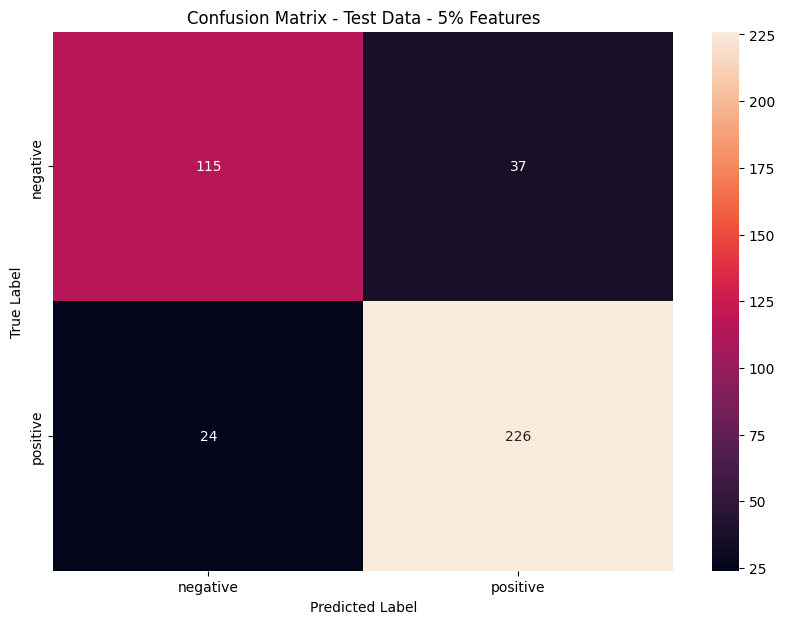

Classification Report - Test Data - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.76      0.79       152
     Positif       0.86      0.90      0.88       250

    accuracy                           0.85       402
   macro avg       0.84      0.83      0.84       402
weighted avg       0.85      0.85      0.85       402



Classification Report - Cross-Validation - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.74      0.81       633
     Positif       0.85      0.95      0.89       972

    accuracy                           0.87      1605
   macro avg       0.87      0.84      0.85      1605
weighted avg       0.87      0.87      0.86      1605

Cross-Validation Scores (10% features): [0.88268156 0.84357542 0.88826816 0.87640449 0.83146067 0.86516854
 0.87078652 0.87078652 0.85955056]
Mean Accuracy: 0.8654091603372879
Standard Deviation: 0.017202041177740924
Test Accuracy: 0.8482587064676617
Test Precision: 0.849222043251894
Test Recall: 0.8482587064676617
Test F1 Score: 0.8462746596421022


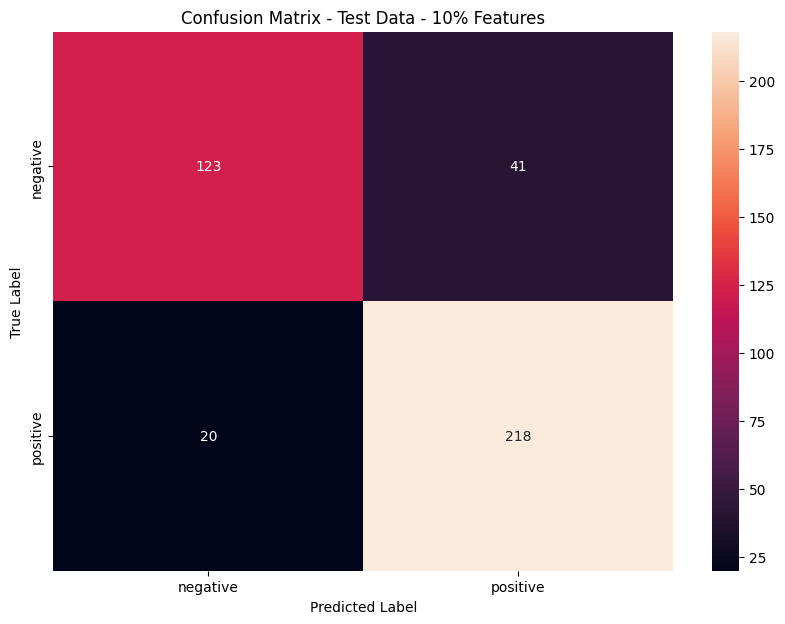

Classification Report - Test Data - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.75      0.80       164
     Positif       0.84      0.92      0.88       238

    accuracy                           0.85       402
   macro avg       0.85      0.83      0.84       402
weighted avg       0.85      0.85      0.85       402



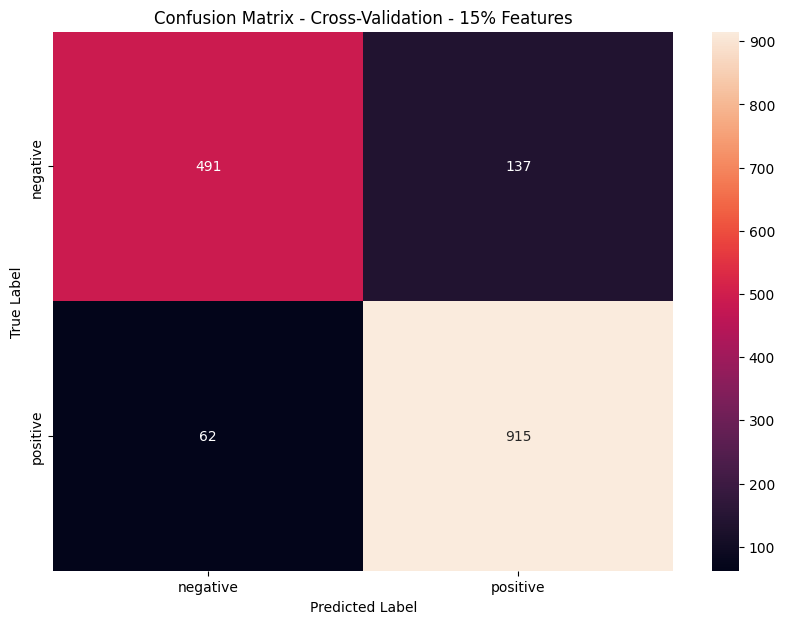

Classification Report - Cross-Validation - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.78      0.83       628
     Positif       0.87      0.94      0.90       977

    accuracy                           0.88      1605
   macro avg       0.88      0.86      0.87      1605
weighted avg       0.88      0.88      0.87      1605

Cross-Validation Scores (15% features): [0.88268156 0.8603352  0.89944134 0.85955056 0.86516854 0.91011236
 0.87078652 0.87640449 0.85955056]
Mean Accuracy: 0.8760034593629471
Standard Deviation: 0.017285226256968992
Test Accuracy: 0.8706467661691543
Test Precision: 0.8713989701856886
Test Recall: 0.8706467661691543
Test F1 Score: 0.8695799628696036


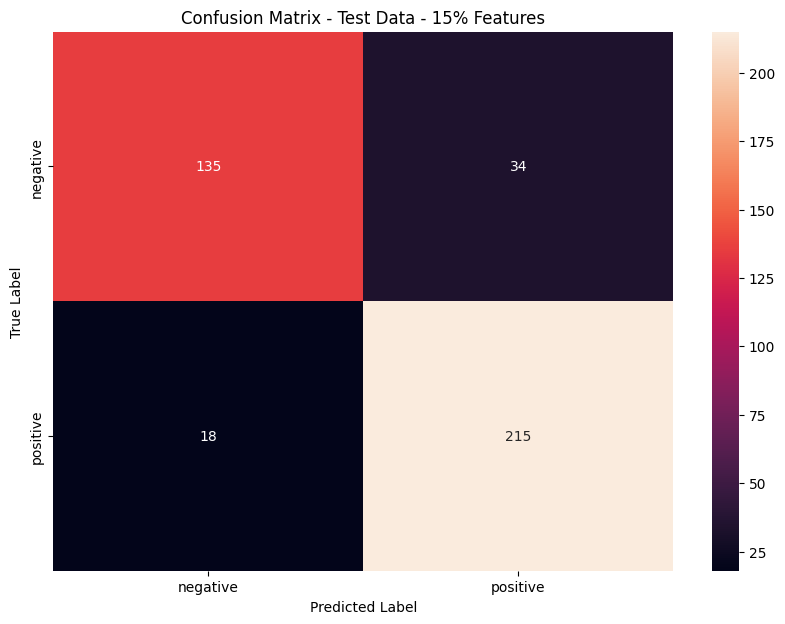

Classification Report - Test Data - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.80      0.84       169
     Positif       0.86      0.92      0.89       233

    accuracy                           0.87       402
   macro avg       0.87      0.86      0.87       402
weighted avg       0.87      0.87      0.87       402



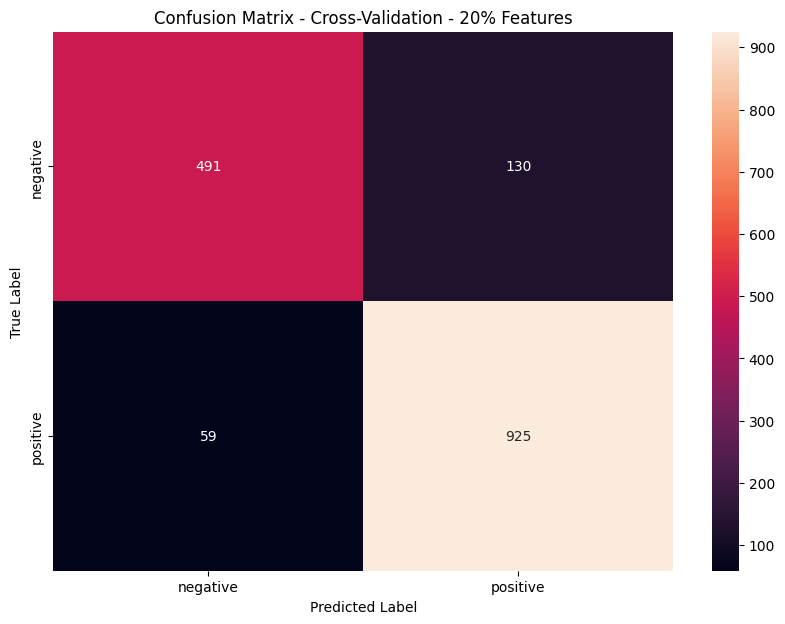

Classification Report - Cross-Validation - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.79      0.84       621
     Positif       0.88      0.94      0.91       984

    accuracy                           0.88      1605
   macro avg       0.88      0.87      0.87      1605
weighted avg       0.88      0.88      0.88      1605

Cross-Validation Scores (20% features): [0.89385475 0.90502793 0.91620112 0.8258427  0.85955056 0.91011236
 0.87078652 0.88202247 0.87640449]
Mean Accuracy: 0.8822003222229198
Standard Deviation: 0.026760570445552443
Test Accuracy: 0.8930348258706468
Test Precision: 0.8954026177445025
Test Recall: 0.8930348258706468
Test F1 Score: 0.8921407385139679


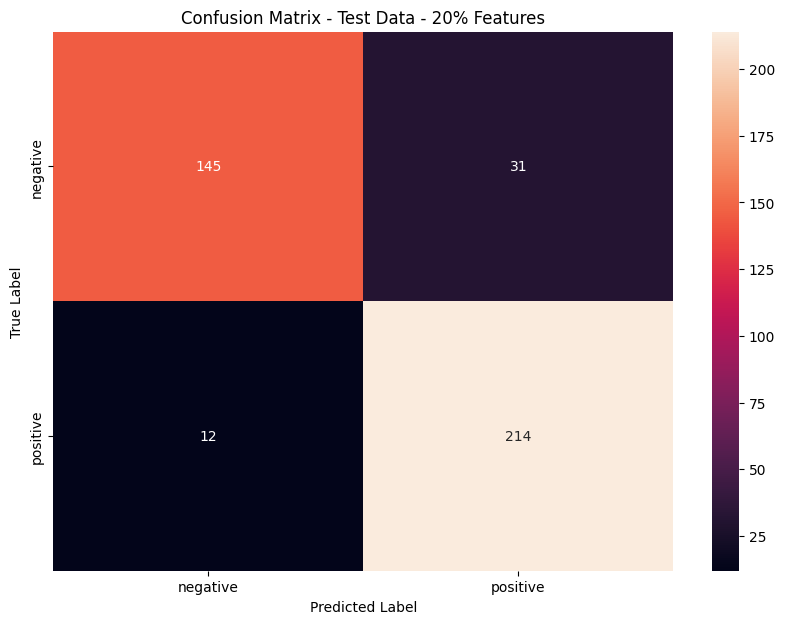

Classification Report - Test Data - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.82      0.87       176
     Positif       0.87      0.95      0.91       226

    accuracy                           0.89       402
   macro avg       0.90      0.89      0.89       402
weighted avg       0.90      0.89      0.89       402



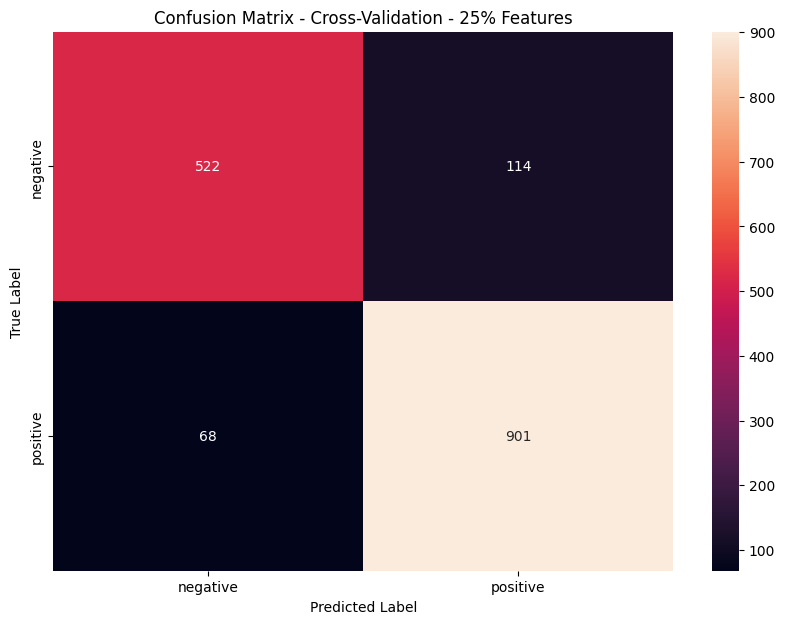

Classification Report - Cross-Validation - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.82      0.85       636
     Positif       0.89      0.93      0.91       969

    accuracy                           0.89      1605
   macro avg       0.89      0.88      0.88      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (25% features): [0.88268156 0.9273743  0.87150838 0.89325843 0.87640449 0.91573034
 0.87640449 0.87078652 0.86516854]
Mean Accuracy: 0.8865907838665357
Standard Deviation: 0.020319218222381332
Test Accuracy: 0.9154228855721394
Test Precision: 0.9156263483511179
Test Recall: 0.9154228855721394
Test F1 Score: 0.9149270066179421


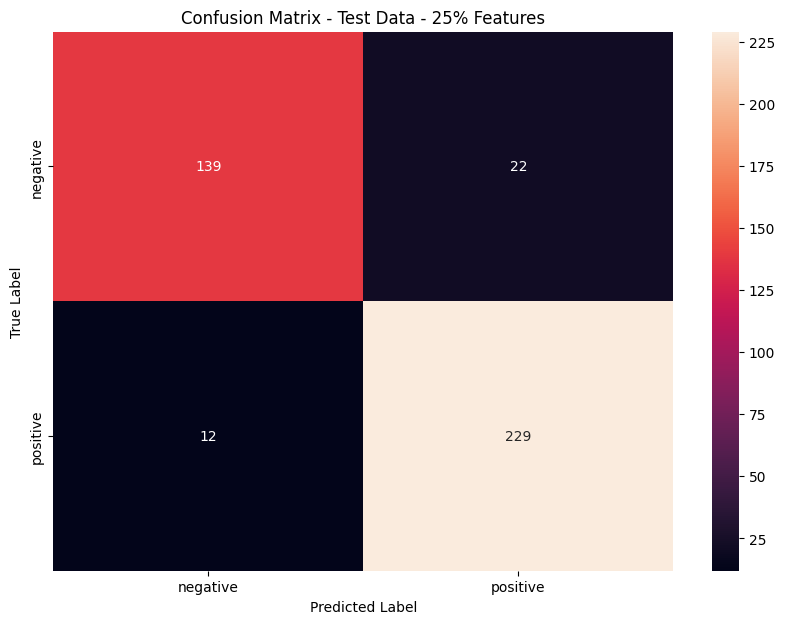

Classification Report - Test Data - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.86      0.89       161
     Positif       0.91      0.95      0.93       241

    accuracy                           0.92       402
   macro avg       0.92      0.91      0.91       402
weighted avg       0.92      0.92      0.91       402



Classification Report - Cross-Validation - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       624
     Positif       0.91      0.93      0.92       981

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (30% features): [0.91620112 0.86592179 0.9273743  0.8988764  0.88764045 0.91011236
 0.90449438 0.91011236 0.87640449]
Mean Accuracy: 0.8996819617935681
Standard Deviation: 0.018582341546821205
Test Accuracy: 0.8955223880597015
Test Precision: 0.8960855371091759
Test Recall: 0.8955223880597015
Test F1 Score: 0.8949793014796067


Classification Report - Test Data - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.84      0.87       173
     Positif       0.89      0.93      0.91       229

    accuracy                           0.90       402
   macro avg       0.90      0.89      0.89       402
weighted avg       0.90      0.90      0.89       402



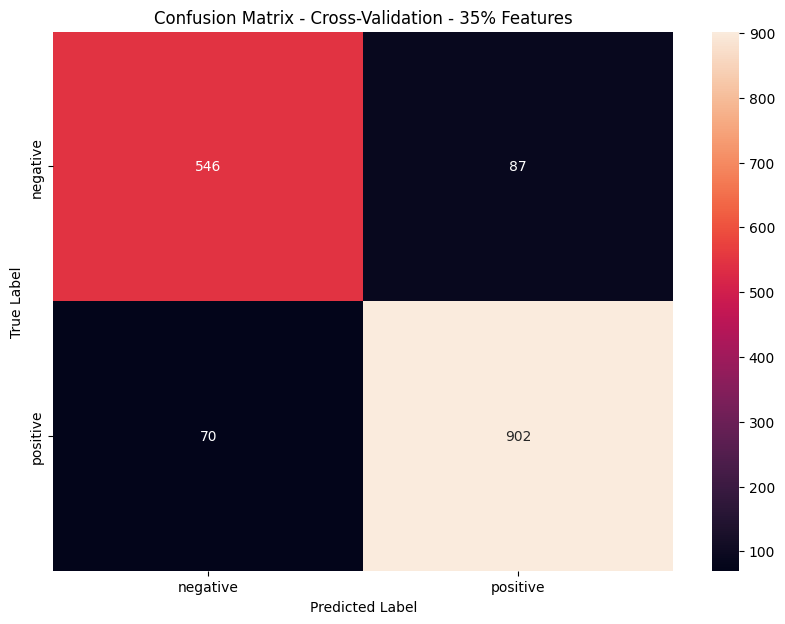

Classification Report - Cross-Validation - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.86      0.87       633
     Positif       0.91      0.93      0.92       972

    accuracy                           0.90      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (35% features): [0.89944134 0.90502793 0.87709497 0.90449438 0.87078652 0.93820225
 0.93258427 0.86516854 0.92696629]
Mean Accuracy: 0.9021962770001186
Standard Deviation: 0.025477669464398844
Test Accuracy: 0.8980099502487562
Test Precision: 0.898883965719325
Test Recall: 0.8980099502487562
Test F1 Score: 0.8971239920333524


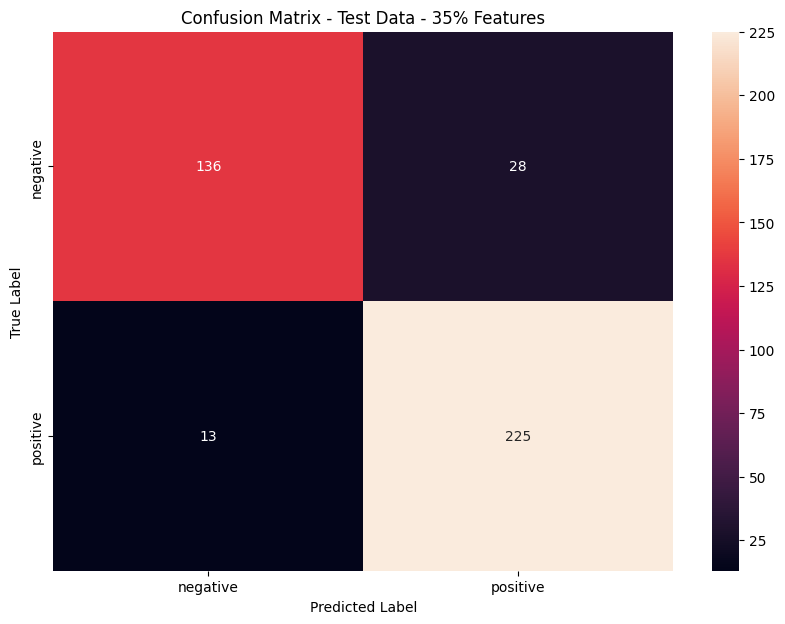

Classification Report - Test Data - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.83      0.87       164
     Positif       0.89      0.95      0.92       238

    accuracy                           0.90       402
   macro avg       0.90      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



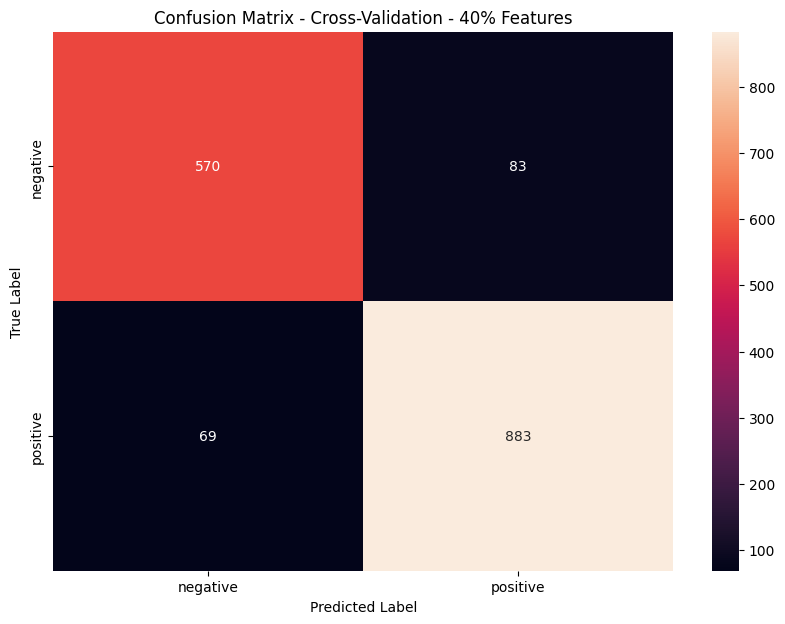

Classification Report - Cross-Validation - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.87      0.88       653
     Positif       0.91      0.93      0.92       952

    accuracy                           0.91      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.91      0.91      0.91      1605

Cross-Validation Scores (40% features): [0.90502793 0.94413408 0.91061453 0.8988764  0.89325843 0.89325843
 0.94382022 0.87640449 0.88202247]
Mean Accuracy: 0.9052685539723391
Standard Deviation: 0.02292077597492538
Test Accuracy: 0.8980099502487562
Test Precision: 0.8975686455777685
Test Recall: 0.8980099502487562
Test F1 Score: 0.8970492893426809


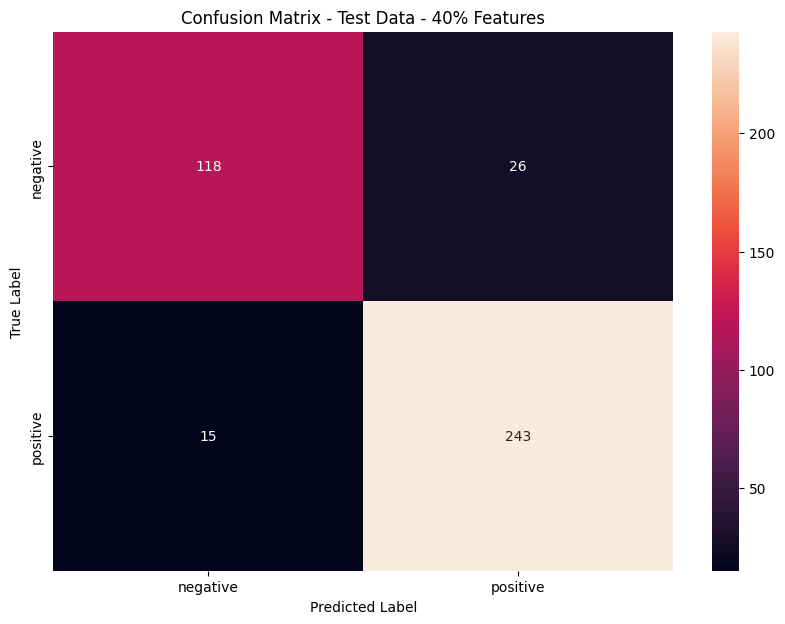

Classification Report - Test Data - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.82      0.85       144
     Positif       0.90      0.94      0.92       258

    accuracy                           0.90       402
   macro avg       0.90      0.88      0.89       402
weighted avg       0.90      0.90      0.90       402



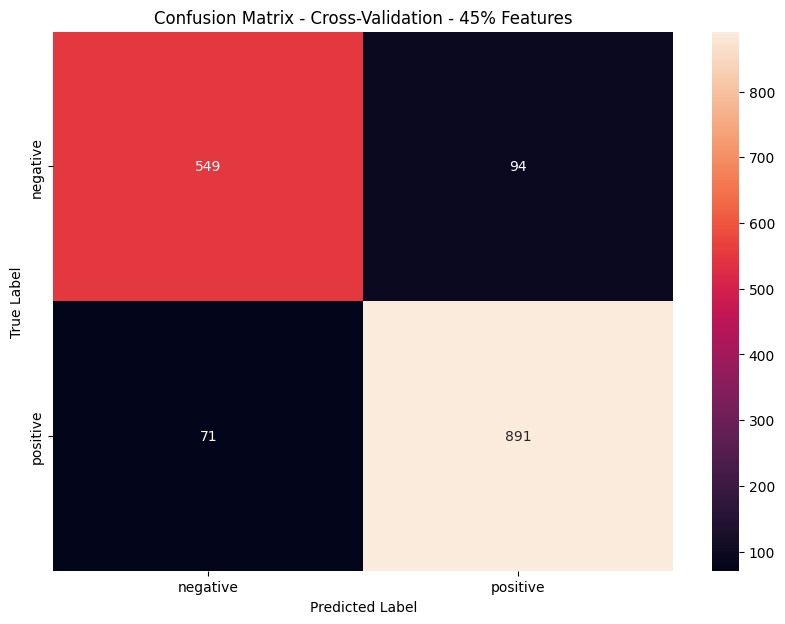

Classification Report - Cross-Validation - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       643
     Positif       0.90      0.93      0.92       962

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (45% features): [0.90502793 0.88268156 0.90502793 0.92134831 0.88202247 0.91573034
 0.90449438 0.86516854 0.89325843]
Mean Accuracy: 0.8971955446753012
Standard Deviation: 0.01694752750398066
Test Accuracy: 0.9402985074626866
Test Precision: 0.9402985074626866
Test Recall: 0.9402985074626866
Test F1 Score: 0.9402985074626866


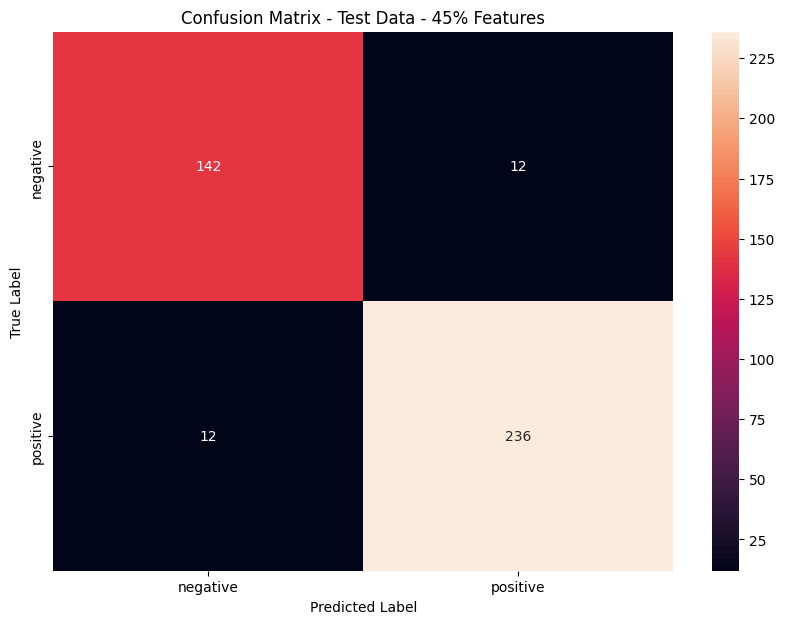

Classification Report - Test Data - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.92      0.92       154
     Positif       0.95      0.95      0.95       248

    accuracy                           0.94       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.94      0.94      0.94       402



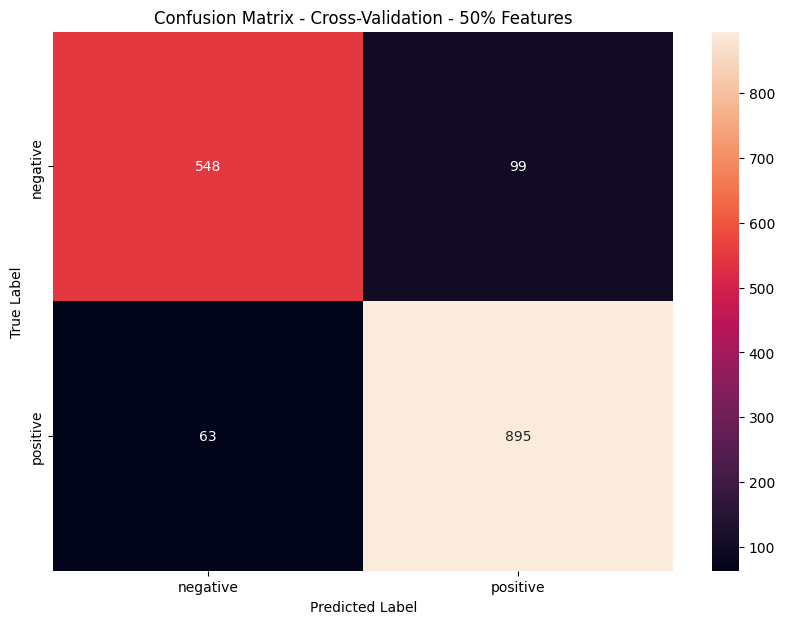

Classification Report - Cross-Validation - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.85      0.87       647
     Positif       0.90      0.93      0.92       958

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (50% features): [0.86592179 0.91061453 0.90502793 0.8988764  0.88202247 0.91573034
 0.90449438 0.8988764  0.91011236]
Mean Accuracy: 0.899075178373402
Standard Deviation: 0.01485931952734688
Test Accuracy: 0.9054726368159204
Test Precision: 0.9051309002118335
Test Recall: 0.9054726368159204
Test F1 Score: 0.9049162364547126


Classification Report - Test Data - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       150
     Positif       0.91      0.94      0.93       252

    accuracy                           0.91       402
   macro avg       0.90      0.89      0.90       402
weighted avg       0.91      0.91      0.90       402



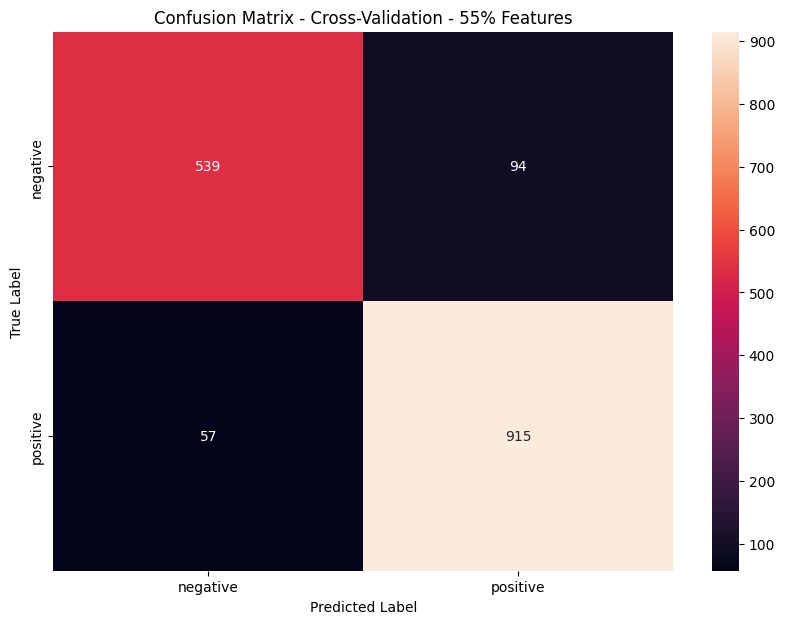

Classification Report - Cross-Validation - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.85      0.88       633
     Positif       0.91      0.94      0.92       972

    accuracy                           0.91      1605
   macro avg       0.91      0.90      0.90      1605
weighted avg       0.91      0.91      0.91      1605

Cross-Validation Scores (55% features): [0.87709497 0.91061453 0.89385475 0.93820225 0.8988764  0.92134831
 0.91011236 0.89325843 0.91011236]
Mean Accuracy: 0.9059415953521786
Standard Deviation: 0.01674562197344368
Test Accuracy: 0.900497512437811
Test Precision: 0.9003979477223015
Test Recall: 0.900497512437811
Test F1 Score: 0.9000760659512355


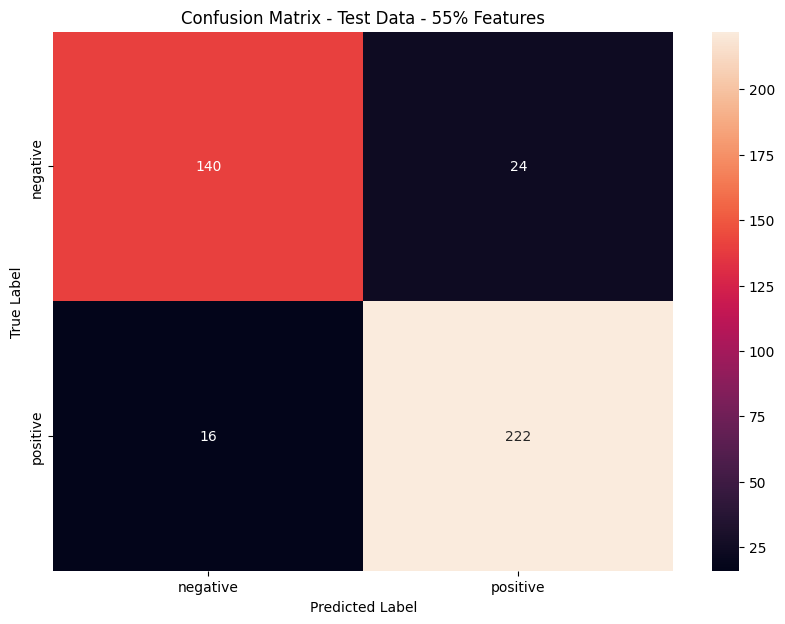

Classification Report - Test Data - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.85      0.88       164
     Positif       0.90      0.93      0.92       238

    accuracy                           0.90       402
   macro avg       0.90      0.89      0.90       402
weighted avg       0.90      0.90      0.90       402



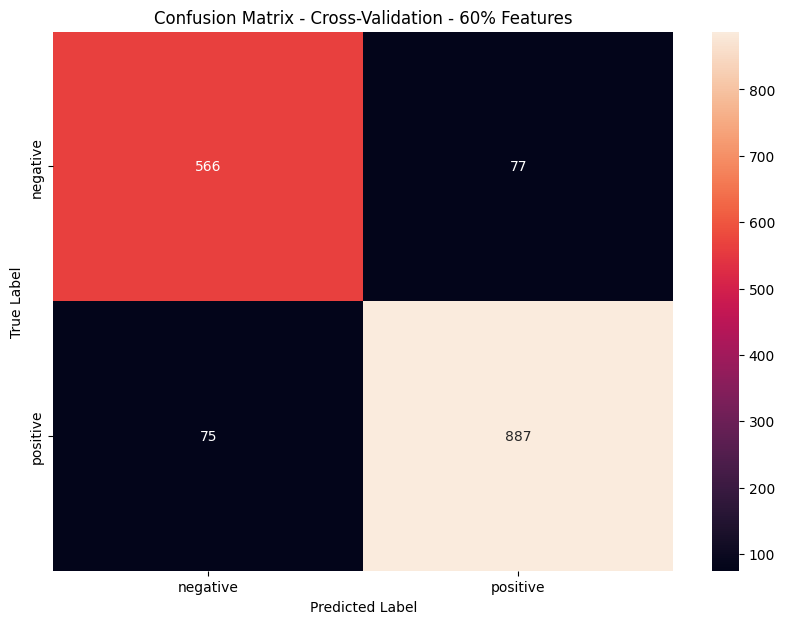

Classification Report - Cross-Validation - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.88      0.88       643
     Positif       0.92      0.92      0.92       962

    accuracy                           0.91      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.91      0.91      0.91      1605

Cross-Validation Scores (60% features): [0.90502793 0.91061453 0.91620112 0.90449438 0.90449438 0.89325843
 0.90449438 0.91573034 0.89325843]
Mean Accuracy: 0.9052859902775163
Standard Deviation: 0.007802341137810779
Test Accuracy: 0.8805970149253731
Test Precision: 0.8818204946342667
Test Recall: 0.8805970149253731
Test F1 Score: 0.8810067690922743


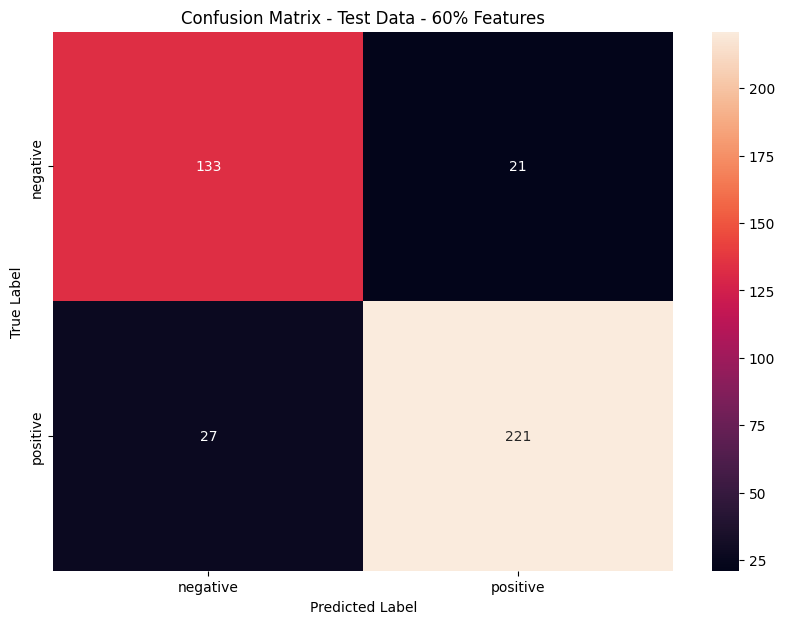

Classification Report - Test Data - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.86      0.85       154
     Positif       0.91      0.89      0.90       248

    accuracy                           0.88       402
   macro avg       0.87      0.88      0.87       402
weighted avg       0.88      0.88      0.88       402



Classification Report - Cross-Validation - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.86      0.89       642
     Positif       0.91      0.95      0.93       963

    accuracy                           0.91      1605
   macro avg       0.91      0.90      0.91      1605
weighted avg       0.91      0.91      0.91      1605

Cross-Validation Scores (65% features): [0.90502793 0.91061453 0.9273743  0.86516854 0.90449438 0.93820225
 0.92696629 0.8988764  0.92134831]
Mean Accuracy: 0.9108969932835352
Standard Deviation: 0.020263914863253532
Test Accuracy: 0.8855721393034826
Test Precision: 0.885336292002465
Test Recall: 0.8855721393034826
Test F1 Score: 0.8854313216072967


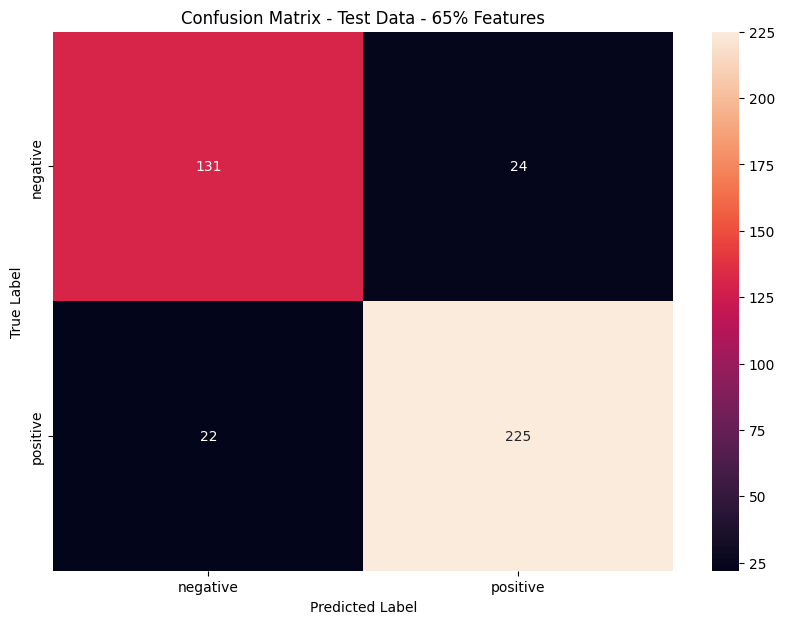

Classification Report - Test Data - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.85      0.85       155
     Positif       0.90      0.91      0.91       247

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



Classification Report - Cross-Validation - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.87      0.87       637
     Positif       0.91      0.92      0.92       968

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (70% features): [0.8603352  0.89944134 0.9273743  0.92696629 0.84269663 0.93258427
 0.90449438 0.88764045 0.91011236]
Mean Accuracy: 0.8990716911123664
Standard Deviation: 0.029179549553744008
Test Accuracy: 0.9129353233830846
Test Precision: 0.9135590554629812
Test Recall: 0.9129353233830846
Test F1 Score: 0.9122306072975035


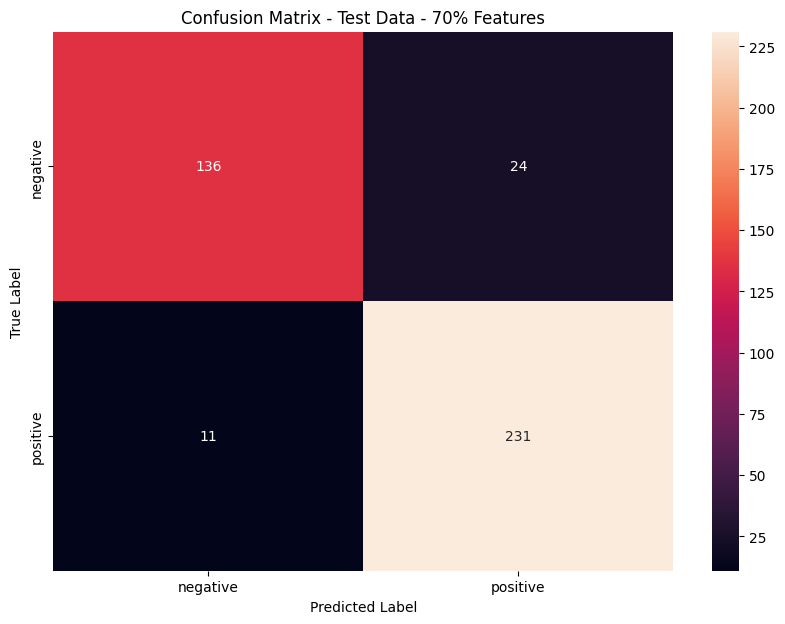

Classification Report - Test Data - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.93      0.85      0.89       160
     Positif       0.91      0.95      0.93       242

    accuracy                           0.91       402
   macro avg       0.92      0.90      0.91       402
weighted avg       0.91      0.91      0.91       402



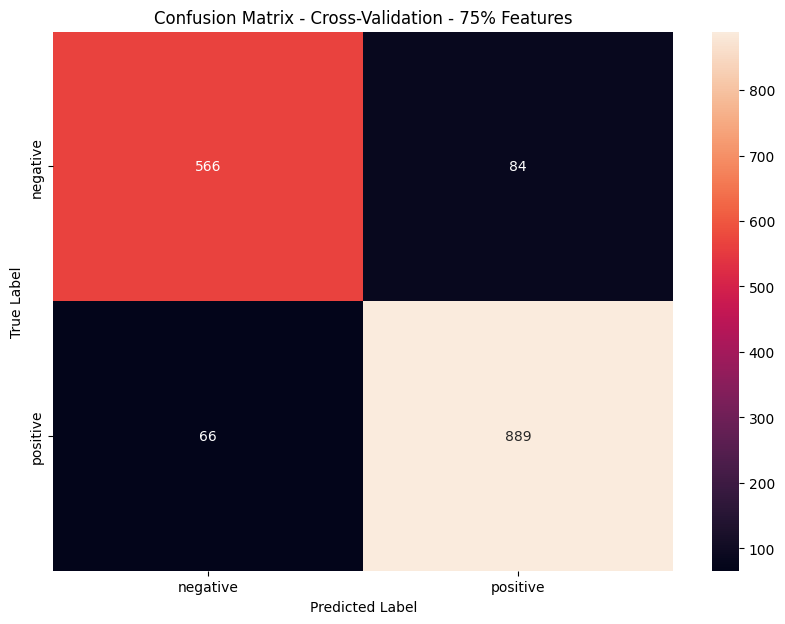

Classification Report - Cross-Validation - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.87      0.88       650
     Positif       0.91      0.93      0.92       955

    accuracy                           0.91      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.91      0.91      0.91      1605

Cross-Validation Scores (75% features): [0.89385475 0.92178771 0.89944134 0.8988764  0.91573034 0.90449438
 0.92134831 0.90449438 0.8988764 ]
Mean Accuracy: 0.9065448915113092
Standard Deviation: 0.009850989630691262
Test Accuracy: 0.8955223880597015
Test Precision: 0.8950578329945096
Test Recall: 0.8955223880597015
Test F1 Score: 0.8946875859057907


Classification Report - Test Data - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.82      0.85       147
     Positif       0.90      0.94      0.92       255

    accuracy                           0.90       402
   macro avg       0.89      0.88      0.89       402
weighted avg       0.90      0.90      0.89       402



Classification Report - Cross-Validation - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.85      0.87       637
     Positif       0.91      0.92      0.92       968

    accuracy                           0.90      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (80% features): [0.88826816 0.87709497 0.90502793 0.89325843 0.88764045 0.88764045
 0.92696629 0.8988764  0.90449438]
Mean Accuracy: 0.8965852739940995
Standard Deviation: 0.013671633325824007
Test Accuracy: 0.927860696517413
Test Precision: 0.9280727572396322
Test Recall: 0.927860696517413
Test F1 Score: 0.9274753525732411


Classification Report - Test Data - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.93      0.88      0.91       160
     Positif       0.92      0.96      0.94       242

    accuracy                           0.93       402
   macro avg       0.93      0.92      0.92       402
weighted avg       0.93      0.93      0.93       402



Classification Report - Cross-Validation - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.86      0.87       639
     Positif       0.91      0.92      0.91       966

    accuracy                           0.89      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (85% features): [0.88826816 0.93854749 0.87150838 0.92134831 0.89325843 0.88202247
 0.89325843 0.89325843 0.87078652]
Mean Accuracy: 0.8946951785128925
Standard Deviation: 0.020951698795844572
Test Accuracy: 0.9228855721393034
Test Precision: 0.9230025694537103
Test Recall: 0.9228855721393034
Test F1 Score: 0.9224534495285845


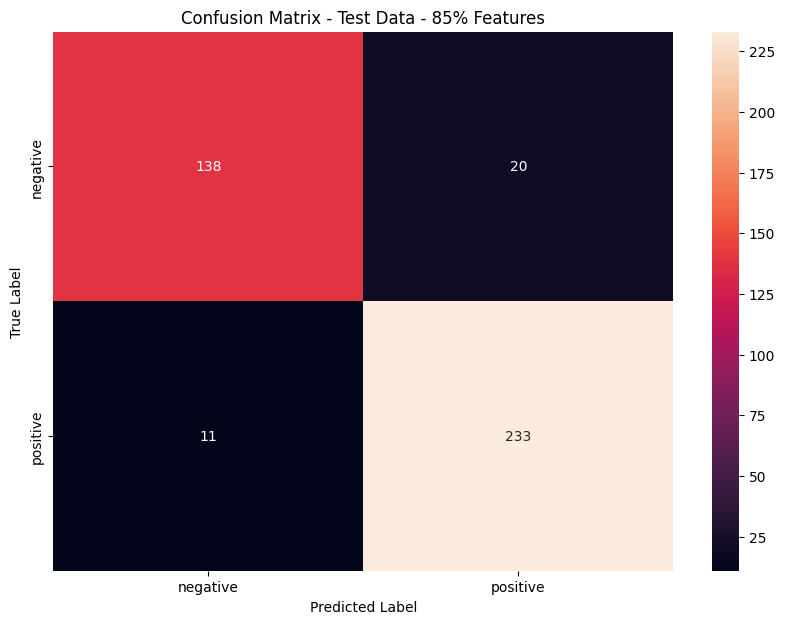

Classification Report - Test Data - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.93      0.87      0.90       158
     Positif       0.92      0.95      0.94       244

    accuracy                           0.92       402
   macro avg       0.92      0.91      0.92       402
weighted avg       0.92      0.92      0.92       402



Classification Report - Cross-Validation - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.84      0.87       636
     Positif       0.90      0.93      0.92       969

    accuracy                           0.90      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (90% features): [0.88826816 0.84916201 0.90502793 0.88202247 0.92134831 0.8988764
 0.91011236 0.91011236 0.8988764 ]
Mean Accuracy: 0.8959784905739334
Standard Deviation: 0.019966224666138833
Test Accuracy: 0.9079601990049752
Test Precision: 0.9078756527280951
Test Recall: 0.9079601990049752
Test F1 Score: 0.9079121141260669


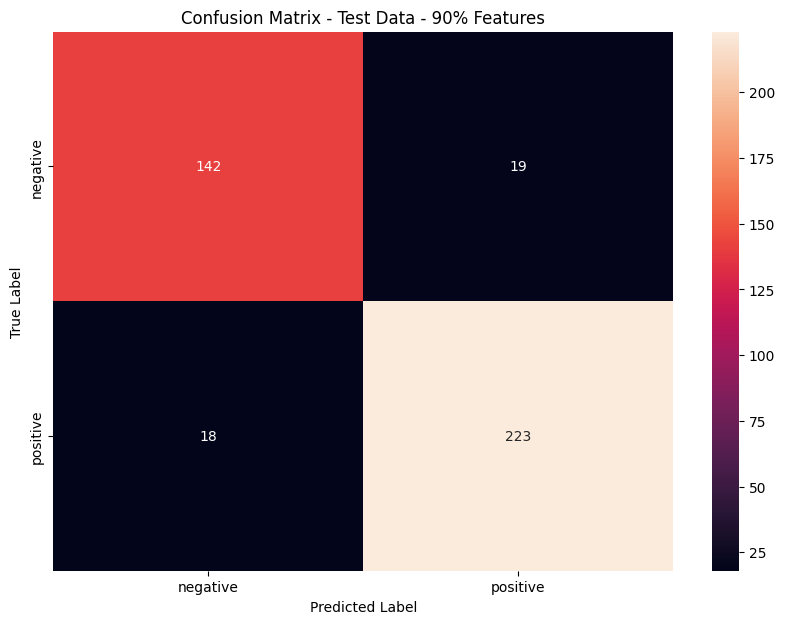

Classification Report - Test Data - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.88      0.88       161
     Positif       0.92      0.93      0.92       241

    accuracy                           0.91       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.91      0.91      0.91       402



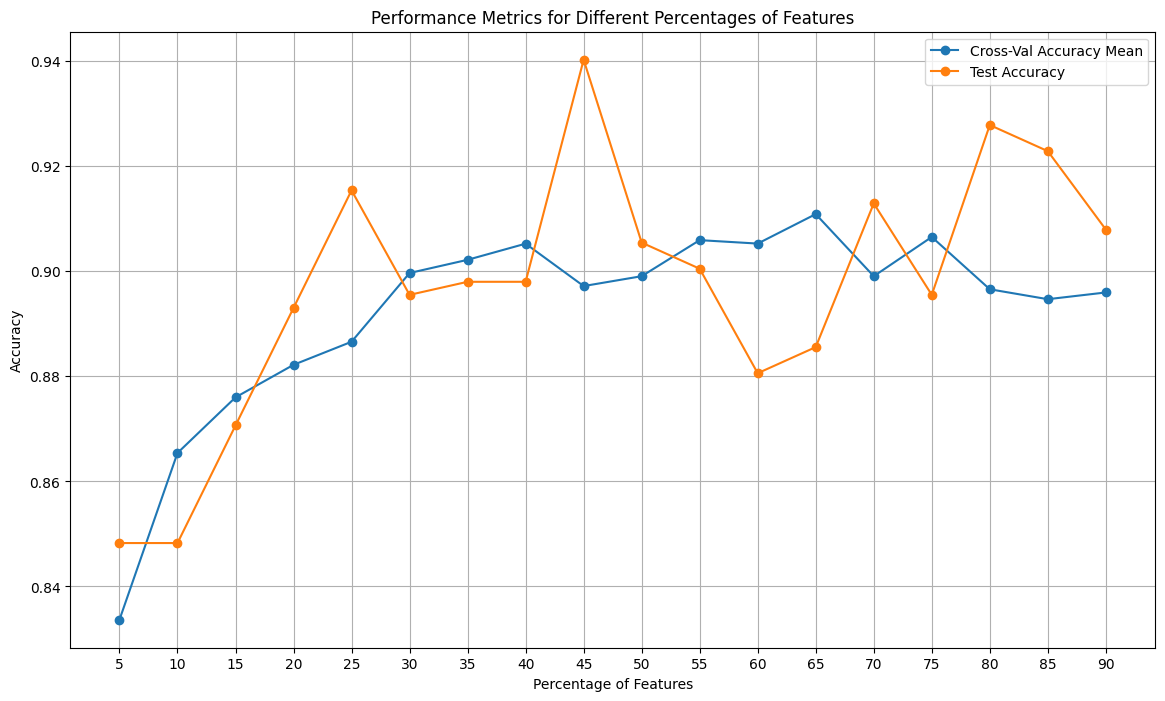

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')

# Daftar persentase fitur yang akan dievaluasi
persen_fitur_list = range(5, 95, 5)

# Menyimpan hasil performa untuk setiap persentase fitur
all_performances = []

# Melakukan seleksi fitur dan evaluasi model
for persen_fitur in persen_fitur_list:
    # Menentukan jumlah fitur yang akan dipilih
    num_feature_to_select = int(persen_fitur * tf_idf.shape[1] / 100)

    # Seleksi fitur menggunakan SelectKBest
    selector = SelectKBest(f_classif, k=num_feature_to_select)
    X_selected = selector.fit_transform(tf_idf, y)

    # Membagi data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=True)

    # Membuat model SVM
    modelsvm = SVC(kernel='linear', gamma=0.01, C=1)

    # Menggunakan k-fold cross-validation dengan k=5
    k = 9
    scores = cross_val_score(modelsvm, X_train, y_train, cv=k)
    y_train_pred = cross_val_predict(modelsvm, X_train, y_train, cv=k)

    # Confusion Matrix untuk cross-validation
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Cross-Validation - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report
    print(f"Classification Report - Cross-Validation - {persen_fitur}% Features:")
    print(classification_report(y_train, y_train_pred))

    # Menampilkan performa cross-validation
    print(f"Cross-Validation Scores ({persen_fitur}% features): {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

    # Melatih model dengan seluruh data latih
    modelsvm.fit(X_train, y_train)

    # Memprediksi data uji
    y_pred = modelsvm.predict(X_test)

    # Menghitung performa pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test F1 Score: {f1}")

    # Confusion Matrix untuk data uji
    conf_matrix_test = confusion_matrix(y_test, y_pred)
    df_cm_test = pd.DataFrame(conf_matrix_test, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix untuk data uji
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm_test, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Test Data - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report untuk data uji
    print(f"Classification Report - Test Data - {persen_fitur}% Features:")
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil performa
    performance = {
        'persen_fitur': persen_fitur,
        'cross_val_accuracy_mean': scores.mean(),
        'cross_val_accuracy_std': scores.std(),
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1
    }
    all_performances.append(performance)

# Visualisasi performa berdasarkan persentase fitur
df_performance = pd.DataFrame(all_performances)

plt.figure(figsize=(14, 8))
plt.plot(df_performance['persen_fitur'], df_performance['cross_val_accuracy_mean'], marker='o', label='Cross-Val Accuracy Mean')
plt.plot(df_performance['persen_fitur'], df_performance['test_accuracy'], marker='o', label='Test Accuracy')

# Mengatur label x-axis agar menampilkan persentase fitur secara lengkap
plt.xticks(df_performance['persen_fitur'])

plt.title('Performance Metrics for Different Percentages of Features')
plt.xlabel('Percentage of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Classification Report - Cross-Validation - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.77      0.80       656
     Positif       0.85      0.91      0.88       949

    accuracy                           0.85      1605
   macro avg       0.85      0.84      0.84      1605
weighted avg       0.85      0.85      0.85      1605

Cross-Validation Scores (5% features): [0.87709497 0.82122905 0.83240223 0.85393258 0.85393258 0.84831461
 0.85955056 0.82022472 0.86516854]
Mean Accuracy: 0.8479833169432065
Standard Deviation: 0.01848909428406545
Test Accuracy: 0.8159203980099502
Test Precision: 0.814464872627667
Test Recall: 0.8159203980099502
Test F1 Score: 0.8099654419414315


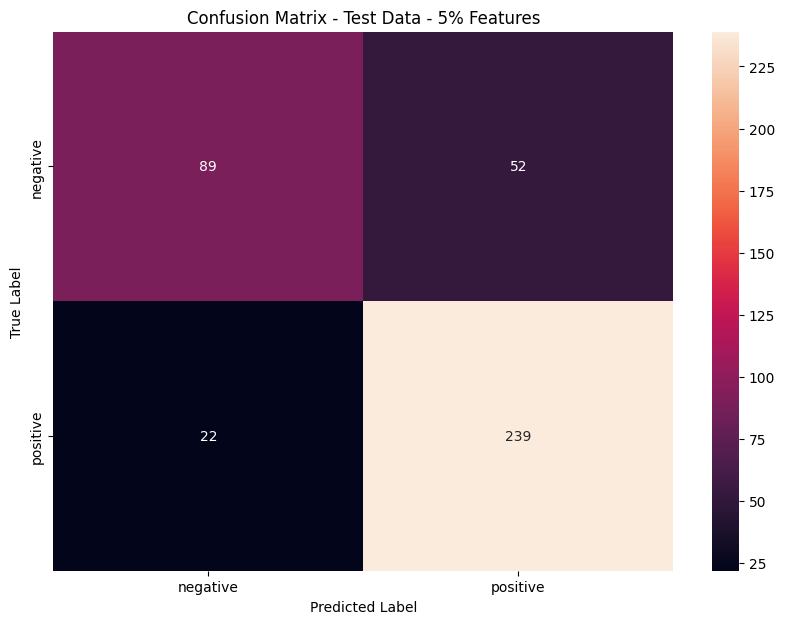

Classification Report - Test Data - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.80      0.63      0.71       141
     Positif       0.82      0.92      0.87       261

    accuracy                           0.82       402
   macro avg       0.81      0.77      0.79       402
weighted avg       0.81      0.82      0.81       402



Classification Report - Cross-Validation - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.75      0.81       659
     Positif       0.84      0.93      0.88       946

    accuracy                           0.86      1605
   macro avg       0.86      0.84      0.85      1605
weighted avg       0.86      0.86      0.85      1605

Cross-Validation Scores (10% features): [0.87709497 0.82681564 0.81564246 0.87640449 0.83707865 0.83146067
 0.91011236 0.86516854 0.86516854]
Mean Accuracy: 0.8561051478947406
Standard Deviation: 0.028670866482664262
Test Accuracy: 0.8631840796019901
Test Precision: 0.8617977513429445
Test Recall: 0.8631840796019901
Test F1 Score: 0.8611423102939612


Classification Report - Test Data - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.75      0.79       138
     Positif       0.87      0.92      0.90       264

    accuracy                           0.86       402
   macro avg       0.86      0.84      0.84       402
weighted avg       0.86      0.86      0.86       402



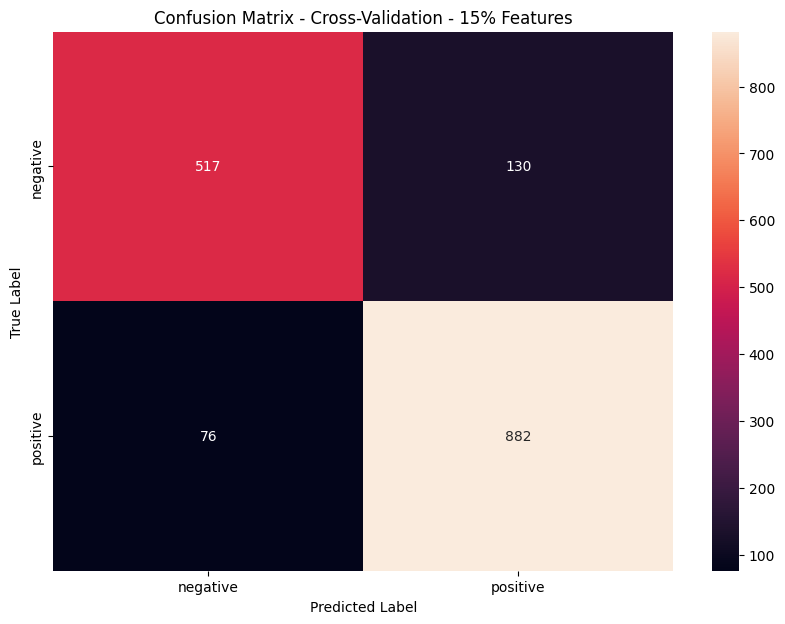

Classification Report - Cross-Validation - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.80      0.83       647
     Positif       0.87      0.92      0.90       958

    accuracy                           0.87      1605
   macro avg       0.87      0.86      0.86      1605
weighted avg       0.87      0.87      0.87      1605

Cross-Validation Scores (15% features): [0.90502793 0.89385475 0.8547486  0.85393258 0.80898876 0.8988764
 0.82022472 0.92134831 0.88764045]
Mean Accuracy: 0.8716269467634731
Standard Deviation: 0.03688507763860359
Test Accuracy: 0.9029850746268657
Test Precision: 0.9026620383044426
Test Recall: 0.9029850746268657
Test F1 Score: 0.9023358519394347


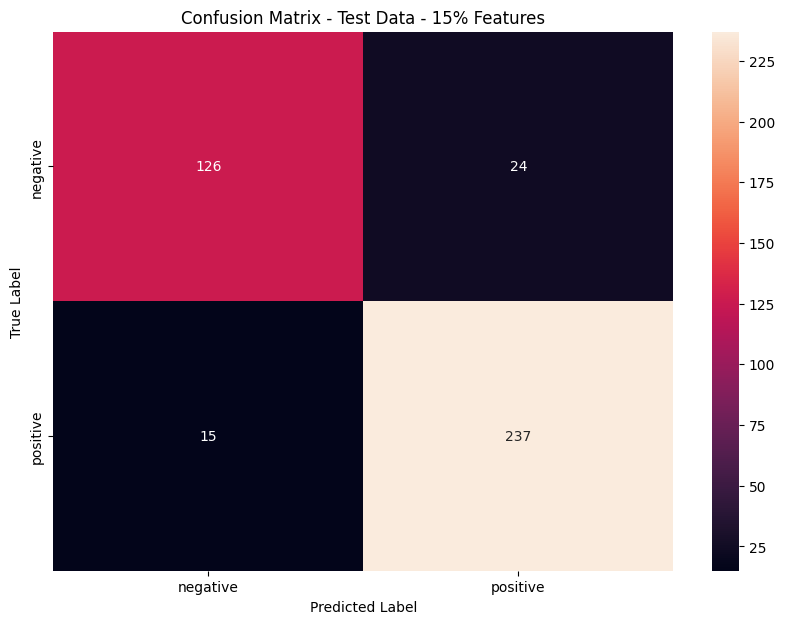

Classification Report - Test Data - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.84      0.87       150
     Positif       0.91      0.94      0.92       252

    accuracy                           0.90       402
   macro avg       0.90      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



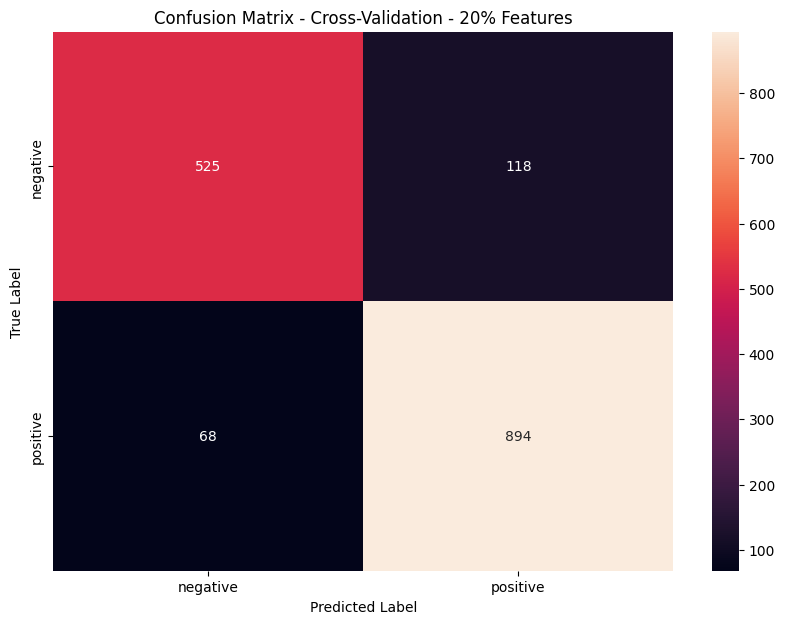

Classification Report - Cross-Validation - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.82      0.85       643
     Positif       0.88      0.93      0.91       962

    accuracy                           0.88      1605
   macro avg       0.88      0.87      0.88      1605
weighted avg       0.88      0.88      0.88      1605

Cross-Validation Scores (20% features): [0.89385475 0.86592179 0.89385475 0.89325843 0.84831461 0.87640449
 0.8988764  0.93258427 0.85393258]
Mean Accuracy: 0.8841113412703394
Standard Deviation: 0.024548337697369915
Test Accuracy: 0.8681592039800995
Test Precision: 0.8675216137902705
Test Recall: 0.8681592039800995
Test F1 Score: 0.8671479333553578


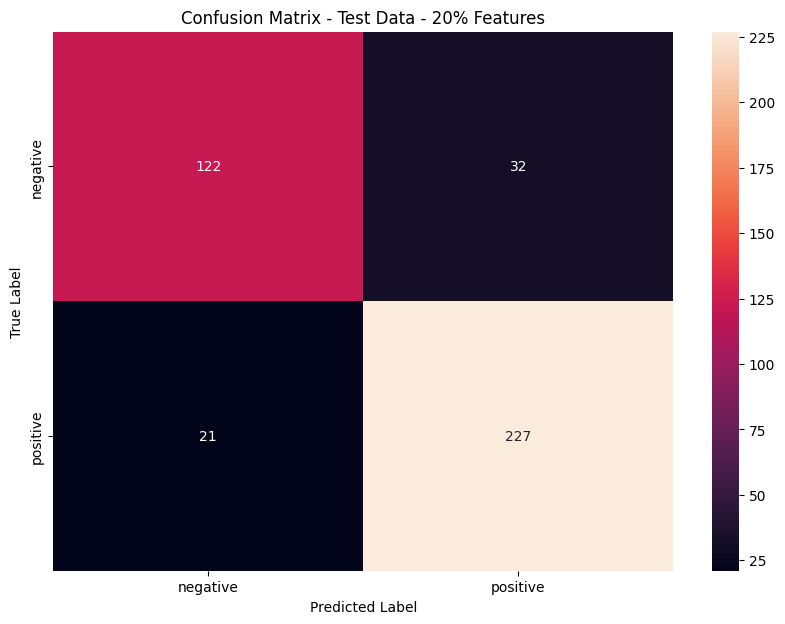

Classification Report - Test Data - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.79      0.82       154
     Positif       0.88      0.92      0.90       248

    accuracy                           0.87       402
   macro avg       0.86      0.85      0.86       402
weighted avg       0.87      0.87      0.87       402



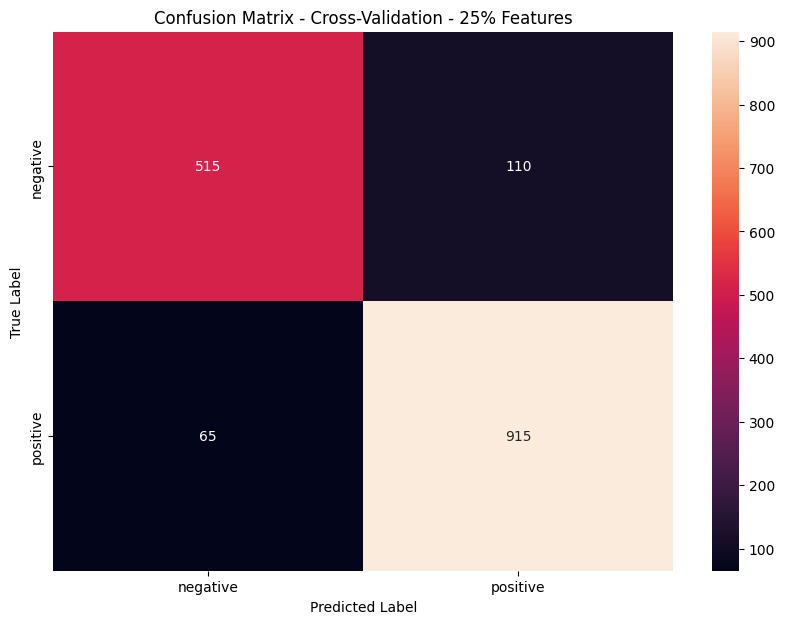

Classification Report - Cross-Validation - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.82      0.85       625
     Positif       0.89      0.93      0.91       980

    accuracy                           0.89      1605
   macro avg       0.89      0.88      0.88      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (25% features): [0.87709497 0.87709497 0.88826816 0.87078652 0.90449438 0.93258427
 0.88764045 0.92696629 0.85393258]
Mean Accuracy: 0.8909847327711868
Standard Deviation: 0.024478900811499785
Test Accuracy: 0.9054726368159204
Test Precision: 0.907034558290474
Test Recall: 0.9054726368159204
Test F1 Score: 0.9047557865519706


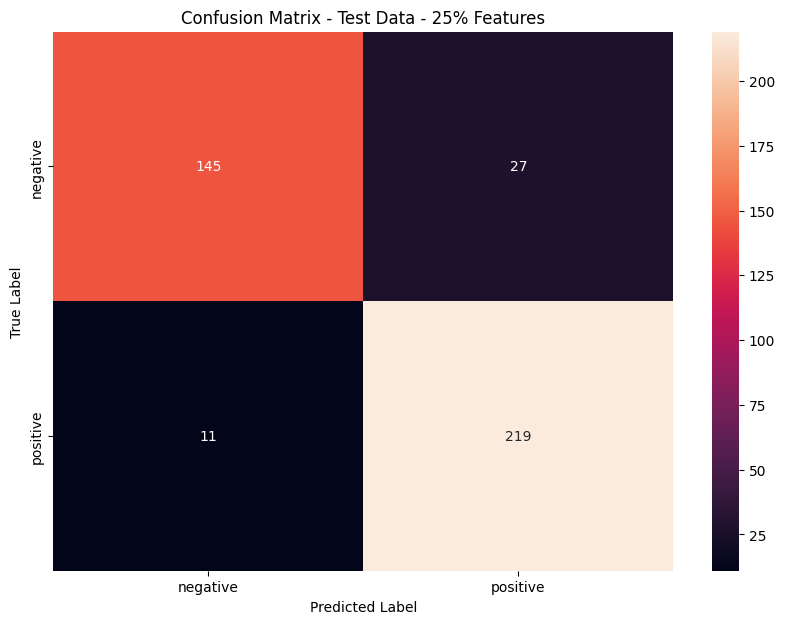

Classification Report - Test Data - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.93      0.84      0.88       172
     Positif       0.89      0.95      0.92       230

    accuracy                           0.91       402
   macro avg       0.91      0.90      0.90       402
weighted avg       0.91      0.91      0.90       402



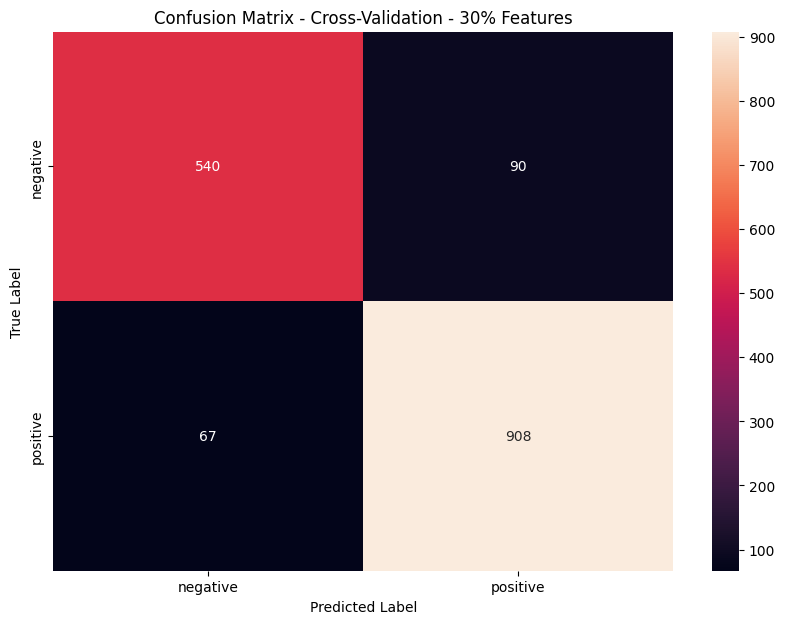

Classification Report - Cross-Validation - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.86      0.87       630
     Positif       0.91      0.93      0.92       975

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (30% features): [0.93296089 0.89385475 0.89944134 0.90449438 0.92134831 0.92134831
 0.89325843 0.86516854 0.88764045]
Mean Accuracy: 0.9021683789118351
Standard Deviation: 0.019508739999237606
Test Accuracy: 0.900497512437811
Test Precision: 0.9009434998183953
Test Recall: 0.900497512437811
Test F1 Score: 0.8998820489957624


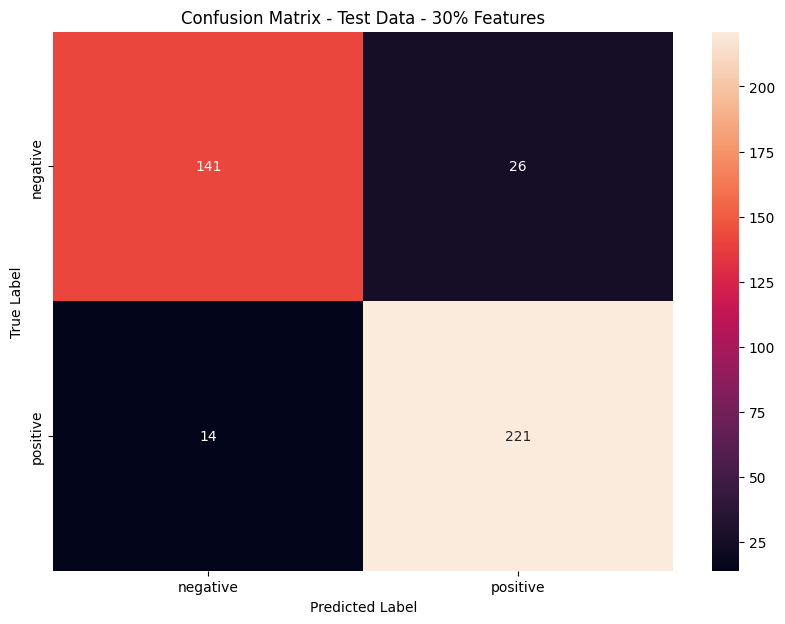

Classification Report - Test Data - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.84      0.88       167
     Positif       0.89      0.94      0.92       235

    accuracy                           0.90       402
   macro avg       0.90      0.89      0.90       402
weighted avg       0.90      0.90      0.90       402



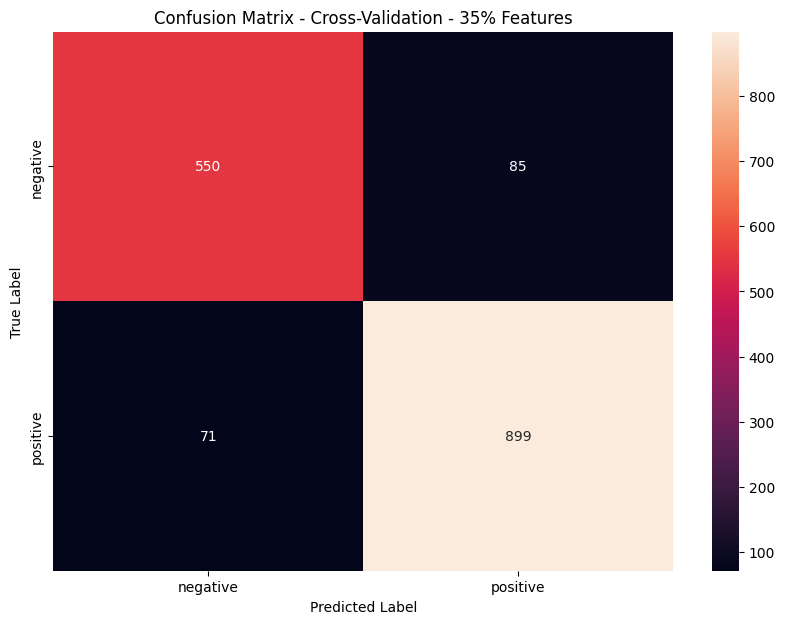

Classification Report - Cross-Validation - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.87      0.88       635
     Positif       0.91      0.93      0.92       970

    accuracy                           0.90      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (35% features): [0.88268156 0.91061453 0.91620112 0.89325843 0.92134831 0.88202247
 0.8988764  0.92134831 0.8988764 ]
Mean Accuracy: 0.9028030604202848
Standard Deviation: 0.014479965330718322
Test Accuracy: 0.8955223880597015
Test Precision: 0.8952563635854498
Test Recall: 0.8955223880597015
Test F1 Score: 0.8951816737417037


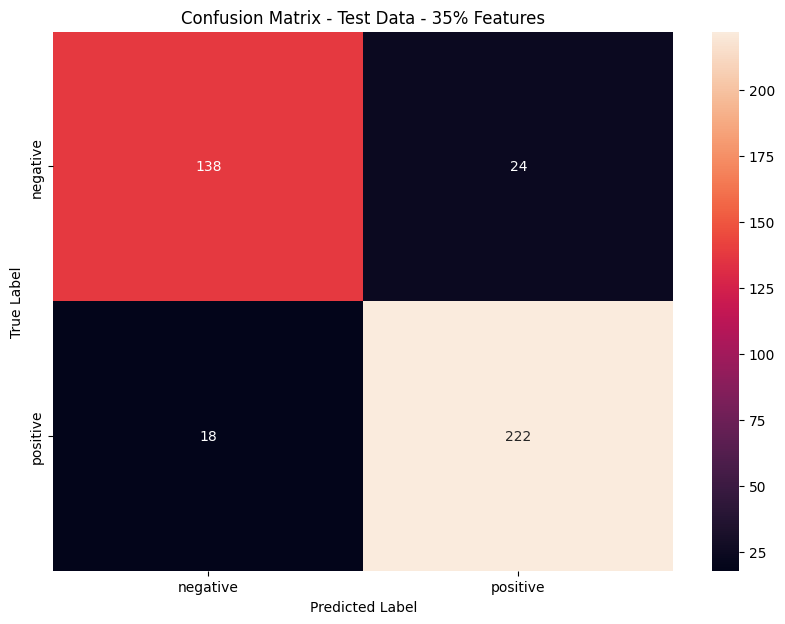

Classification Report - Test Data - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.85      0.87       162
     Positif       0.90      0.93      0.91       240

    accuracy                           0.90       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



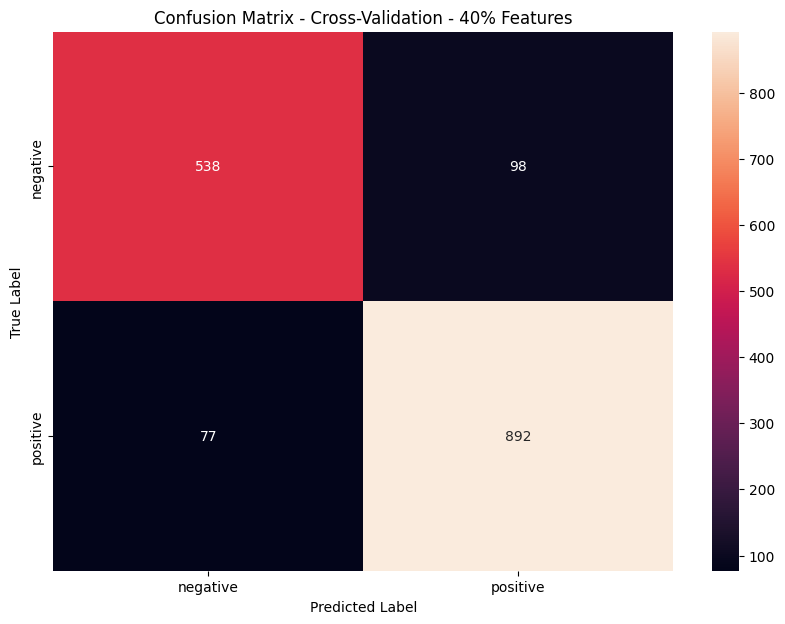

Classification Report - Cross-Validation - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.85      0.86       636
     Positif       0.90      0.92      0.91       969

    accuracy                           0.89      1605
   macro avg       0.89      0.88      0.89      1605
weighted avg       0.89      0.89      0.89      1605

Cross-Validation Scores (40% features): [0.92178771 0.89944134 0.92178771 0.90449438 0.87078652 0.86516854
 0.84269663 0.90449438 0.88764045]
Mean Accuracy: 0.8909219620725489
Standard Deviation: 0.025279582671081387
Test Accuracy: 0.9303482587064676
Test Precision: 0.9302485939739922
Test Recall: 0.9303482587064676
Test F1 Score: 0.930274505571317


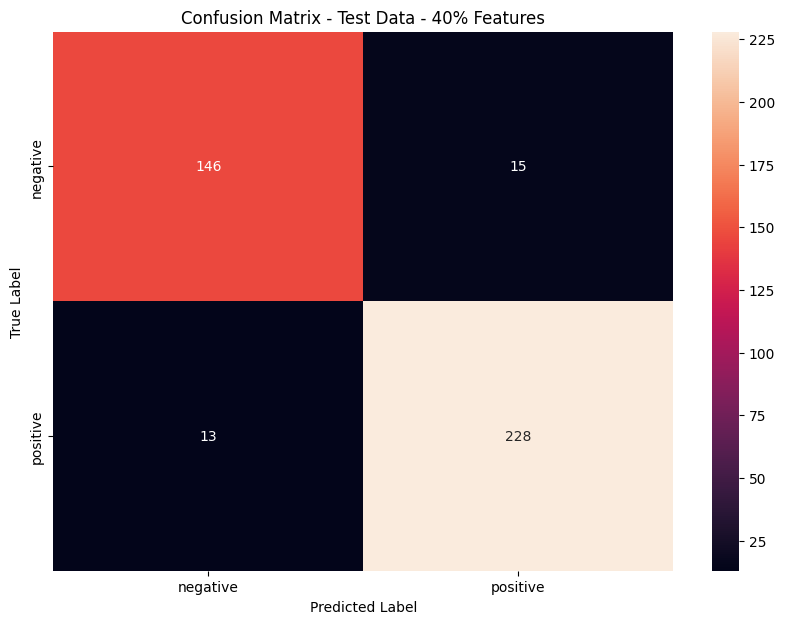

Classification Report - Test Data - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.91      0.91       161
     Positif       0.94      0.95      0.94       241

    accuracy                           0.93       402
   macro avg       0.93      0.93      0.93       402
weighted avg       0.93      0.93      0.93       402



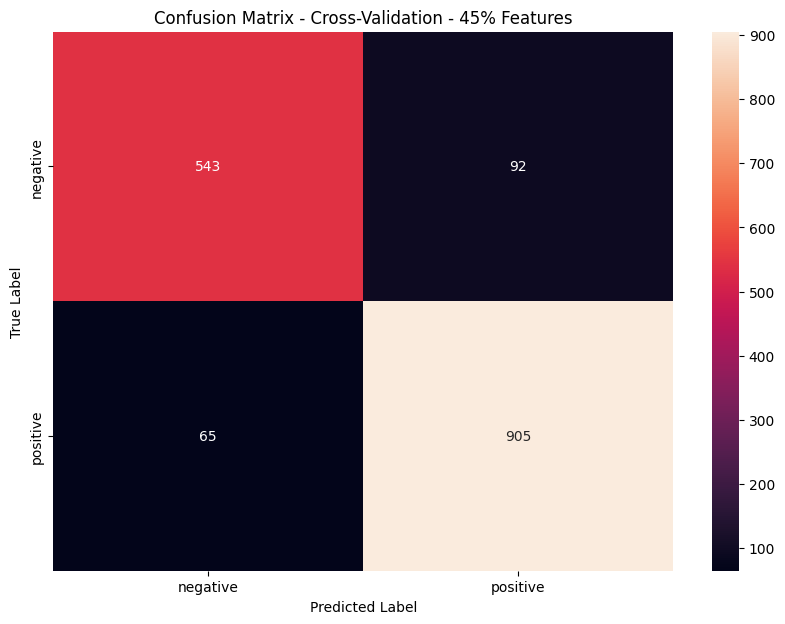

Classification Report - Cross-Validation - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.86      0.87       635
     Positif       0.91      0.93      0.92       970

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (45% features): [0.91620112 0.88268156 0.89944134 0.89325843 0.90449438 0.87640449
 0.92696629 0.88764045 0.93258427]
Mean Accuracy: 0.9021858152170122
Standard Deviation: 0.018510617431177087
Test Accuracy: 0.9079601990049752
Test Precision: 0.9085512565036451
Test Recall: 0.9079601990049752
Test F1 Score: 0.9072500440733791


Classification Report - Test Data - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.85      0.88       162
     Positif       0.90      0.95      0.92       240

    accuracy                           0.91       402
   macro avg       0.91      0.90      0.90       402
weighted avg       0.91      0.91      0.91       402



Classification Report - Cross-Validation - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.85      0.87       647
     Positif       0.90      0.93      0.91       958

    accuracy                           0.90      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (50% features): [0.86592179 0.9273743  0.91620112 0.91011236 0.86516854 0.89325843
 0.90449438 0.8988764  0.88202247]
Mean Accuracy: 0.8959366434415083
Standard Deviation: 0.020358312735772537
Test Accuracy: 0.9104477611940298
Test Precision: 0.9107313432835822
Test Recall: 0.9104477611940298
Test F1 Score: 0.9105659008721464


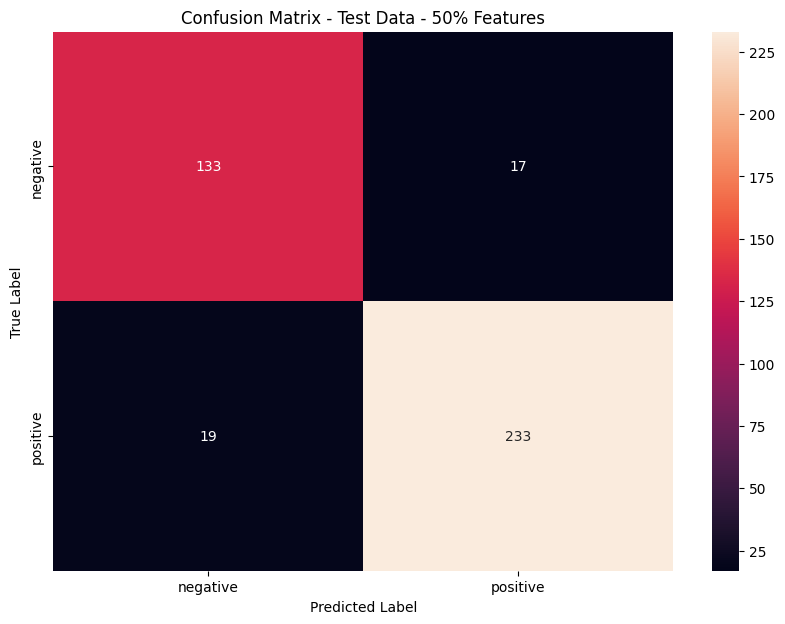

Classification Report - Test Data - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.89      0.88       150
     Positif       0.93      0.92      0.93       252

    accuracy                           0.91       402
   macro avg       0.90      0.91      0.90       402
weighted avg       0.91      0.91      0.91       402



Classification Report - Cross-Validation - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.84      0.87       631
     Positif       0.90      0.94      0.92       974

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.89      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (55% features): [0.91620112 0.87709497 0.90502793 0.90449438 0.86516854 0.91011236
 0.8988764  0.91011236 0.91011236]
Mean Accuracy: 0.899688936315639
Standard Deviation: 0.01616923624820422
Test Accuracy: 0.8905472636815921
Test Precision: 0.8911503011259492
Test Recall: 0.8905472636815921
Test F1 Score: 0.8897144064598199


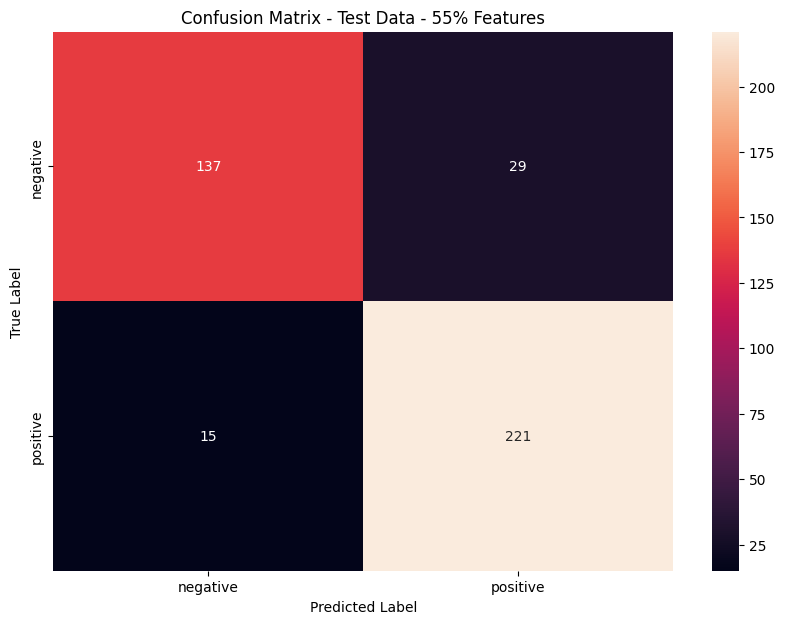

Classification Report - Test Data - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.83      0.86       166
     Positif       0.88      0.94      0.91       236

    accuracy                           0.89       402
   macro avg       0.89      0.88      0.89       402
weighted avg       0.89      0.89      0.89       402



Classification Report - Cross-Validation - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.86      0.88       645
     Positif       0.91      0.93      0.92       960

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (60% features): [0.91061453 0.89385475 0.88826816 0.92696629 0.91573034 0.92696629
 0.8988764  0.89325843 0.85393258]
Mean Accuracy: 0.9009408630273611
Standard Deviation: 0.02147563165991558
Test Accuracy: 0.9154228855721394
Test Precision: 0.9169657908803092
Test Recall: 0.9154228855721394
Test F1 Score: 0.915819588735497


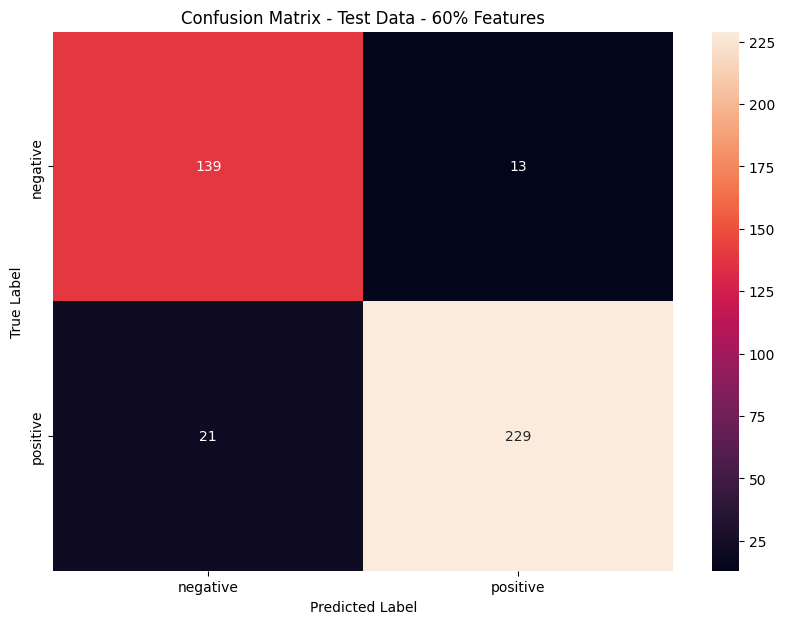

Classification Report - Test Data - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.91      0.89       152
     Positif       0.95      0.92      0.93       250

    accuracy                           0.92       402
   macro avg       0.91      0.92      0.91       402
weighted avg       0.92      0.92      0.92       402



Classification Report - Cross-Validation - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.87      0.88       660
     Positif       0.91      0.93      0.92       945

    accuracy                           0.91      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.91      0.91      0.91      1605

Cross-Validation Scores (65% features): [0.87709497 0.94413408 0.88826816 0.86516854 0.93258427 0.91011236
 0.94382022 0.88764045 0.8988764 ]
Mean Accuracy: 0.9052999393216579
Standard Deviation: 0.027505044498622146
Test Accuracy: 0.8980099502487562
Test Precision: 0.8991634460417307
Test Recall: 0.8980099502487562
Test F1 Score: 0.8984381726798676


Classification Report - Test Data - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.87      0.85       137
     Positif       0.93      0.91      0.92       265

    accuracy                           0.90       402
   macro avg       0.88      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



Classification Report - Cross-Validation - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.86      0.88       650
     Positif       0.91      0.93      0.92       955

    accuracy                           0.90      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (70% features): [0.93296089 0.89385475 0.89944134 0.92696629 0.87078652 0.90449438
 0.91011236 0.91573034 0.87078652]
Mean Accuracy: 0.9027925986371783
Standard Deviation: 0.020704932774642956
Test Accuracy: 0.9104477611940298
Test Precision: 0.9100608476327094
Test Recall: 0.9104477611940298
Test F1 Score: 0.9100355779243319


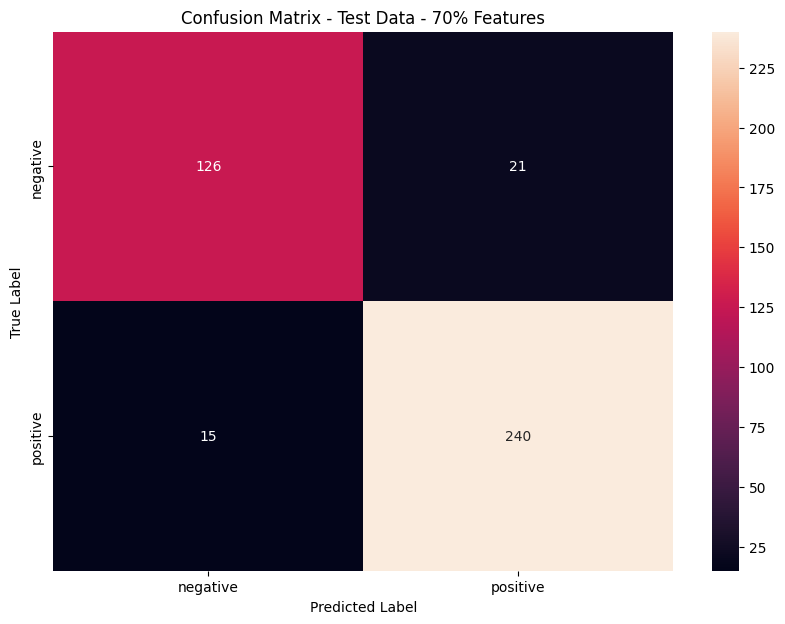

Classification Report - Test Data - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.86      0.88       147
     Positif       0.92      0.94      0.93       255

    accuracy                           0.91       402
   macro avg       0.91      0.90      0.90       402
weighted avg       0.91      0.91      0.91       402



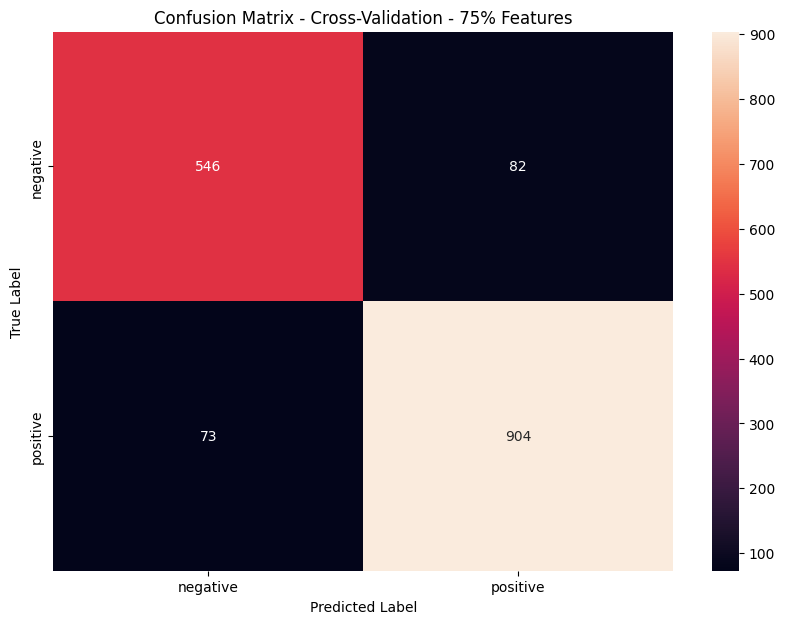

Classification Report - Cross-Validation - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.87      0.88       628
     Positif       0.92      0.93      0.92       977

    accuracy                           0.90      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (75% features): [0.91620112 0.84357542 0.91620112 0.93258427 0.8988764  0.88764045
 0.92134831 0.87078652 0.94382022]
Mean Accuracy: 0.9034482037118406
Standard Deviation: 0.02990135742322788
Test Accuracy: 0.9029850746268657
Test Precision: 0.9031064974713211
Test Recall: 0.9029850746268657
Test F1 Score: 0.9025772115267526


Classification Report - Test Data - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.86      0.88       169
     Positif       0.90      0.94      0.92       233

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



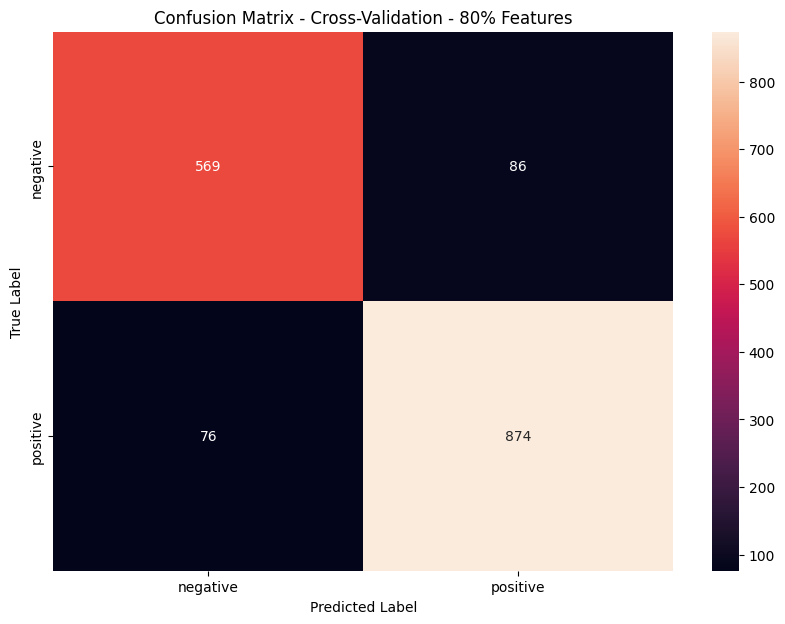

Classification Report - Cross-Validation - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.87      0.88       655
     Positif       0.91      0.92      0.92       950

    accuracy                           0.90      1605
   macro avg       0.90      0.89      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (80% features): [0.89385475 0.89944134 0.92178771 0.88202247 0.88202247 0.87640449
 0.91011236 0.91573034 0.91011236]
Mean Accuracy: 0.8990542548071893
Standard Deviation: 0.015491304543151362
Test Accuracy: 0.9029850746268657
Test Precision: 0.9052055098770679
Test Recall: 0.9029850746268657
Test F1 Score: 0.9036207260751472


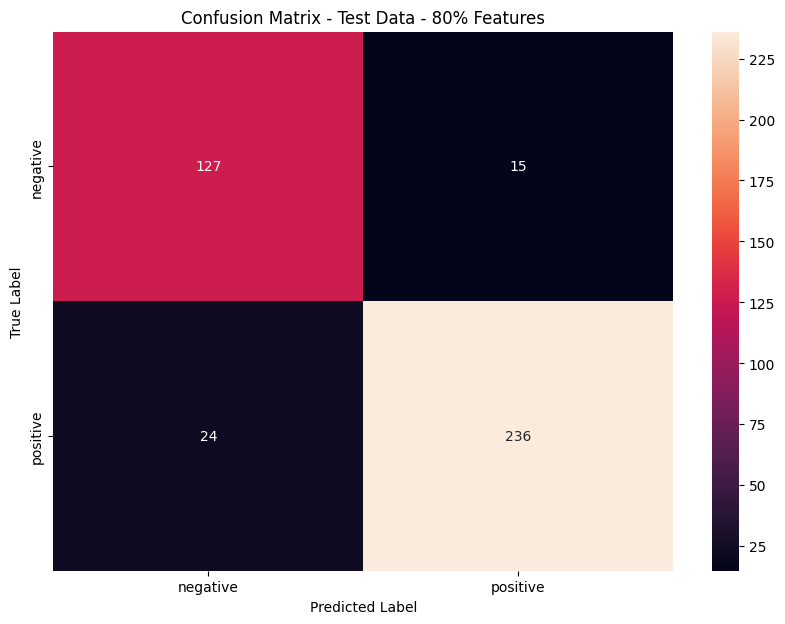

Classification Report - Test Data - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.89      0.87       142
     Positif       0.94      0.91      0.92       260

    accuracy                           0.90       402
   macro avg       0.89      0.90      0.90       402
weighted avg       0.91      0.90      0.90       402



Classification Report - Cross-Validation - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.87      0.88       630
     Positif       0.92      0.94      0.93       975

    accuracy                           0.91      1605
   macro avg       0.91      0.90      0.90      1605
weighted avg       0.91      0.91      0.91      1605

Cross-Validation Scores (85% features): [0.93296089 0.91620112 0.9273743  0.88202247 0.8988764  0.91573034
 0.8988764  0.90449438 0.91011236]
Mean Accuracy: 0.909627630266636
Standard Deviation: 0.014755966692805616
Test Accuracy: 0.8706467661691543
Test Precision: 0.8703474183871821
Test Recall: 0.8706467661691543
Test F1 Score: 0.8704086014118131


Classification Report - Test Data - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.83      0.84       167
     Positif       0.88      0.90      0.89       235

    accuracy                           0.87       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.87      0.87      0.87       402



Classification Report - Cross-Validation - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.88      0.87      0.87       630
     Positif       0.91      0.93      0.92       975

    accuracy                           0.90      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.90      0.90      0.90      1605

Cross-Validation Scores (90% features): [0.89944134 0.93296089 0.87709497 0.90449438 0.8988764  0.92696629
 0.91011236 0.87640449 0.89325843]
Mean Accuracy: 0.9021788406949415
Standard Deviation: 0.018323470570136564
Test Accuracy: 0.917910447761194
Test Precision: 0.9178202352435354
Test Recall: 0.917910447761194
Test F1 Score: 0.9177187172440469


Classification Report - Test Data - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.89      0.90       167
     Positif       0.92      0.94      0.93       235

    accuracy                           0.92       402
   macro avg       0.92      0.91      0.92       402
weighted avg       0.92      0.92      0.92       402



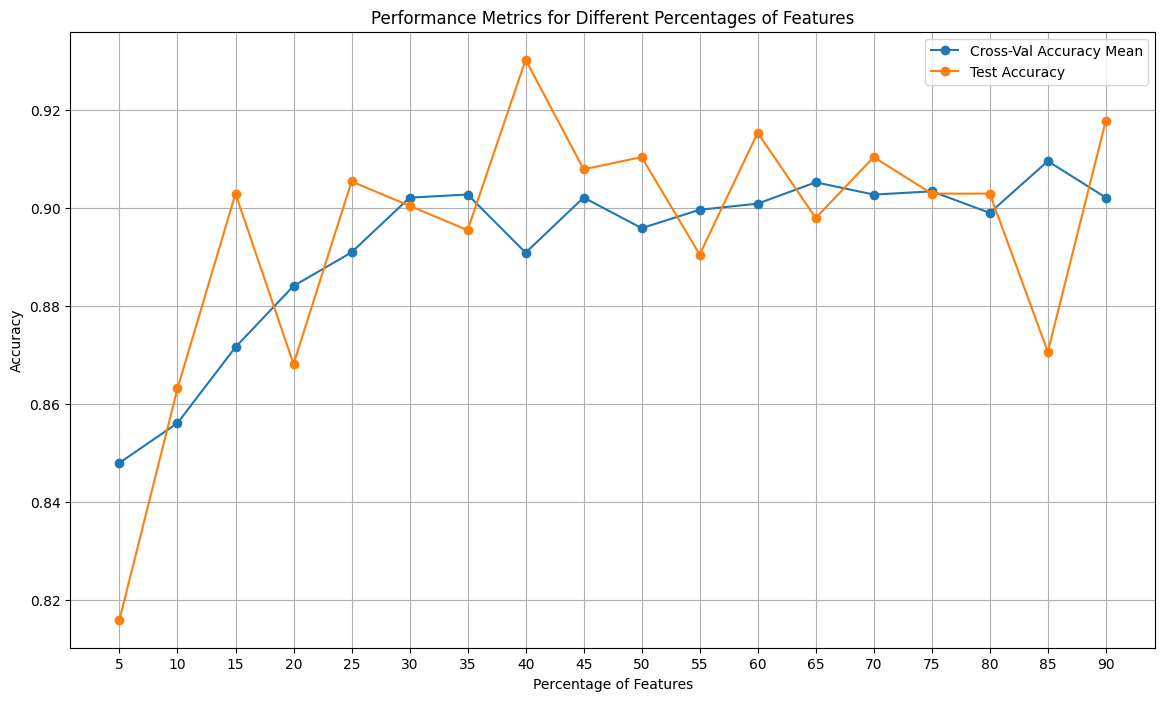

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')

# Daftar persentase fitur yang akan dievaluasi
persen_fitur_list = range(5, 95, 5)

# Menyimpan hasil performa untuk setiap persentase fitur
all_performances = []

# Melakukan seleksi fitur dan evaluasi model
for persen_fitur in persen_fitur_list:
    # Menentukan jumlah fitur yang akan dipilih
    num_feature_to_select = int(persen_fitur * tf_idf.shape[1] / 100)

    # Seleksi fitur menggunakan SelectKBest
    selector = SelectKBest(f_classif, k=num_feature_to_select)
    X_selected = selector.fit_transform(tf_idf, y)

    # Membagi data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=True)

    # Membuat model SVM
    modelsvm = SVC(kernel='linear', gamma=0.01, C=1)

    # Menggunakan k-fold cross-validation dengan k=9
    k = 9
    scores = cross_val_score(modelsvm, X_train, y_train, cv=k)
    y_train_pred = cross_val_predict(modelsvm, X_train, y_train, cv=k)
    if persen_fitur == 40:
      modelsvm.fit(X_train, y_train)


    # Confusion Matrix untuk cross-validation
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Cross-Validation - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report
    print(f"Classification Report - Cross-Validation - {persen_fitur}% Features:")
    print(classification_report(y_train, y_train_pred))

    # Menampilkan performa cross-validation
    print(f"Cross-Validation Scores ({persen_fitur}% features): {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

    # Melatih model dengan seluruh data latih
    modelsvm.fit(X_train, y_train)

    # Memprediksi data uji
    y_pred = modelsvm.predict(X_test)

    # Menghitung performa pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test F1 Score: {f1}")

    # Confusion Matrix untuk data uji
    conf_matrix_test = confusion_matrix(y_test, y_pred)
    df_cm_test = pd.DataFrame(conf_matrix_test, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix untuk data uji
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm_test, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Test Data - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report untuk data uji
    print(f"Classification Report - Test Data - {persen_fitur}% Features:")
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil performa
    performance = {
        'persen_fitur': persen_fitur,
        'cross_val_accuracy_mean': scores.mean(),
        'cross_val_accuracy_std': scores.std(),
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1
    }
    all_performances.append(performance)

# Visualisasi performa berdasarkan persentase fitur
df_performance = pd.DataFrame(all_performances)

plt.figure(figsize=(14, 8))
plt.plot(df_performance['persen_fitur'], df_performance['cross_val_accuracy_mean'], marker='o', label='Cross-Val Accuracy Mean')
plt.plot(df_performance['persen_fitur'], df_performance['test_accuracy'], marker='o', label='Test Accuracy')

# Mengatur label x-axis agar menampilkan persentase fitur secara lengkap
plt.xticks(df_performance['persen_fitur'])

plt.title('Performance Metrics for Different Percentages of Features')
plt.xlabel('Percentage of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(modelsvm)

SVC(C=1, gamma=0.01, kernel='linear')


In [ ]:
import joblib
filenamemodelbest = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/modelsvm+chisquare.pkl'
joblib.dump(modelsvm,filenamemodelbest)


['/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/modelsvm+chisquare.pkl']

# Word Cloud


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/temp_data.csv')
df

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  compound scores  \
0     aplikasi ringan fitur reksa dana lengkap cocok...               16   
1     umum sistem aplikasi guna aplikasi standard mi...              -11   
2     bareksa aplikasi investasi bagus ringan jelas ...                9   
3     mau tambah rekening sebut terus tolak alas ktp...               -1   
4     performa tampil aplikasi sangat bagus ringan f...                4   
...                                                 ...              ...   
2002  upload bukti transaksi tunda terus gagal pesan...               -6   
2003  laku tari tanggal september kemarin kata sukse...              -11   
2004      transaksi lambat banget aplikasi kurang bagus                2   
2005  mohon maaf betul ektp buram bisa baca kamera h...                8   
2006         mohon baik lebih lanjut edit profil update                8   

     Sentimen  
0     Positif  
1     Negatif  
2     Positif  
3     Negatif  
4     Positif  
...       ...  
2002  Negatif  
2003  Negatif  
2004  Positif  
2005  Positif  
2006  Positif  

[2007 rows x 4 columns]

In [ ]:
from wordcloud import WordCloud

In [ ]:
from wordcloud import WordCloud
data_negatif = data[ data['compound scores']<0]
data_positif = data[ data['compound scores']>=0]

negatif_list=data_negatif['text_prepro'].tolist()
positif_list=data_positif['text_prepro'].tolist()

filtered_negatif = ("").join(str(negatif_list))
filtered_negatif = filtered_negatif.lower()

filtered_positif = ("").join(str(positif_list))
filtered_positif = filtered_positif.lower()

In [ ]:
wordcloud = WordCloud(max_font_size=160, margin=0, background_color="white", colormap="Greens").generate(filtered_positif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Posiitif Sentimen Word Cloud")
plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size=160, margin=0, background_color="white", colormap="Reds").generate(filtered_negatif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negatif Sentimen Word Cloud")
plt.show()